In [1]:
# Import all the necessary libraries

import numpy as np # Mathematical Calculations
import pandas as pd # Data operations and summaries
import seaborn as sns # Good data visualizations
import matplotlib.pyplot as plt # basic Visualizations
import statsmodels.api as sm # Statistical Models
import warnings
warnings.simplefilter(action='ignore')
from scipy import stats
# scikit learn - Machine Learning

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
from google.colab import files
uploaded = files.upload()

Saving collegeplace.csv to collegeplace.csv


In [6]:
college = pd.read_csv("collegeplace.csv")

# Preliminary Checks

In [8]:
len(college) # Number of Rows in the data

2966

In [9]:
college.shape # Number of rows and columns

(2966, 8)

In [10]:

college.head(10)# Extract the top n observations from the data

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   
5   22    Male  Electronics And Communication            0     6       0   
6   21    Male               Computer Science            0     7       0   
7   21    Male         Information Technology            1     7       0   
8   21    Male               Computer Science            2     6       0   
9   21  Female               Computer Science            1     6       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1  
5                  0            0  
6                  1            0  
7                  0            0  
8                  0            1  
9                  0            0

In [11]:
college.tail(10) # Extracts the last n observations

Age Gender                  Stream  Internships  CGPA  Hostel  \
2956   22   Male        Computer Science            0     8       0   
2957   22   Male              Electrical            1     6       0   
2958   23   Male        Computer Science            0     6       0   
2959   23   Male  Information Technology            0     7       0   
2960   23   Male              Mechanical            1     7       1   
2961   23   Male  Information Technology            0     7       0   
2962   23   Male              Mechanical            1     7       1   
2963   22   Male  Information Technology            1     7       0   
2964   22   Male        Computer Science            1     7       0   
2965   23   Male                   Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
2956                  0            1  
2957                  1            0  
2958                  1            0  
2959                  0            0  
2960                  0            0  
2961                  0            0  
2962                  0            0  
2963                  0            0  
2964                  0            0  
2965                  0            1

In [12]:
college.sample(10) # Randomly checking some observations in the middle

Age Gender                         Stream  Internships  CGPA  Hostel  \
541    22   Male  Electronics And Communication            0     8       0   
1909   21   Male               Computer Science            1     7       0   
2779   21   Male               Computer Science            0     7       0   
551    22   Male         Information Technology            0     8       0   
2635   20   Male                          Civil            1     9       0   
219    21   Male  Electronics And Communication            2     6       1   
1414   21   Male                          Civil            2     7       1   
2554   21   Male               Computer Science            1     6       0   
538    22   Male         Information Technology            0     7       0   
13     21   Male               Computer Science            1     8       0   

      HistoryOfBacklogs  PlacedOrNot  
541                   0            1  
1909                  0            1  
2779                  0            0  
551                   1            1  
2635                  0            1  
219                   1            0  
1414                  1            0  
2554                  0            0  
538                   0            0  
13                    1            1

In [13]:
college.columns # Display the names of the columns
# Advisable to change the names of the columns especially when there is no clarity in the names or when there are spaces in the names

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [15]:
# Renaming the column names appropriately
college.rename(columns={ 'PlacedOrNot':'Target' },inplace=True)# Renames the columns

In [16]:
college.info()# Gives information on Missing values, Data Types
# Check whether any of the columns differ in their data type from what is typically expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   Target             2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [18]:
# Changing the data type
college["Target"] = college["Target"].astype("object")


In [19]:
college.describe()# Descriptive Statistics of the columns (Numerical columns)


Age  Internships         CGPA       Hostel  HistoryOfBacklogs
count  2966.000000  2966.000000  2966.000000  2966.000000        2966.000000
mean     21.485840     0.703641     7.073837     0.269049           0.192178
std       1.324933     0.740197     0.967748     0.443540           0.394079
min      19.000000     0.000000     5.000000     0.000000           0.000000
25%      21.000000     0.000000     6.000000     0.000000           0.000000
50%      21.000000     1.000000     7.000000     0.000000           0.000000
75%      22.000000     1.000000     8.000000     1.000000           0.000000
max      30.000000     3.000000     9.000000     1.000000           1.000000

In [20]:
college.describe(include=['O']) # Basic summary of categorical columns

Gender            Stream  Target
count    2966              2966    2966
unique      2                 6       2
top      Male  Computer Science       1
freq     2475               776    1639

In [21]:
college.nunique() # Unique number of values in each column

Age                  11
Gender                2
Stream                6
Internships           4
CGPA                  5
Hostel                2
HistoryOfBacklogs     2
Target                2
dtype: int64

In [22]:
college.skew()#symmetricity of the data

Age                  0.996099
Internships          0.789343
CGPA                 0.006222
Hostel               1.042100
HistoryOfBacklogs    1.563290
Target              -0.211665
dtype: float64

In [23]:
college.kurtosis() # Peaked nature of the data ..The deviation of the data from normality

Age                  2.831266
Internships          0.084428
CGPA                -0.757038
Hostel              -0.914646
HistoryOfBacklogs    0.444176
Target              -1.956518
dtype: float64

In [24]:
from statsmodels.stats.descriptivestats import describe
describe(college)

Age   Internships          CGPA         Hostel  \
nobs              2966.000000  2.966000e+03  2.966000e+03   2.966000e+03   
missing              0.000000  0.000000e+00  0.000000e+00   0.000000e+00   
mean                21.485840  7.036413e-01  7.073837e+00   2.690492e-01   
std_err              0.024328  1.359133e-02  1.776956e-02   8.144184e-03   
upper_ci            21.533522  7.302798e-01  7.108665e+00   2.850115e-01   
lower_ci            21.438157  6.770027e-01  7.039009e+00   2.530869e-01   
std                  1.324933  7.401975e-01  9.677480e-01   4.435404e-01   
iqr                  1.000000  1.000000e+00  2.000000e+00   1.000000e+00   
iqr_normal           0.741301  7.413011e-01  1.482602e+00   7.413011e-01   
mad                  0.992334  6.315216e-01  7.857426e-01   3.933235e-01   
mad_normal           1.243706  7.914949e-01  9.847823e-01   4.929579e-01   
coef_var             0.061665  1.051953e+00  1.368067e-01   1.648547e+00   
range               11.000000  3.000000e+00  4.000000e+00   1.000000e+00   
max                 30.000000  3.000000e+00  9.000000e+00   1.000000e+00   
min                 19.000000  0.000000e+00  5.000000e+00   0.000000e+00   
skew                 0.995595  7.889434e-01  6.218965e-03   1.041572e+00   
kurtosis             5.824473  3.082264e+00  2.242216e+00   2.084873e+00   
jarque_bera       1475.892299  3.085251e+02  7.098526e+01   6.397847e+02   
jarque_bera_pval     0.000000  1.010710e-67  3.852526e-16  1.181722e-139   
mode                21.000000  0.000000e+00  7.000000e+00   0.000000e+00   
mode_freq            0.365475  4.487525e-01  3.223196e-01   7.309508e-01   
median              21.000000  1.000000e+00  7.000000e+00   0.000000e+00   
1%                  19.000000  0.000000e+00  5.000000e+00   0.000000e+00   
5%                  19.000000  0.000000e+00  6.000000e+00   0.000000e+00   
10%                 20.000000  0.000000e+00  6.000000e+00   0.000000e+00   
25%                 21.000000  0.000000e+00  6.000000e+00   0.000000e+00   
50%                 21.000000  1.000000e+00  7.000000e+00   0.000000e+00   
75%                 22.000000  1.000000e+00  8.000000e+00   1.000000e+00   
90%                 23.000000  2.000000e+00  8.000000e+00   1.000000e+00   
95%                 24.000000  2.000000e+00  9.000000e+00   1.000000e+00   
99%                 26.000000  3.000000e+00  9.000000e+00   1.000000e+00   

                  HistoryOfBacklogs  
nobs                   2.966000e+03  
missing                0.000000e+00  
mean                   1.921780e-01  
std_err                7.235980e-03  
upper_ci               2.063603e-01  
lower_ci               1.779958e-01  
std                    3.940787e-01  
iqr                    0.000000e+00  
iqr_normal             0.000000e+00  
mad                    3.104913e-01  
mad_normal             3.891431e-01  
coef_var               2.050592e+00  
range                  1.000000e+00  
max                    1.000000e+00  
min                    0.000000e+00  
skew                   1.562500e+00  
kurtosis               3.441405e+00  
jarque_bera            1.230947e+03  
jarque_bera_pval      5.050064e-268  
mode                   0.000000e+00  
mode_freq              8.078220e-01  
median                 0.000000e+00  
1%                     0.000000e+00  
5%                     0.000000e+00  
10%                    0.000000e+00  
25%                    0.000000e+00  
50%                    0.000000e+00  
75%                    0.000000e+00  
90%                    1.000000e+00  
95%                    1.000000e+00  
99%                    1.000000e+00

In [25]:
cat_columns = college.select_dtypes(include='object').columns
num_columns = college.select_dtypes(exclude='object').columns

# Display the Frequency of each of the categories in the cateogircal columns
for var in cat_columns:
    print("Name of the Category---------", var)
    print(college[var].value_counts())

Name of the Category--------- Gender
Male      2475
Female     491
Name: Gender, dtype: int64
Name of the Category--------- Stream
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64
Name of the Category--------- Target
1    1639
0    1327
Name: Target, dtype: int64


In [ ]:
# Hashing
college['total_units'][college['total_units']=='3U'] = ">2U"
college['total_units'][college['total_units']=='4U'] = ">2U"

In [ ]:
# Errors replacing them with blank values (Data Validation)

college['rate_of_interest'][college['rate_of_interest']<=0] = np.nan
college['income'][college['income'] <= 0] = np.nan
#Winsorization
# Adjust to the minimum or the maximum value

In [26]:
# Any category with less than 25 occurrences, I will replace them with blanks

for var in cat_columns:

    insuf_Values = college[var].value_counts()[college[var].value_counts()<25].reset_index()
    college[var][college[var].isin(insuf_Values["index"])] = np.nan


In [27]:
# Count the number of missing values ine ach column
college.isnull().sum().sort_values(ascending=False)

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
Target               0
dtype: int64

In [28]:
# Remove the missing rows
college.dropna(axis=0, inplace = True)

In [29]:
cat_columns = college.select_dtypes(include='object').columns
num_columns = college.select_dtypes(exclude='object').columns

In [30]:
# One categorical One numerical column - Descriptive Statistics across the categories
for var in cat_columns:
    print(college.groupby(var).mean())

              Age  Internships      CGPA    Hostel  HistoryOfBacklogs
Gender                                                               
Female  21.549898     0.839104  7.081466  0.468432           0.169043
Male    21.473131     0.676768  7.072323  0.229495           0.196768
                                     Age  Internships      CGPA    Hostel  \
Stream                                                                      
Civil                          21.441640     0.545741  7.094637  0.249211   
Computer Science               21.559278     0.871134  7.039948  0.203608   
Electrical                     21.299401     0.607784  7.080838  0.122754   
Electronics And Communication  21.410377     0.721698  7.125000  0.134434   
Information Technology         21.539797     0.736614  7.073806  0.120116   
Mechanical                     21.518868     0.518868  7.063679  0.896226   

                               HistoryOfBacklogs  
Stream                                            
C

In [31]:
from itertools import product
cat1 = college[cat_columns]
cat2 = college[cat_columns]
cat_var_prod = list(product(cat1,cat2, repeat = 1))
cat_var_prod

[('Gender', 'Gender'),
 ('Gender', 'Stream'),
 ('Gender', 'Target'),
 ('Stream', 'Gender'),
 ('Stream', 'Stream'),
 ('Stream', 'Target'),
 ('Target', 'Gender'),
 ('Target', 'Stream'),
 ('Target', 'Target')]

In [32]:
import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            college[i[0]], college[i[1]])))[1]))
result
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "p-value"])
chi_test_output

var1    var2       p-value
0  Gender  Stream  1.770735e-08
1  Gender  Target  7.523867e-01
2  Stream  Gender  1.770735e-08
3  Stream  Target  5.898869e-06
4  Target  Gender  7.523867e-01
5  Target  Stream  5.898869e-06

In [33]:
# Correlation between two numerical variables
college.corr()

Age  Internships      CGPA    Hostel  \
Age                1.000000     0.006552 -0.119787  0.003042   
Internships        0.006552     1.000000  0.023496  0.004617   
CGPA              -0.119787     0.023496  1.000000  0.014991   
Hostel             0.003042     0.004617  0.014991  1.000000   
HistoryOfBacklogs -0.042586    -0.015118  0.002576  0.103506   

                   HistoryOfBacklogs  
Age                        -0.042586  
Internships                -0.015118  
CGPA                        0.002576  
Hostel                      0.103506  
HistoryOfBacklogs           1.000000

In [34]:
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > 4:
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))

for var in num_columns:
    print(var)
    print(Zscore_outlier(college[var]))

Age
Outliers: [28, 30, 28, 29, 28]
Number of Outliers: 5
None
Internships
Outliers: []
Number of Outliers: 0
None
CGPA
Outliers: []
Number of Outliers: 0
None
Hostel
Outliers: []
Number of Outliers: 0
None
HistoryOfBacklogs
Outliers: []
Number of Outliers: 0
None


In [35]:
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 3 * iqr
    Upper_tail = q3 + 3 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))

for var in num_columns:
    print(var)
    print(iqr_outliers(college[var]))

Age
Outliers: [28, 30, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 29, 28]
Number of Outliers: 55
None
Internships
Outliers: []
Number of Outliers: 0
None
CGPA
Outliers: []
Number of Outliers: 0
None
Hostel
Outliers: []
Number of Outliers: 0
None
HistoryOfBacklogs
Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [37]:
def Winsorization_outliers(df):
    out=[]
    q1 = df.quantile(0.005)
    q3 = df.quantile(0.995)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print(var)
    print("q1:", q1, "q3:",q3)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))

for var in num_columns:
    print(Winsorization_outliers(college[var]))

Age
q1: 19.0 q3: 26.0
Outliers: [28, 30, 28, 29, 28]
Number of Outliers: 5
None
Internships
q1: 0.0 q3: 3.0
Outliers: []
Number of Outliers: 0
None
CGPA
q1: 5.0 q3: 9.0
Outliers: []
Number of Outliers: 0
None
Hostel
q1: 0.0 q3: 1.0
Outliers: []
Number of Outliers: 0
None
HistoryOfBacklogs
q1: 0.0 q3: 1.0
Outliers: []
Number of Outliers: 0
None


In [38]:
def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df:
        z = (0.6745*(i-med))/ma
        if np.abs(z) > 4:
            out.append(i)
    print("Outliers:",out)
    print("Number of Outliers:",len(out))

for var in num_columns:
    print(ZRscore_outlier(college[var]))

Outliers: [28, 30, 28, 29, 28]
Number of Outliers: 5
None
Outliers: []
Number of Outliers: 0
None
Outliers: []
Number of Outliers: 0
None
Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
# Multivariate Outliers

from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))

for var in num_columns:
    print(var)
    print(DB_outliers(college[var]))

Age
0    2966
Name: cluster, dtype: int64
None
Internships
0    2966
Name: cluster, dtype: int64
None
CGPA
0    2966
Name: cluster, dtype: int64
None
Hostel
0    2966
Name: cluster, dtype: int64
None
HistoryOfBacklogs
0    2966
Name: cluster, dtype: int64
None


In [41]:
# Identifying outliers based on Random Forests

from sklearn.ensemble import IsolationForest
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))

for var in num_columns:
    Iso_outliers(college[var])

 1    2025
-1     941
Name: cluster, dtype: int64
 1    2565
-1     401
Name: cluster, dtype: int64
 1    2705
-1     261
Name: cluster, dtype: int64
 1    2168
-1     798
Name: cluster, dtype: int64
 1    2396
-1     570
Name: cluster, dtype: int64


## Visualizations

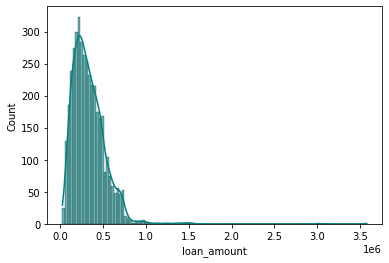

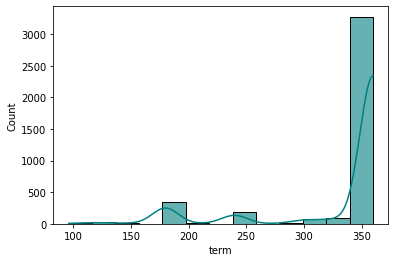

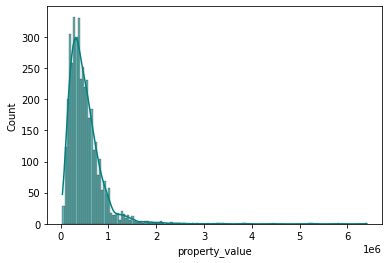

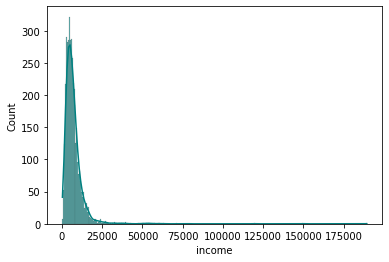

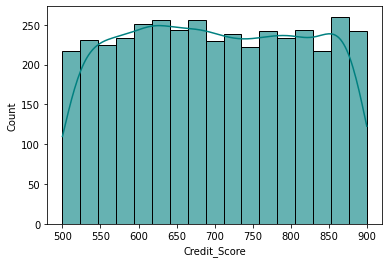

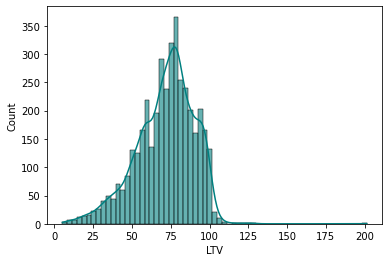

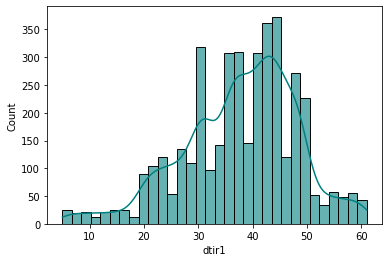

In [ ]:
# Numerical Columns - Univariate - Histogram with Density Plot
for var in num_columns:
    plt.figure()
    sns.histplot(data = bank, x = var, kde = True, color='teal', alpha=0.6)
    sns.kdeplot

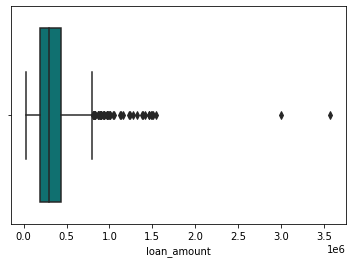

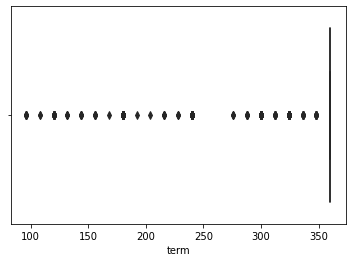

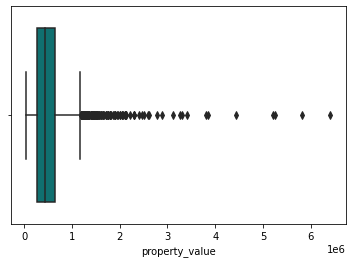

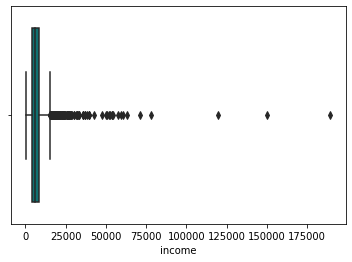

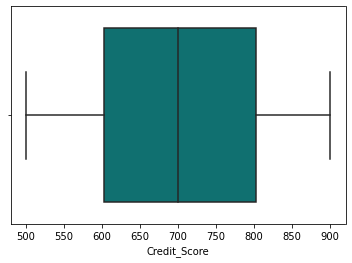

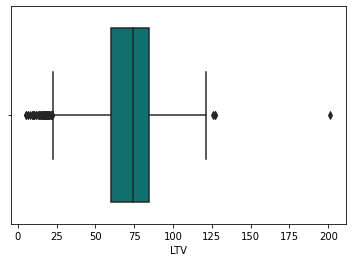

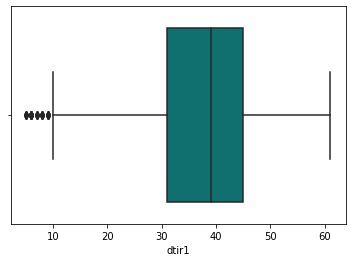

In [ ]:
# Numerical Columns - Univariate - BoxPlot
for var in num_columns:
    plt.figure()
    sns.boxplot(data = bank, x = var, color='teal')

<Figure size 1080x576 with 0 Axes>

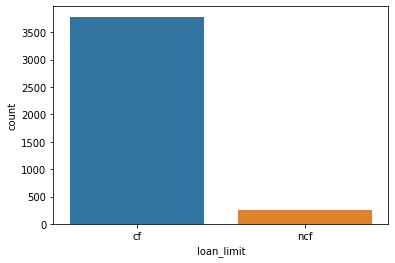

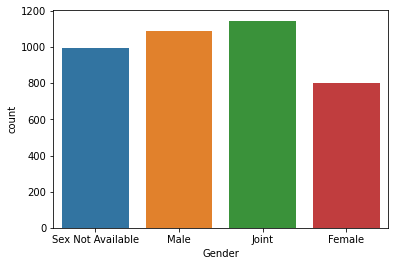

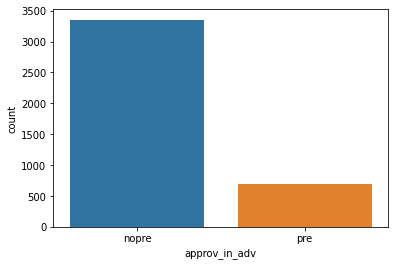

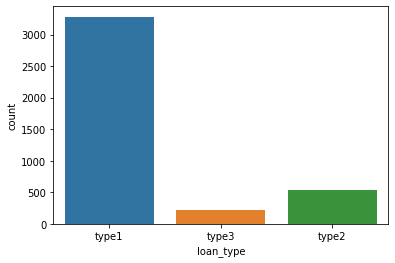

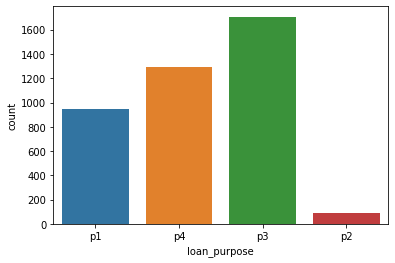

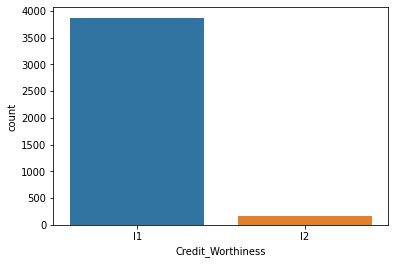

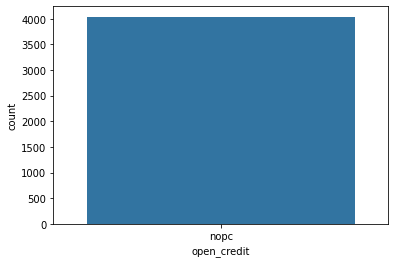

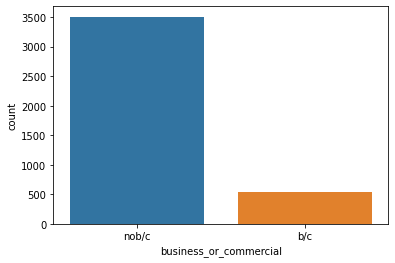

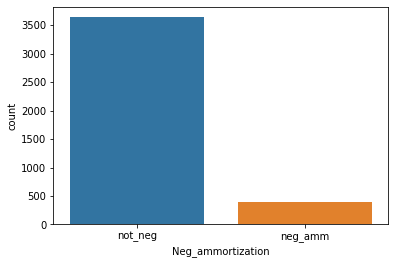

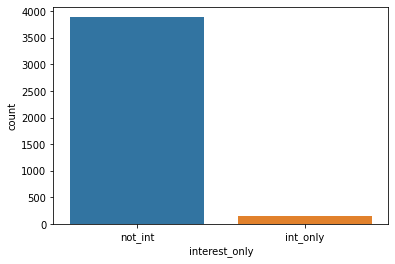

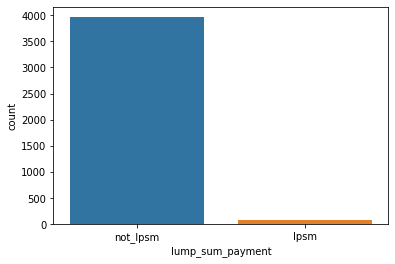

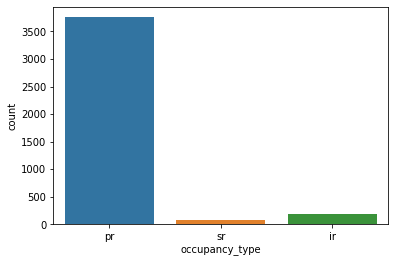

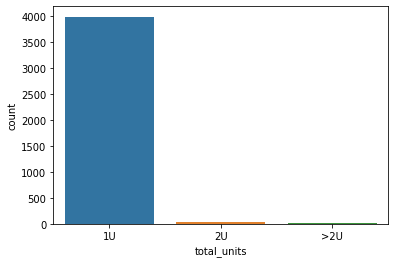

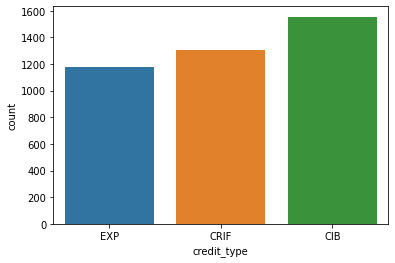

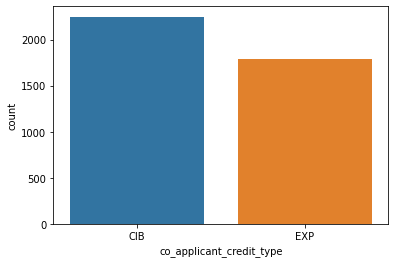

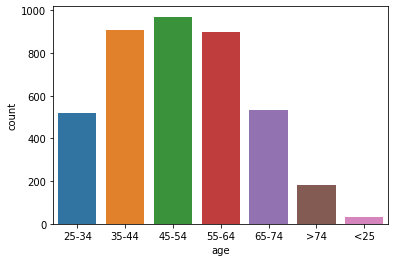

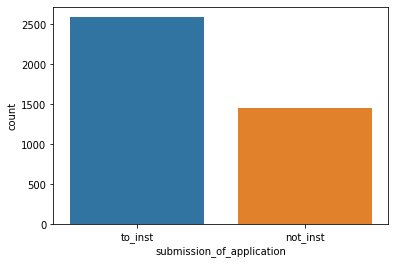

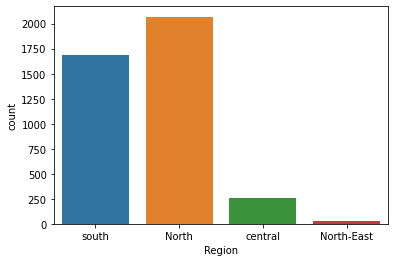

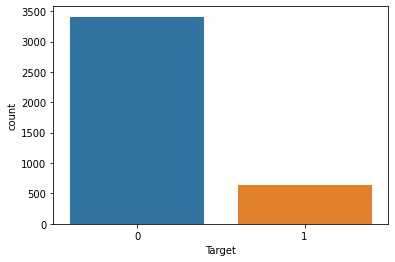

In [ ]:
# Categorical Columns - Univariate - Simple Frequency Chart
plt.figure(figsize=(15,8))
for var in cat_columns:
    plt.figure()
    sns.countplot(data = bank, x = var)

<Figure size 1080x576 with 0 Axes>

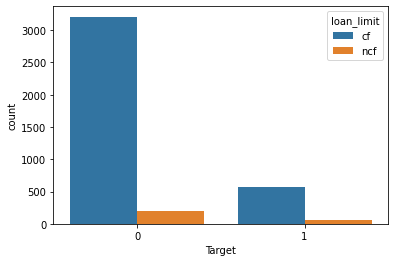

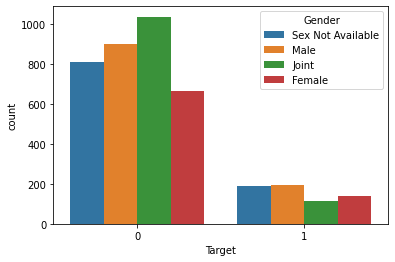

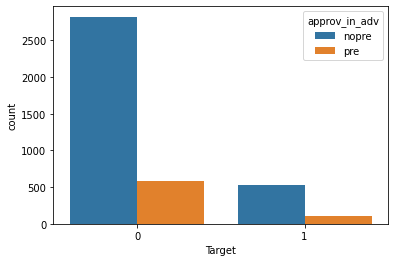

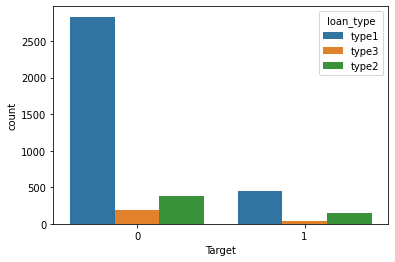

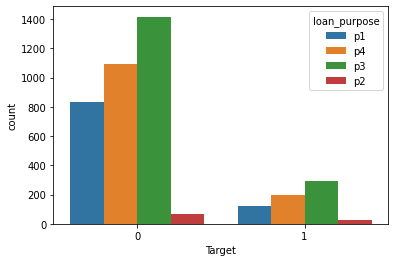

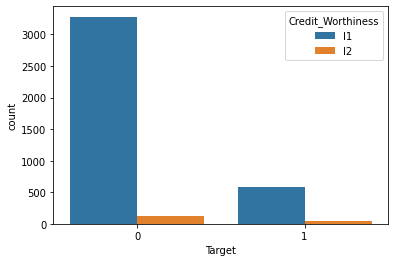

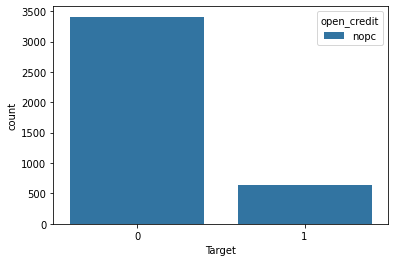

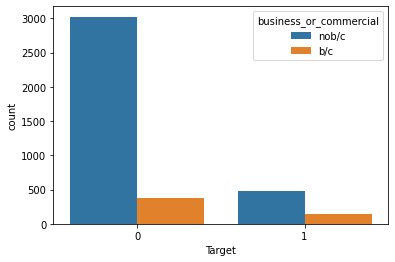

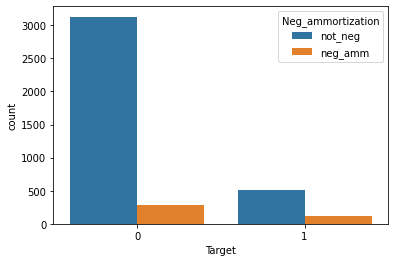

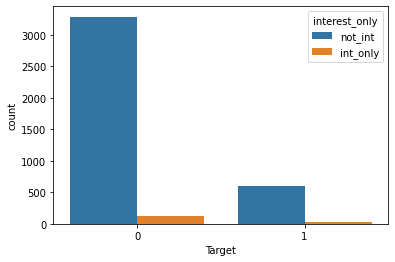

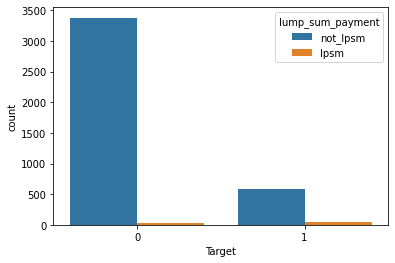

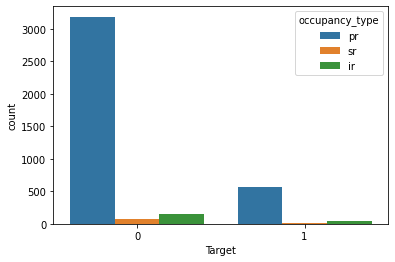

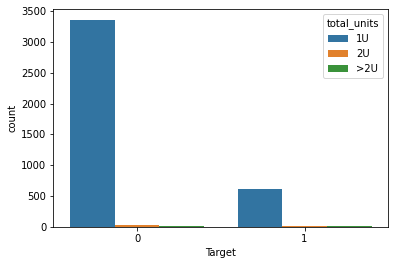

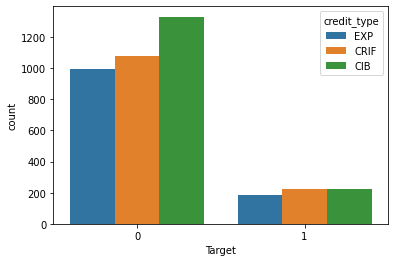

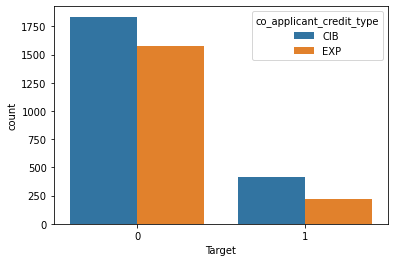

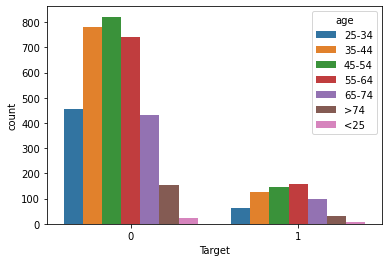

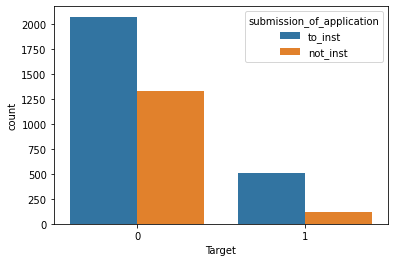

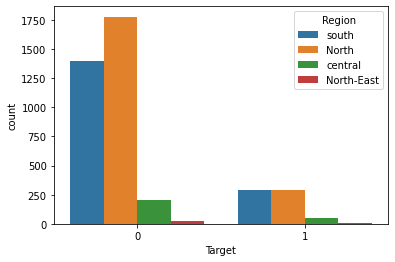

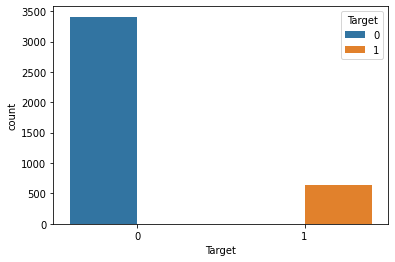

In [ ]:
# Categorical Columns - Bivariate - Simple Frequency Chart distributed across categories
plt.figure(figsize=(15,8))
for var in cat_columns:
    plt.figure()
    sns.countplot(data = bank, x = "Target", hue = var)

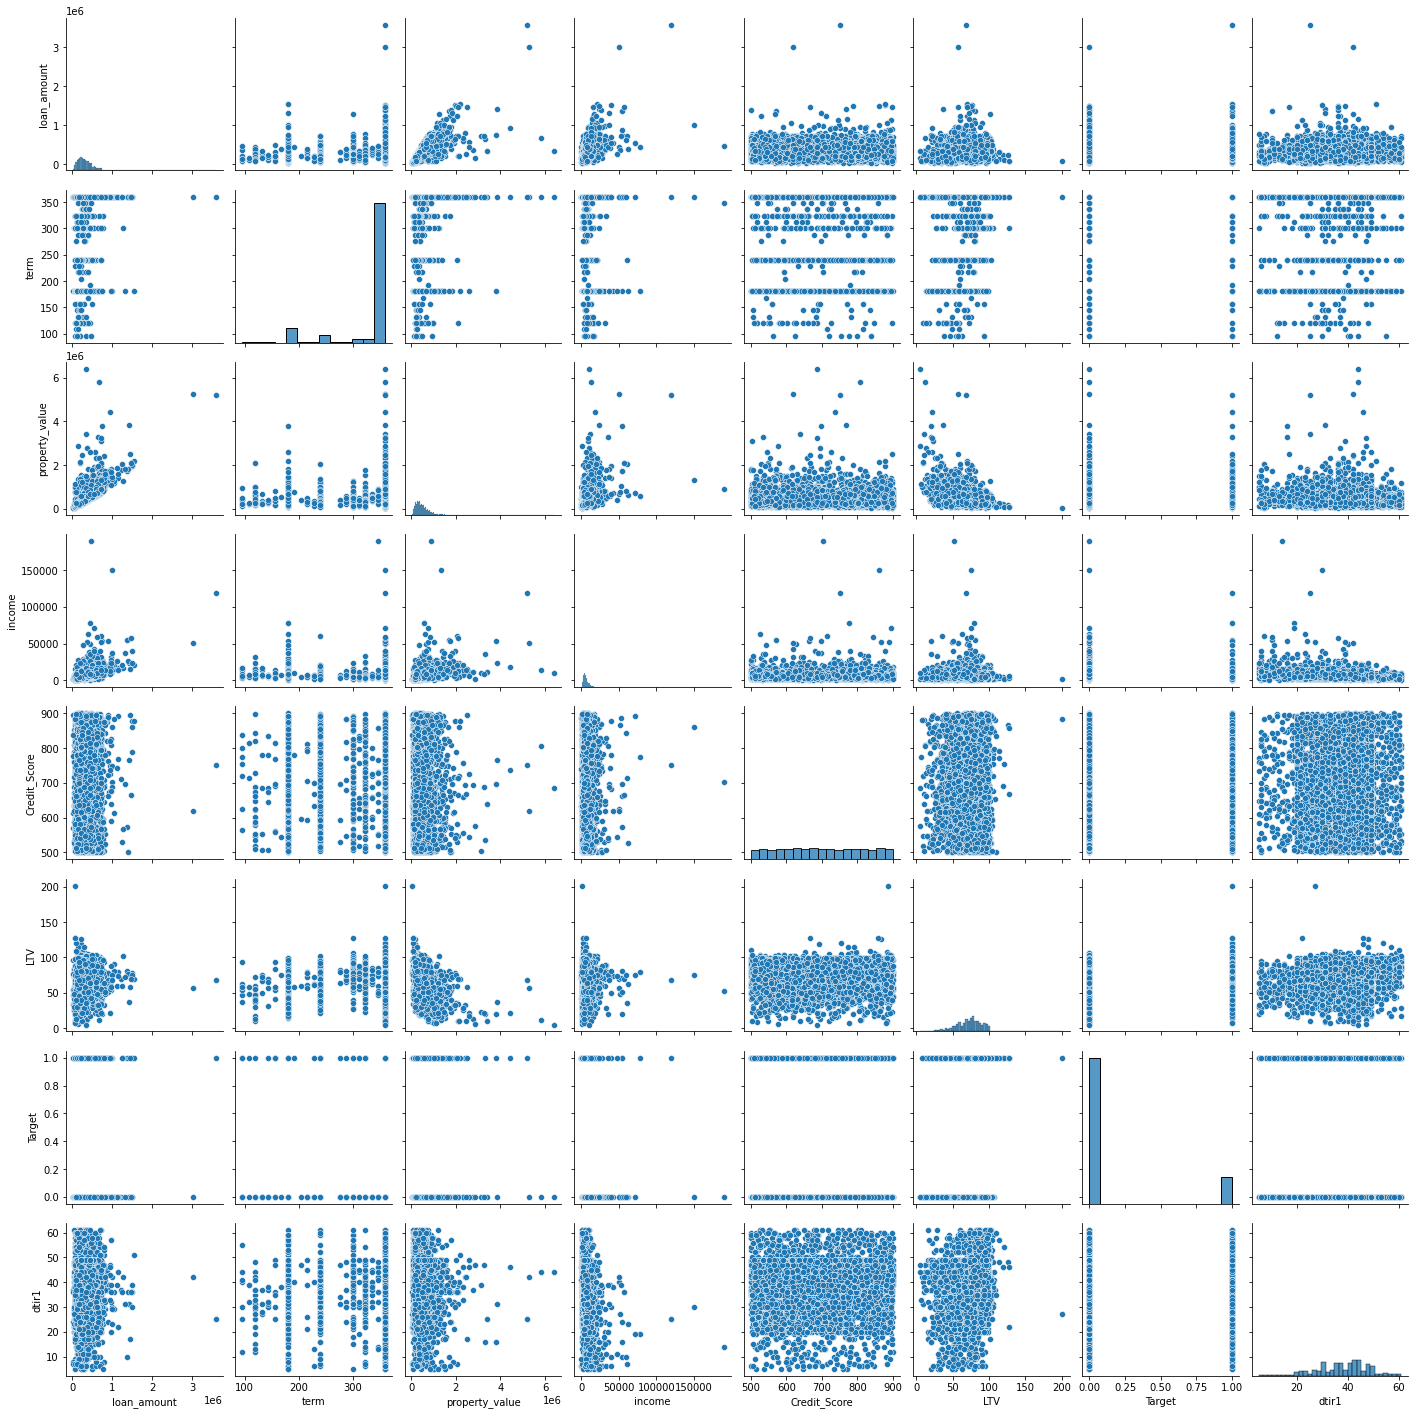

In [ ]:
# Numerical - Numerical Scatter Plot - Scatter Plot Matrix # Subdivided by the Target Variable
sns.pairplot(bank)

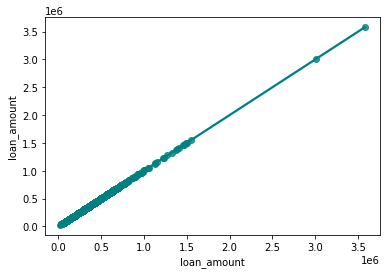

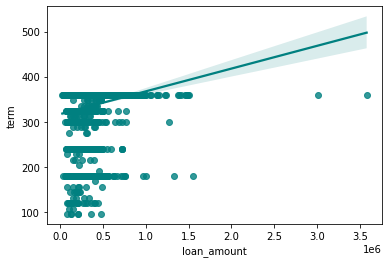

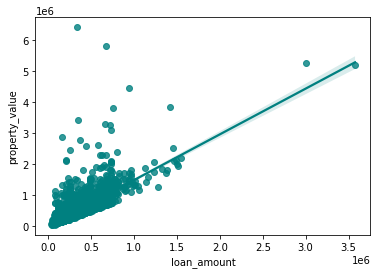

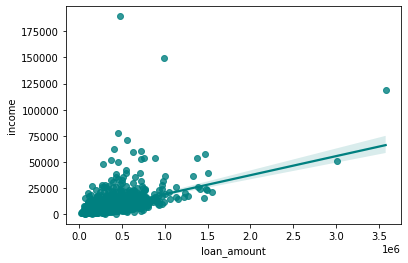

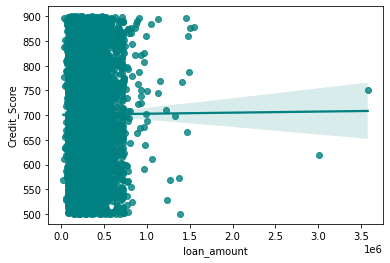

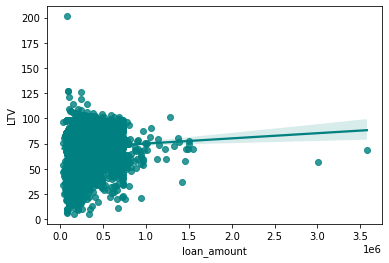

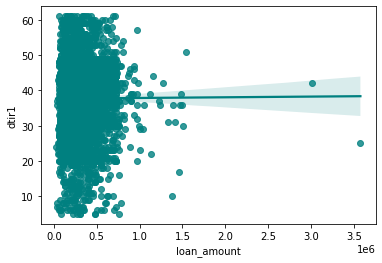

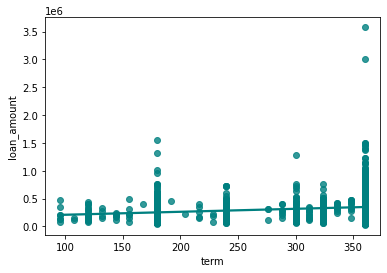

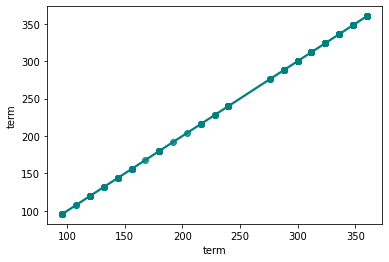

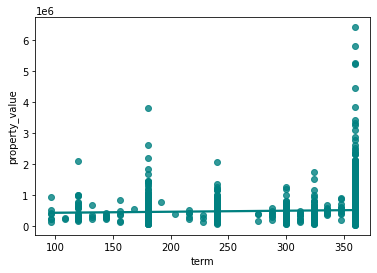

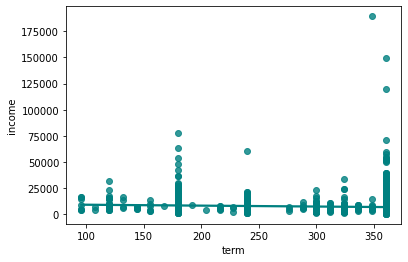

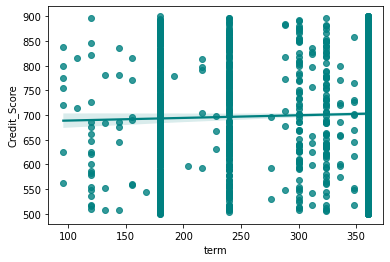

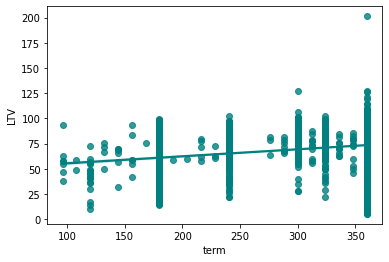

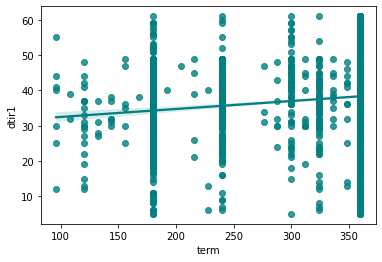

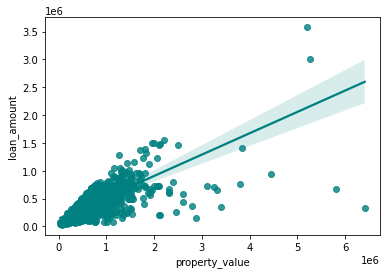

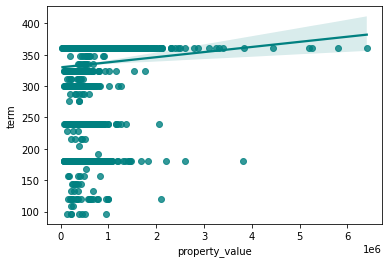

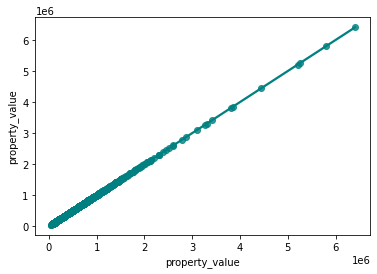

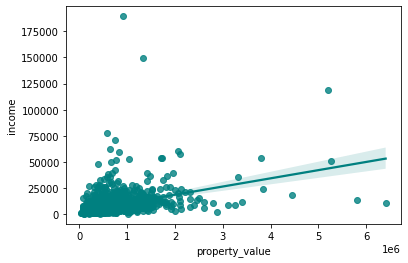

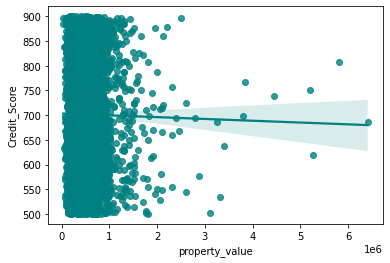

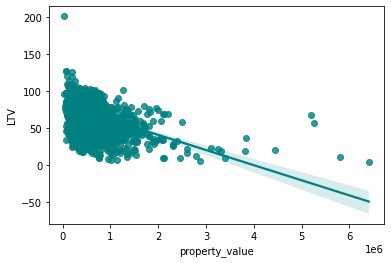

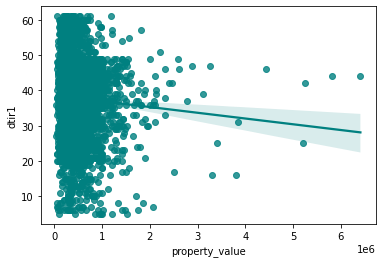

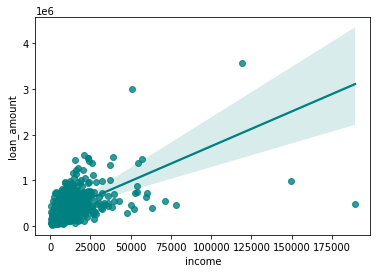

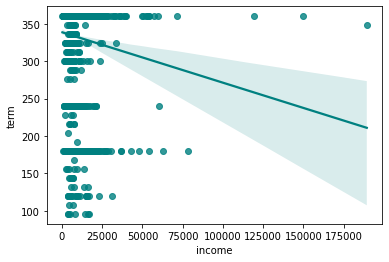

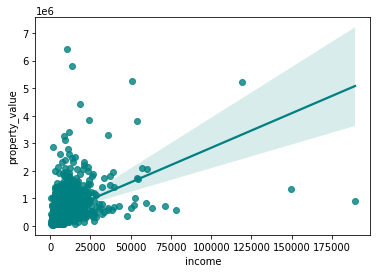

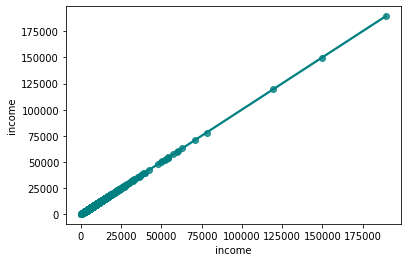

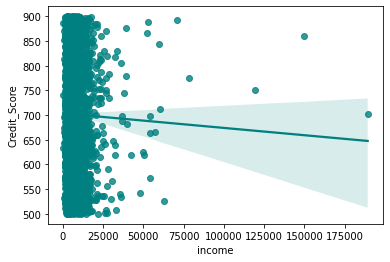

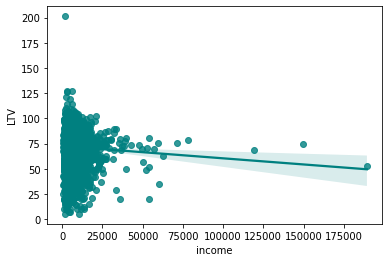

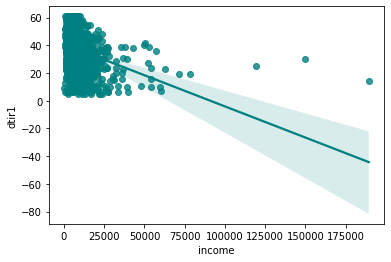

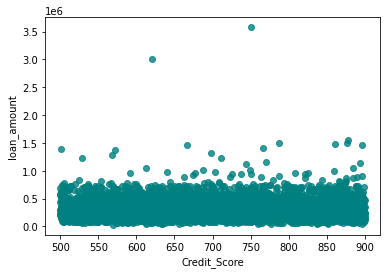

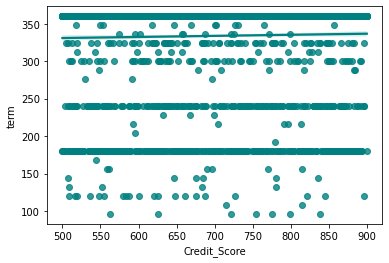

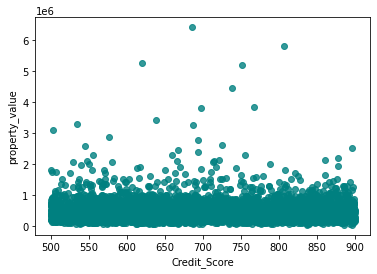

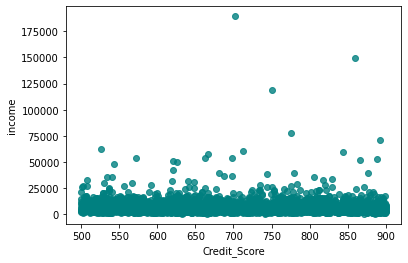

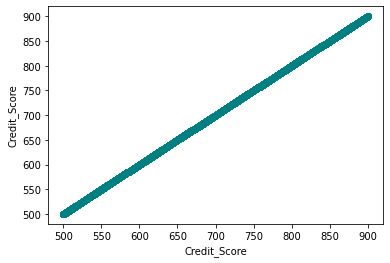

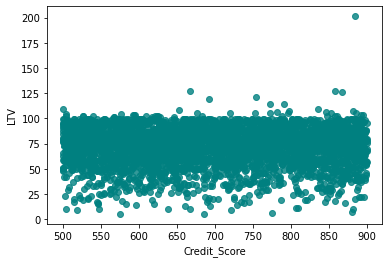

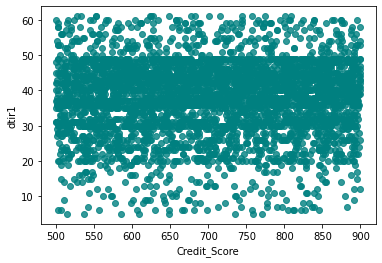

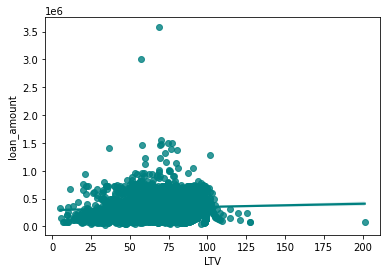

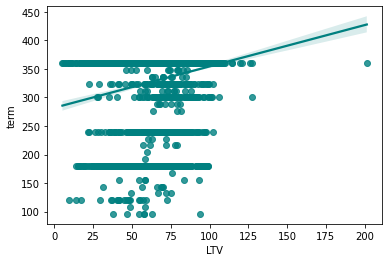

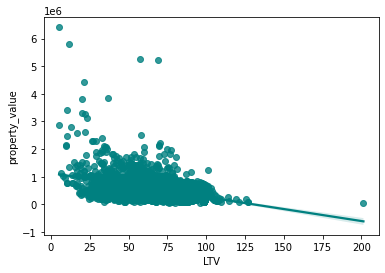

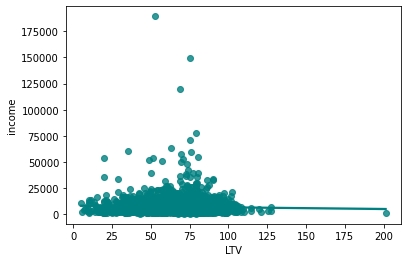

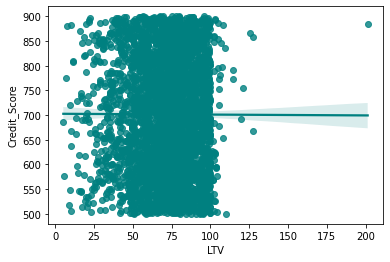

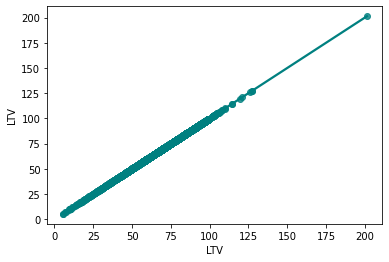

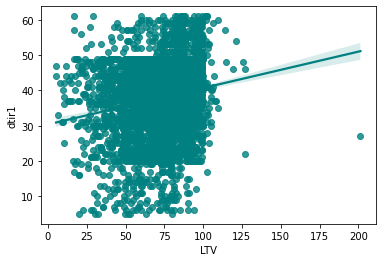

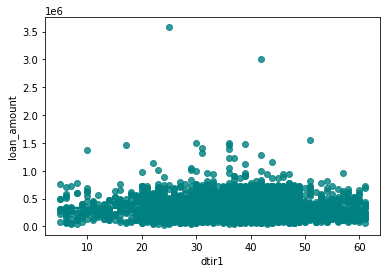

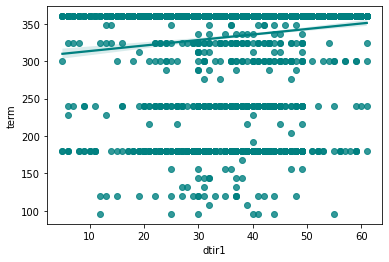

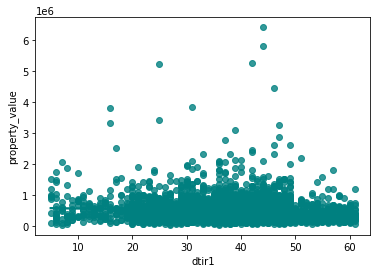

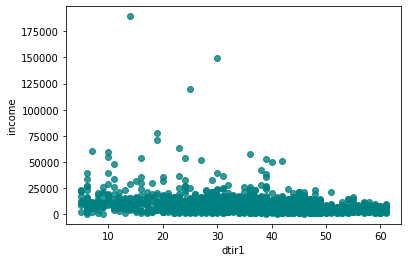

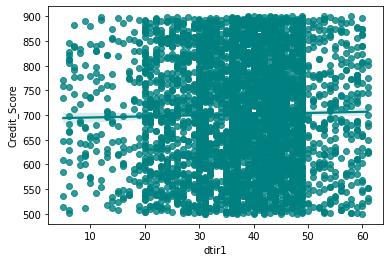

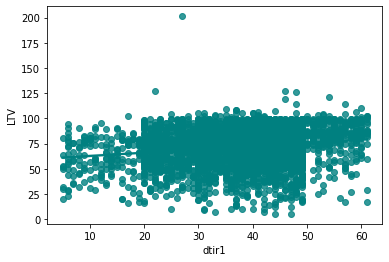

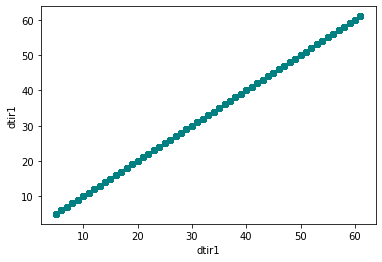

In [ ]:
# Numerical - Numerical Regression Plot -
for var1 in num_columns:
    for var2 in num_columns:
        plt.figure()
        sns.regplot(data = bank, x = var1, y = var2, color='teal')

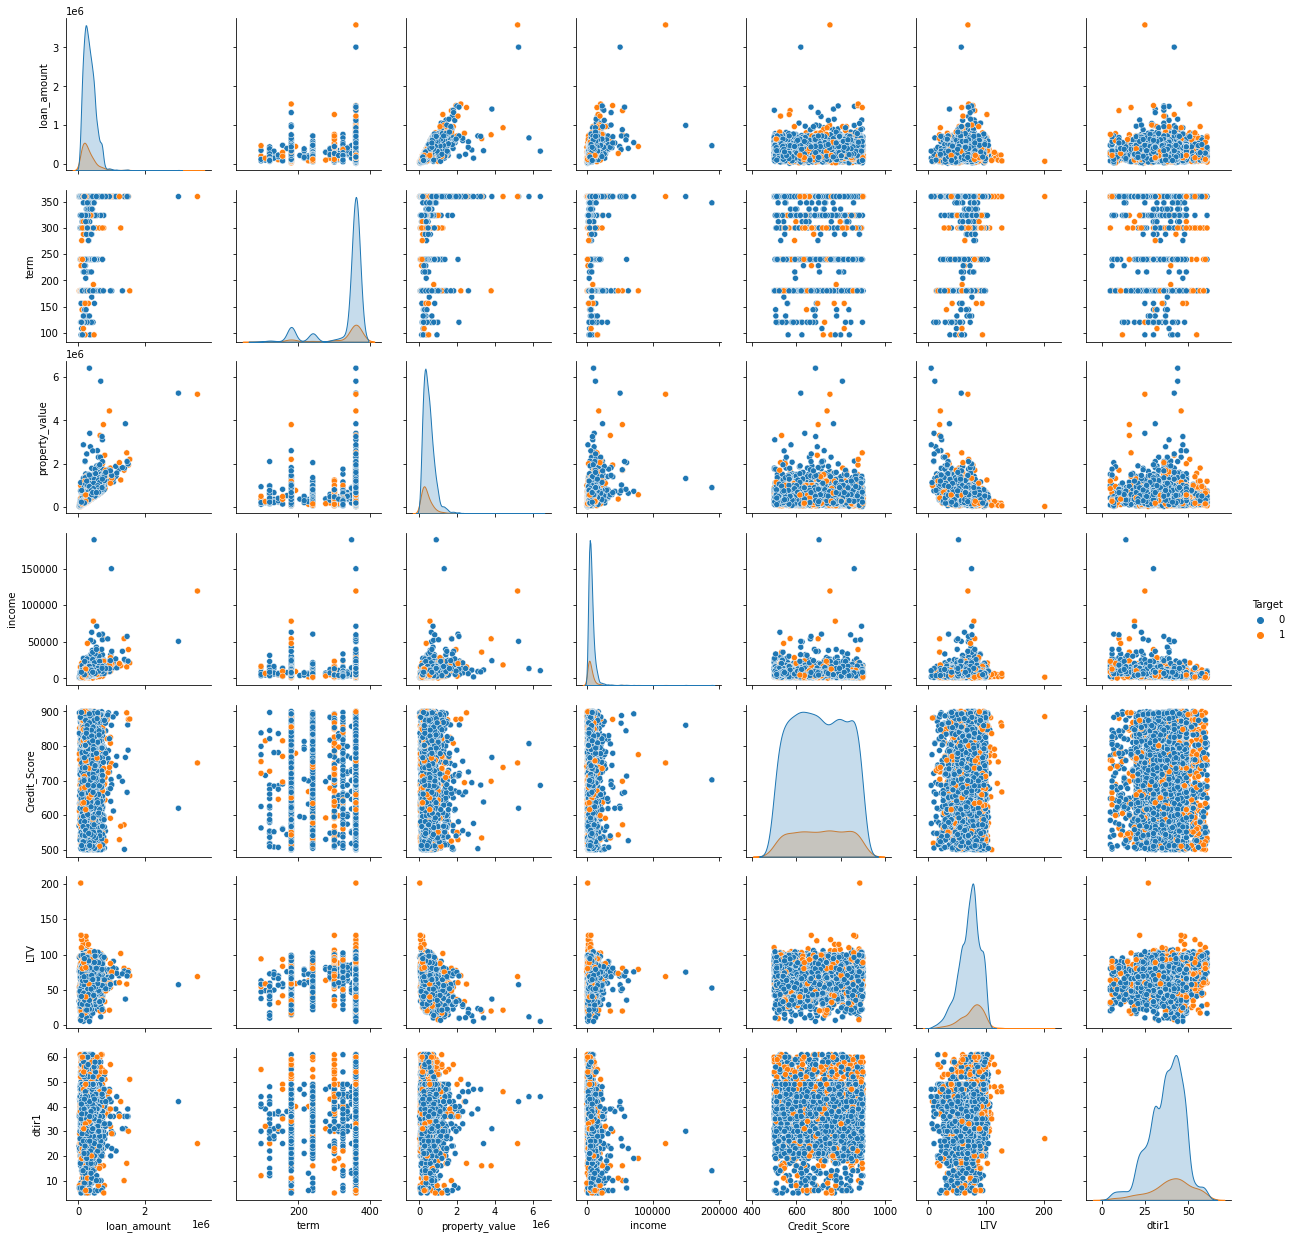

In [ ]:
# Numerical - Numerical Scatter Plot - Scatter Plot Matrix # Subdivided by the Target Variable
sns.pairplot(bank, hue = "Target")

<Figure size 432x288 with 0 Axes>

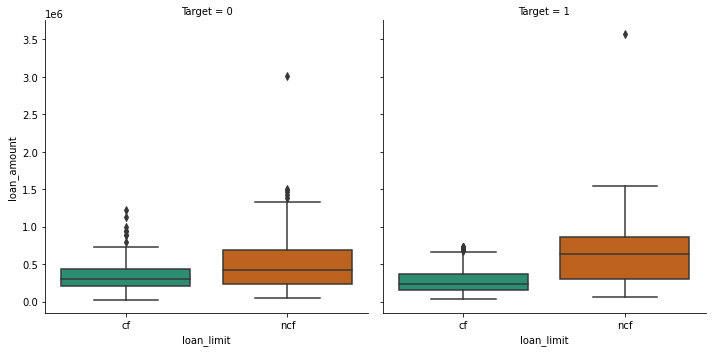

<Figure size 432x288 with 0 Axes>

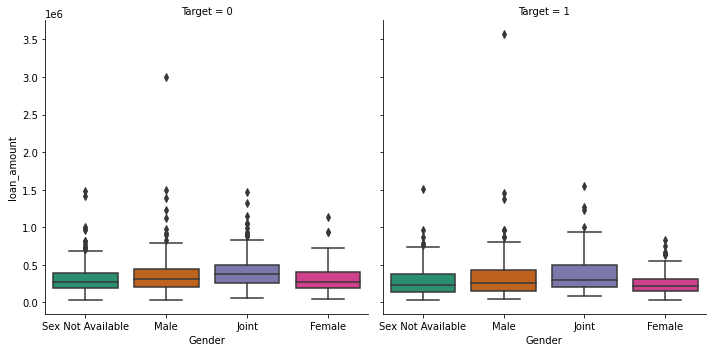

<Figure size 432x288 with 0 Axes>

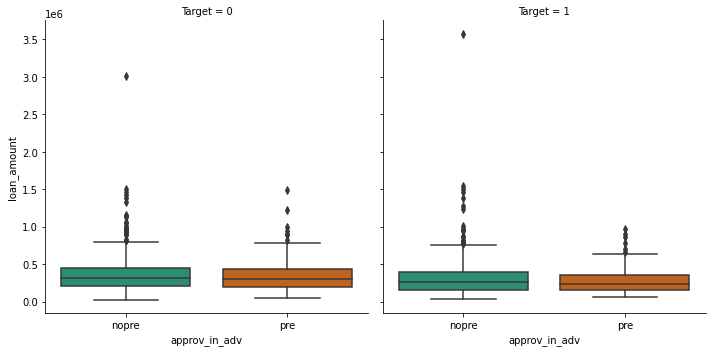

<Figure size 432x288 with 0 Axes>

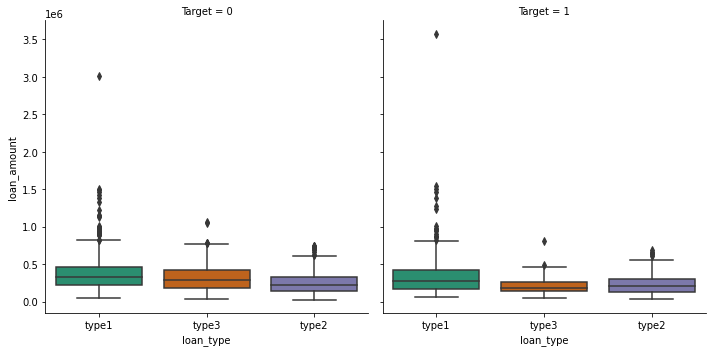

<Figure size 432x288 with 0 Axes>

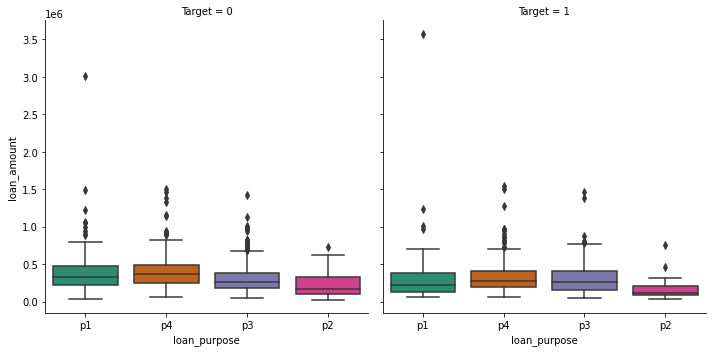

<Figure size 432x288 with 0 Axes>

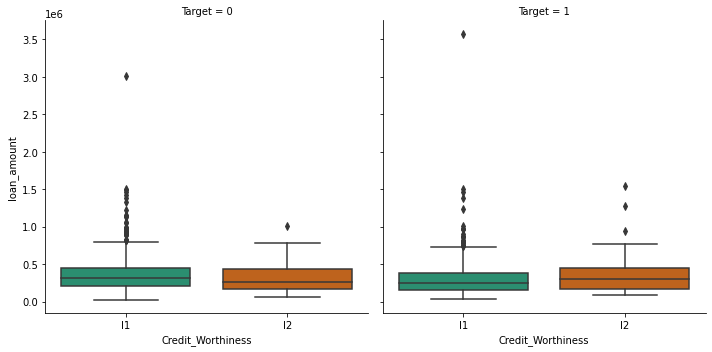

<Figure size 432x288 with 0 Axes>

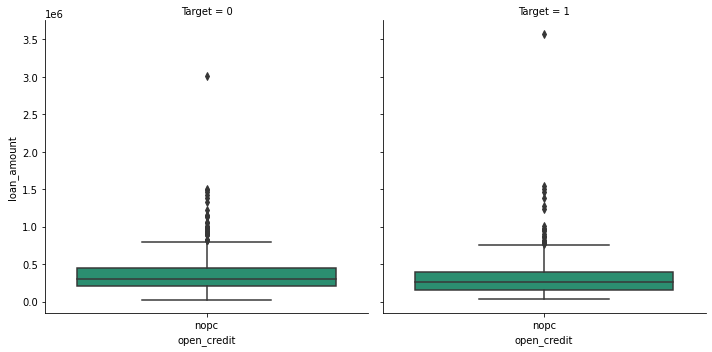

<Figure size 432x288 with 0 Axes>

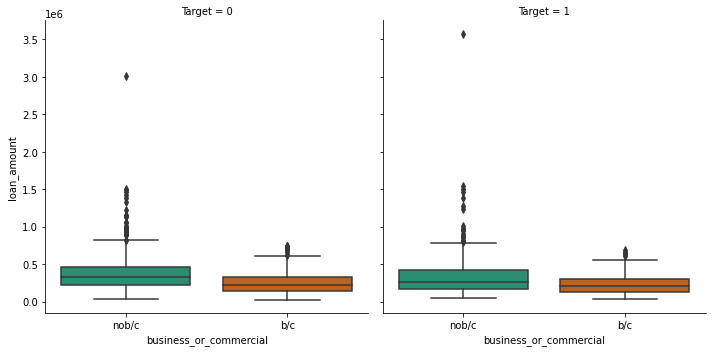

<Figure size 432x288 with 0 Axes>

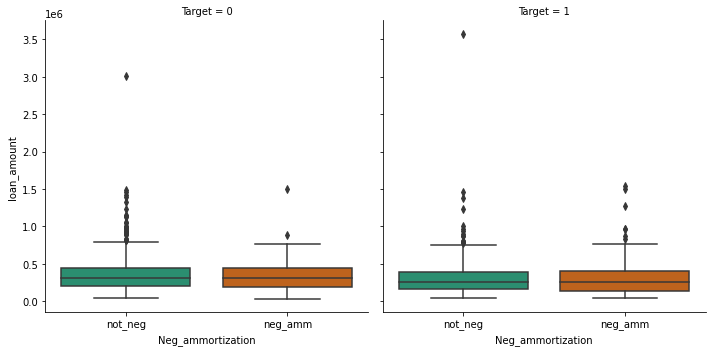

<Figure size 432x288 with 0 Axes>

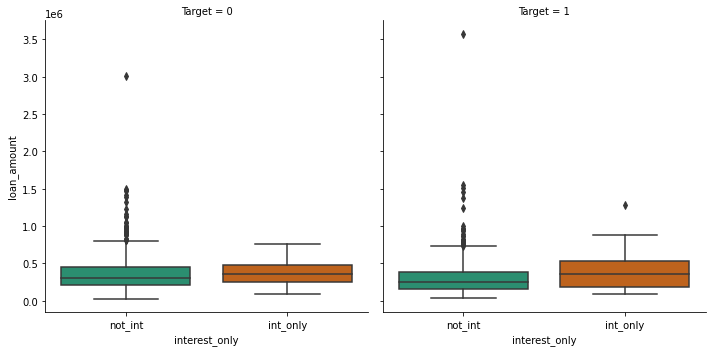

<Figure size 432x288 with 0 Axes>

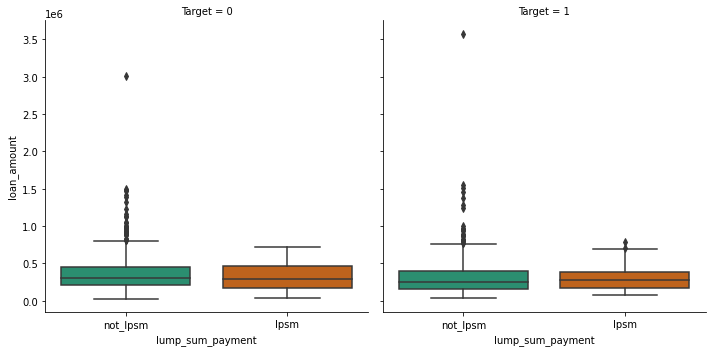

<Figure size 432x288 with 0 Axes>

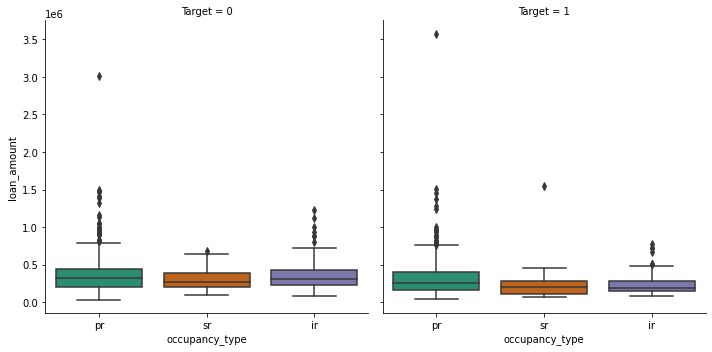

<Figure size 432x288 with 0 Axes>

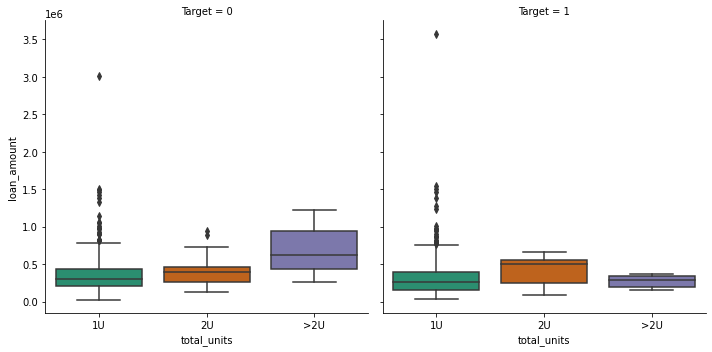

<Figure size 432x288 with 0 Axes>

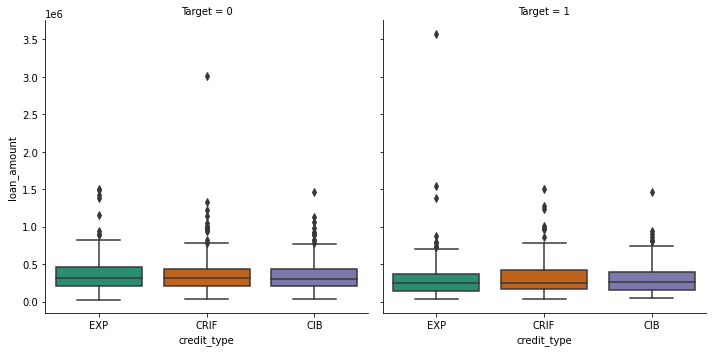

<Figure size 432x288 with 0 Axes>

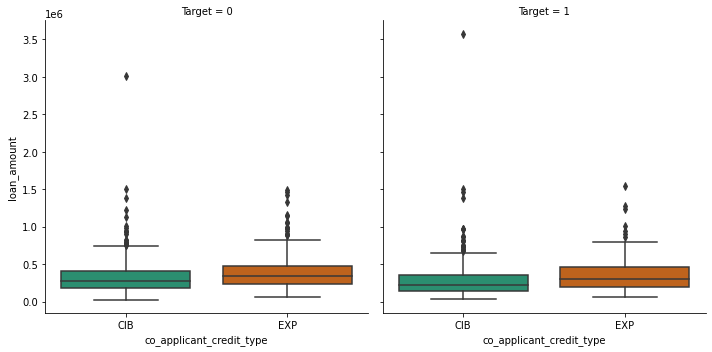

<Figure size 432x288 with 0 Axes>

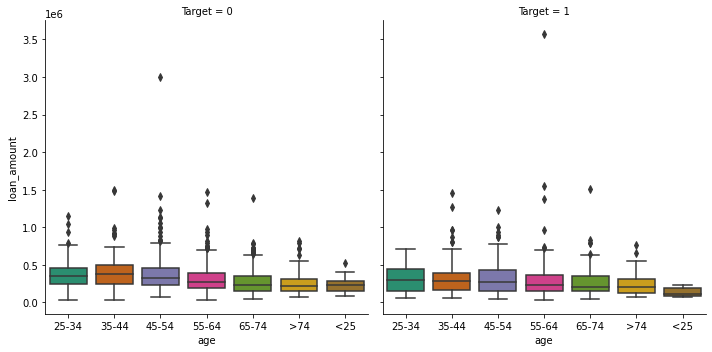

<Figure size 432x288 with 0 Axes>

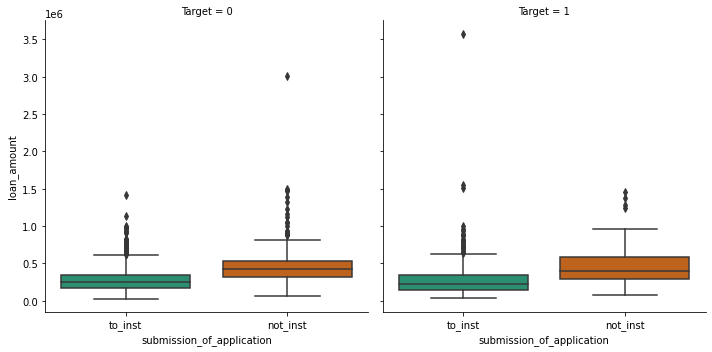

<Figure size 432x288 with 0 Axes>

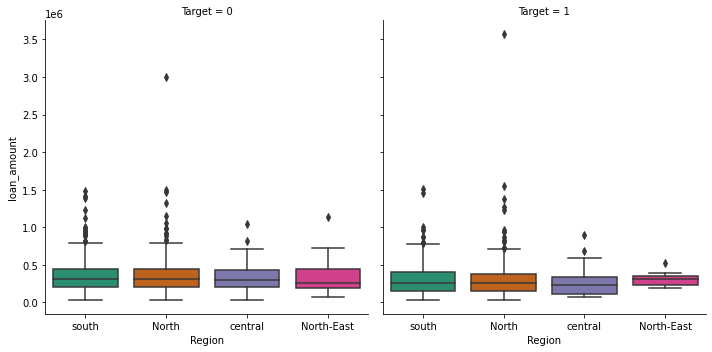

<Figure size 432x288 with 0 Axes>

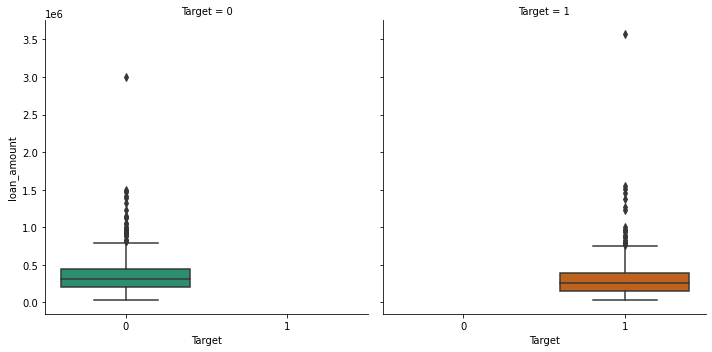

<Figure size 432x288 with 0 Axes>

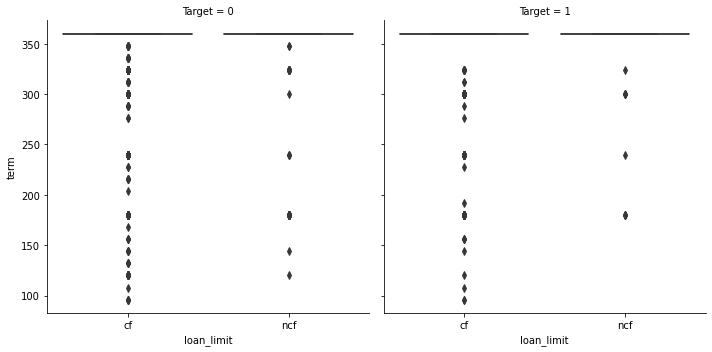

<Figure size 432x288 with 0 Axes>

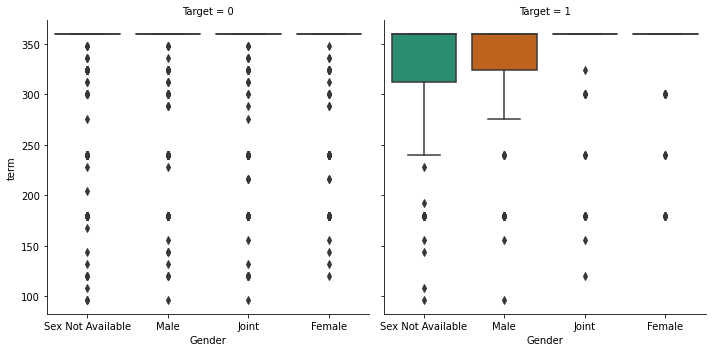

<Figure size 432x288 with 0 Axes>

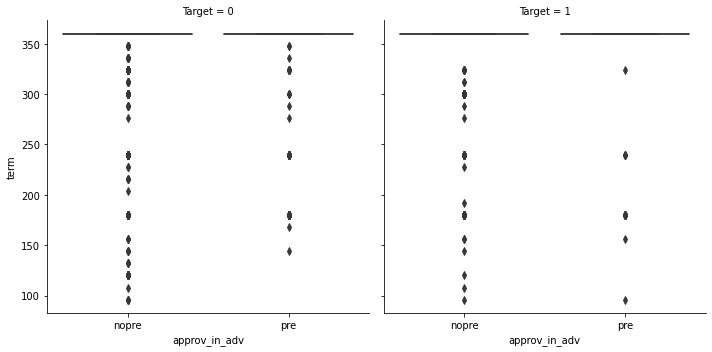

<Figure size 432x288 with 0 Axes>

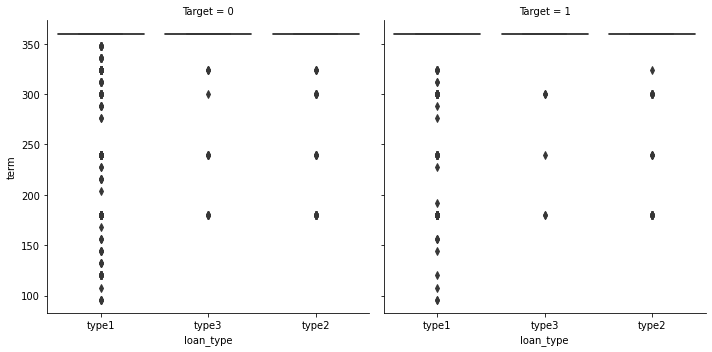

<Figure size 432x288 with 0 Axes>

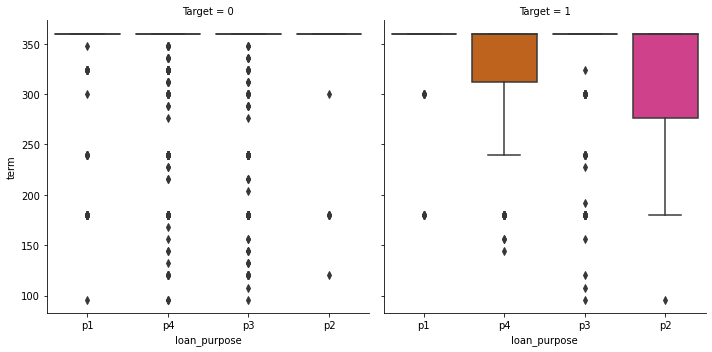

<Figure size 432x288 with 0 Axes>

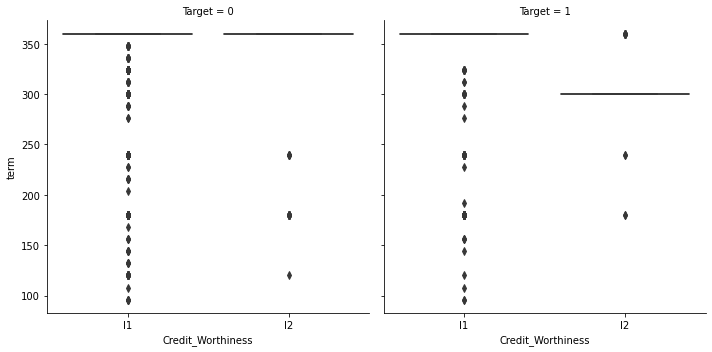

<Figure size 432x288 with 0 Axes>

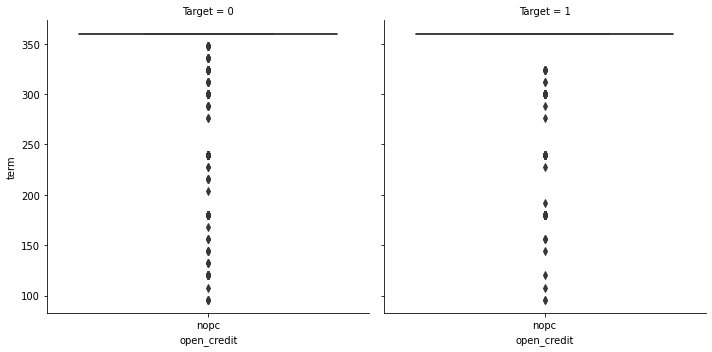

<Figure size 432x288 with 0 Axes>

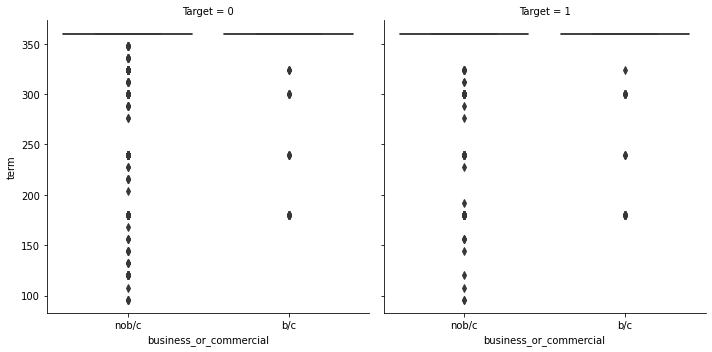

<Figure size 432x288 with 0 Axes>

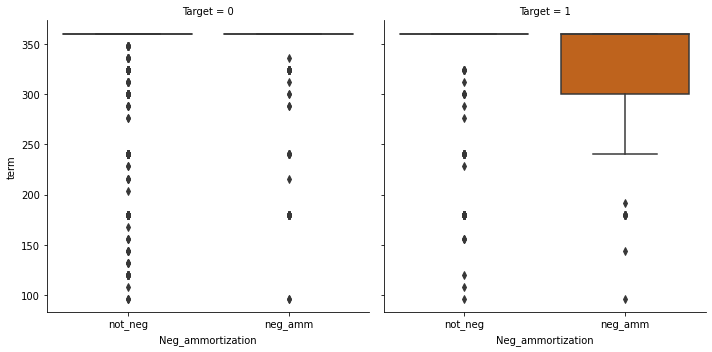

<Figure size 432x288 with 0 Axes>

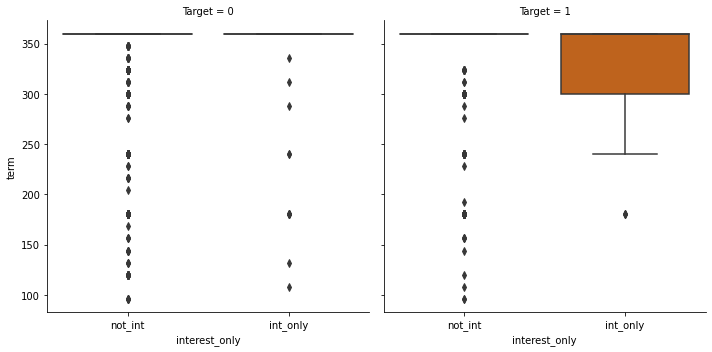

<Figure size 432x288 with 0 Axes>

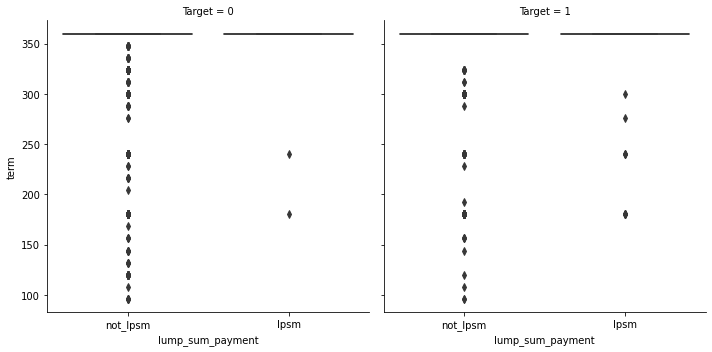

<Figure size 432x288 with 0 Axes>

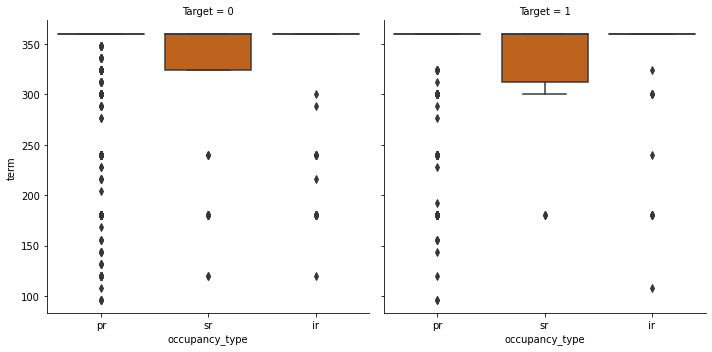

<Figure size 432x288 with 0 Axes>

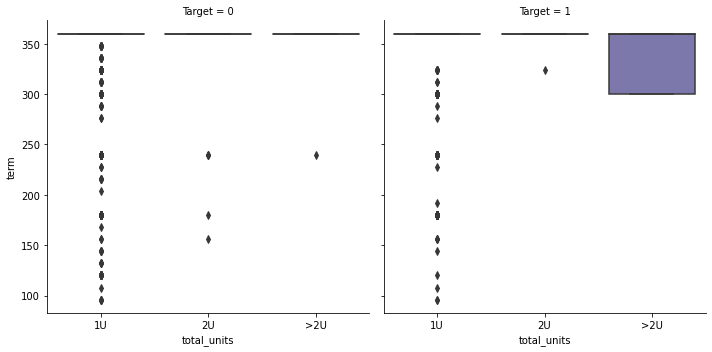

<Figure size 432x288 with 0 Axes>

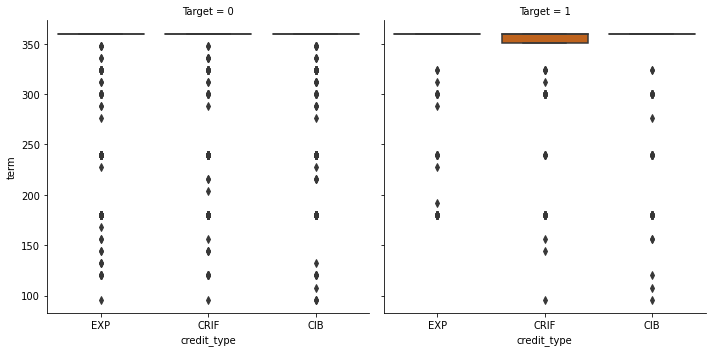

<Figure size 432x288 with 0 Axes>

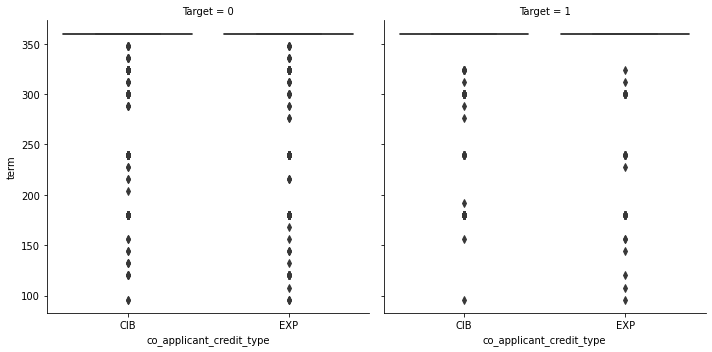

<Figure size 432x288 with 0 Axes>

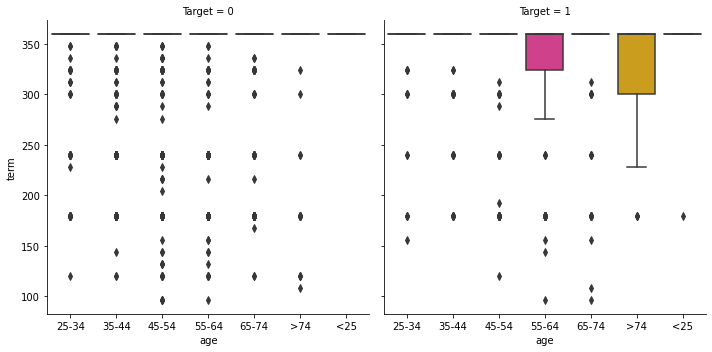

<Figure size 432x288 with 0 Axes>

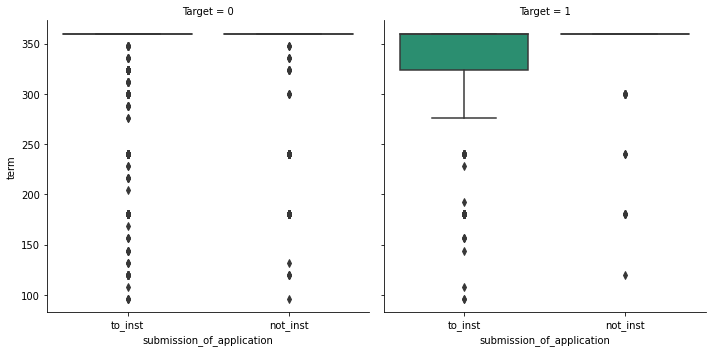

<Figure size 432x288 with 0 Axes>

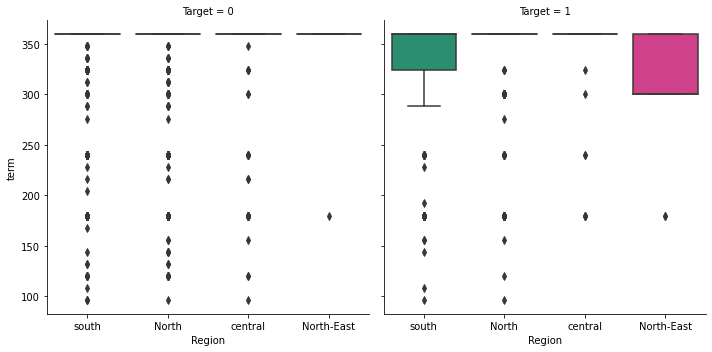

<Figure size 432x288 with 0 Axes>

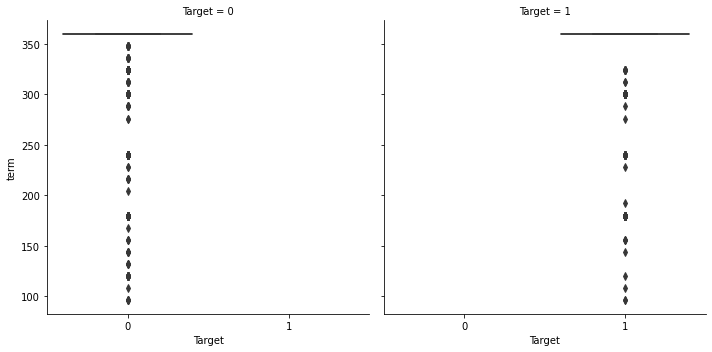

<Figure size 432x288 with 0 Axes>

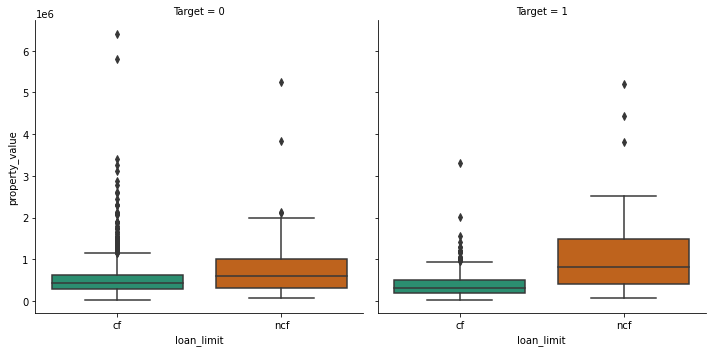

<Figure size 432x288 with 0 Axes>

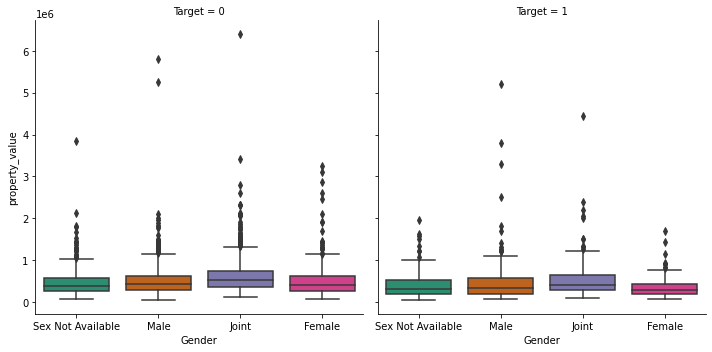

<Figure size 432x288 with 0 Axes>

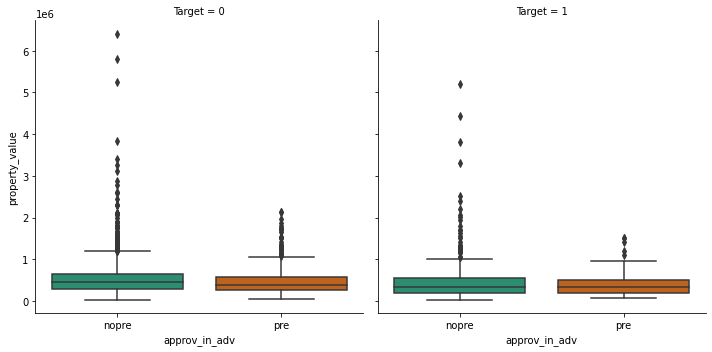

<Figure size 432x288 with 0 Axes>

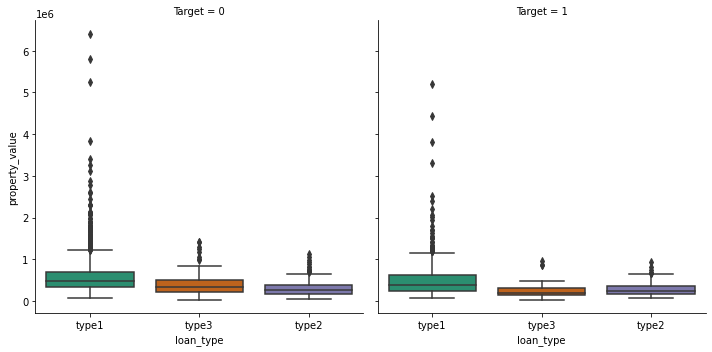

<Figure size 432x288 with 0 Axes>

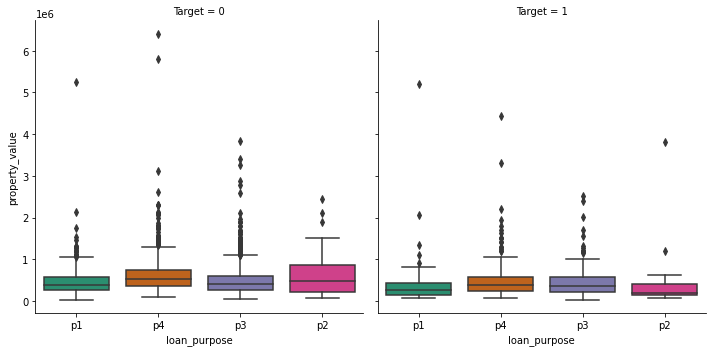

<Figure size 432x288 with 0 Axes>

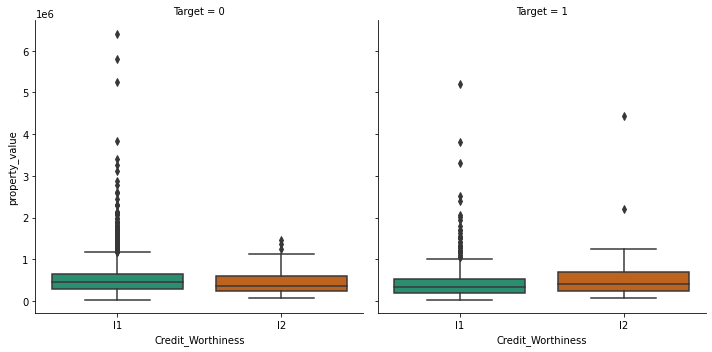

<Figure size 432x288 with 0 Axes>

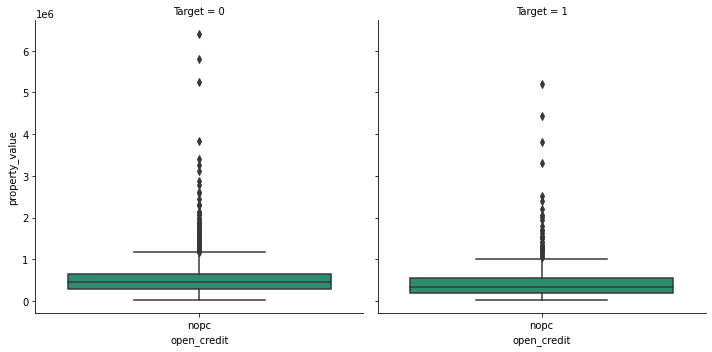

<Figure size 432x288 with 0 Axes>

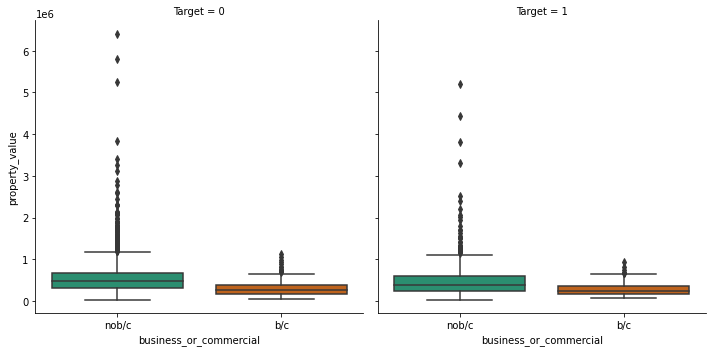

<Figure size 432x288 with 0 Axes>

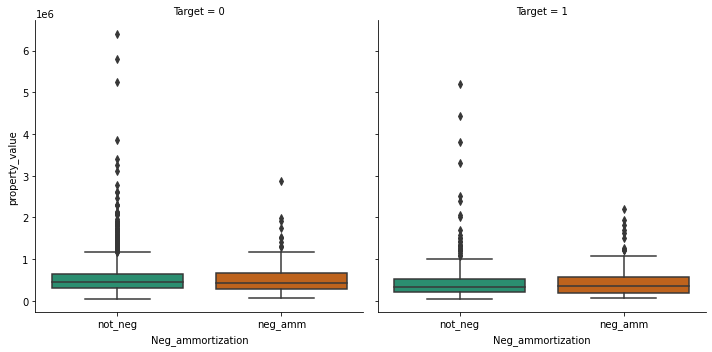

<Figure size 432x288 with 0 Axes>

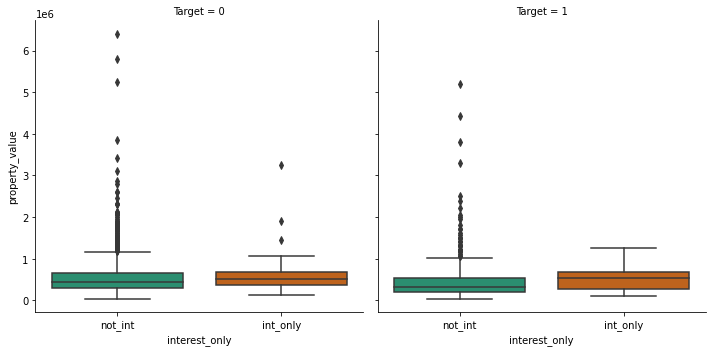

<Figure size 432x288 with 0 Axes>

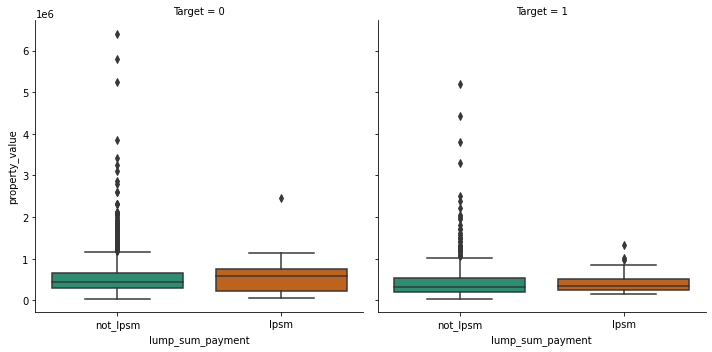

<Figure size 432x288 with 0 Axes>

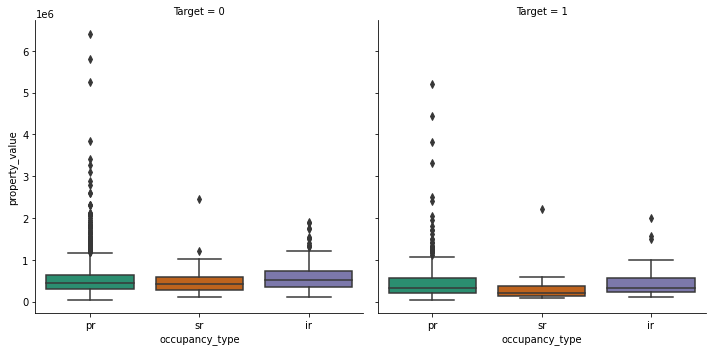

<Figure size 432x288 with 0 Axes>

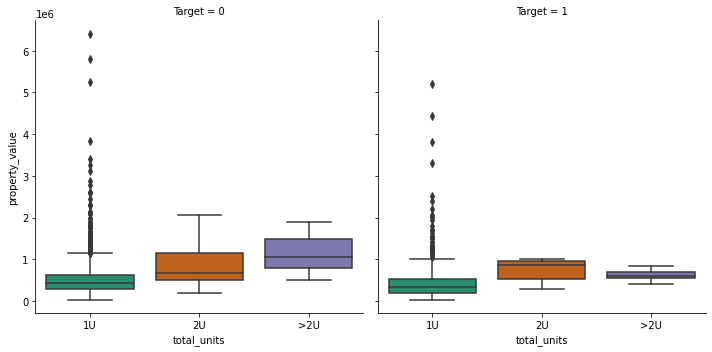

<Figure size 432x288 with 0 Axes>

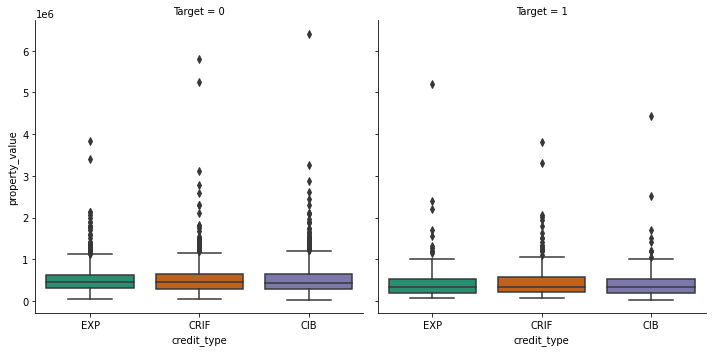

<Figure size 432x288 with 0 Axes>

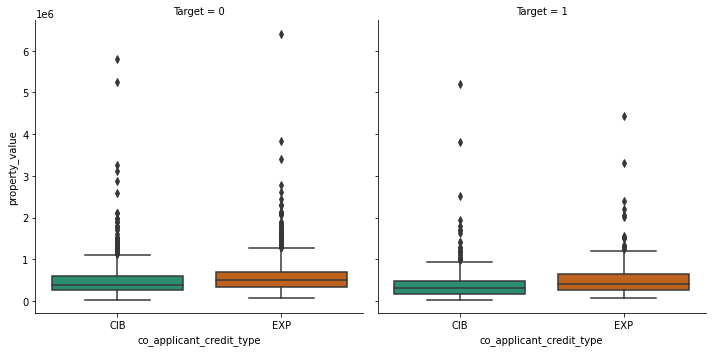

<Figure size 432x288 with 0 Axes>

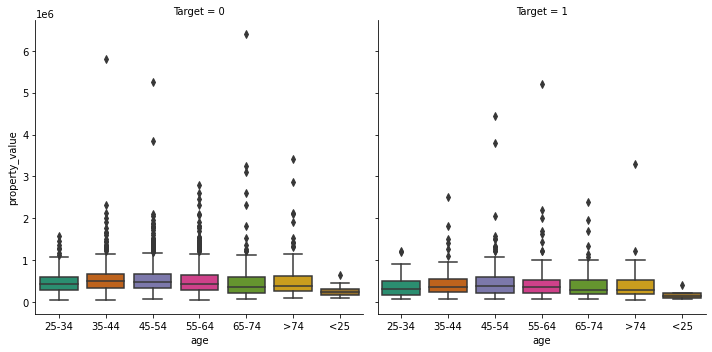

<Figure size 432x288 with 0 Axes>

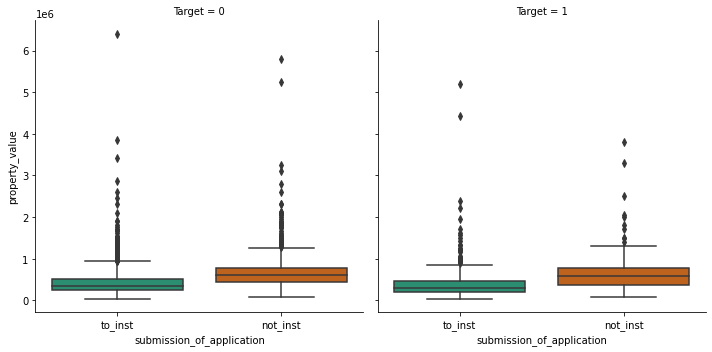

<Figure size 432x288 with 0 Axes>

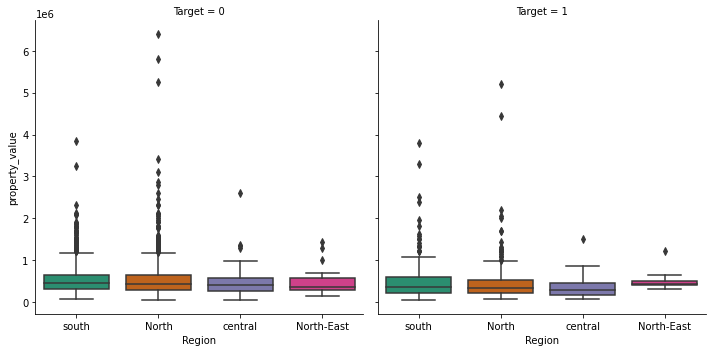

<Figure size 432x288 with 0 Axes>

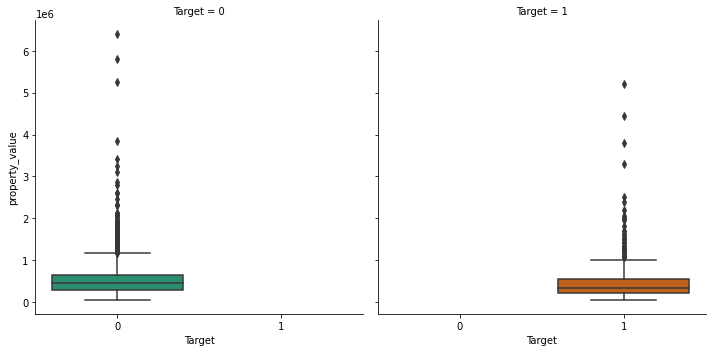

<Figure size 432x288 with 0 Axes>

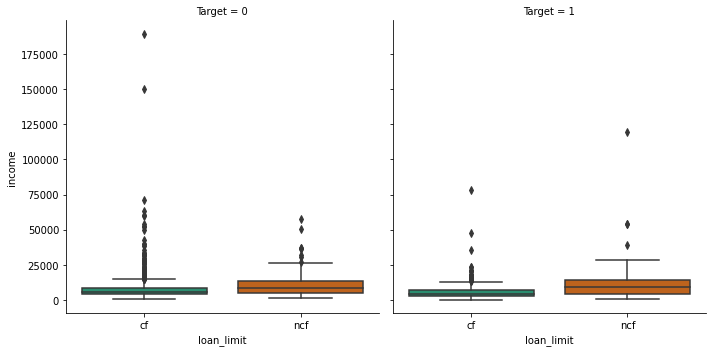

<Figure size 432x288 with 0 Axes>

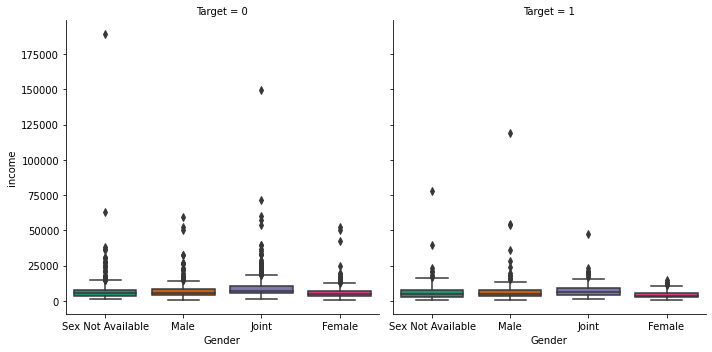

<Figure size 432x288 with 0 Axes>

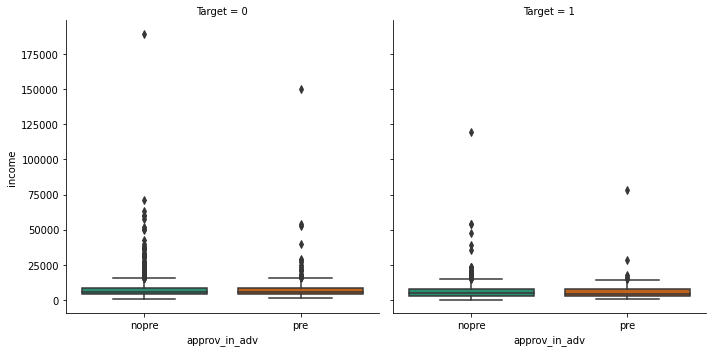

<Figure size 432x288 with 0 Axes>

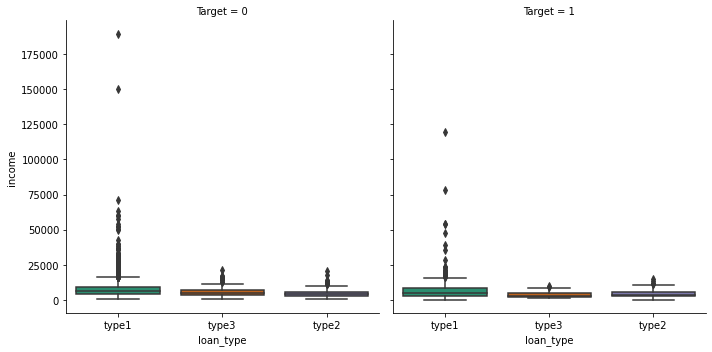

<Figure size 432x288 with 0 Axes>

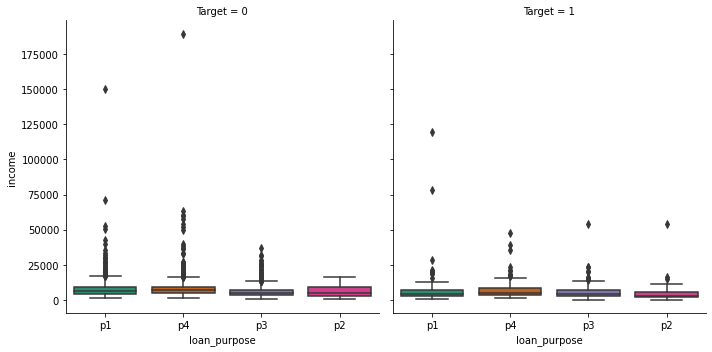

<Figure size 432x288 with 0 Axes>

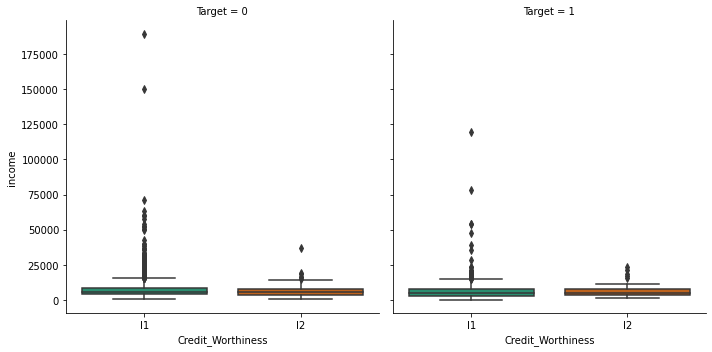

<Figure size 432x288 with 0 Axes>

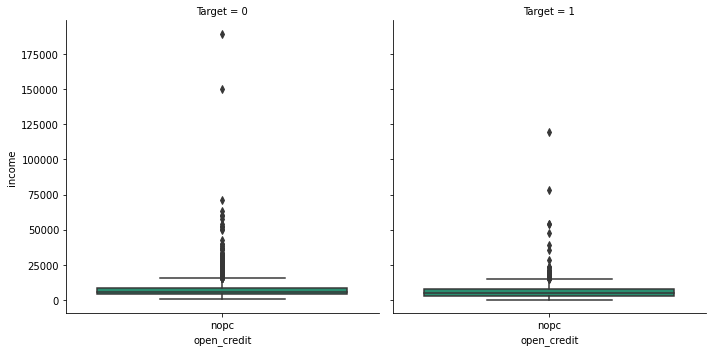

<Figure size 432x288 with 0 Axes>

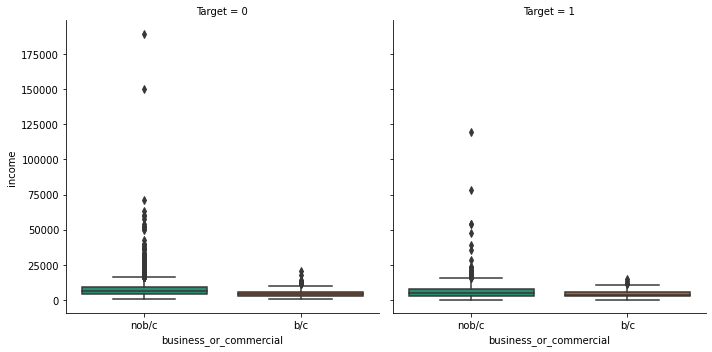

<Figure size 432x288 with 0 Axes>

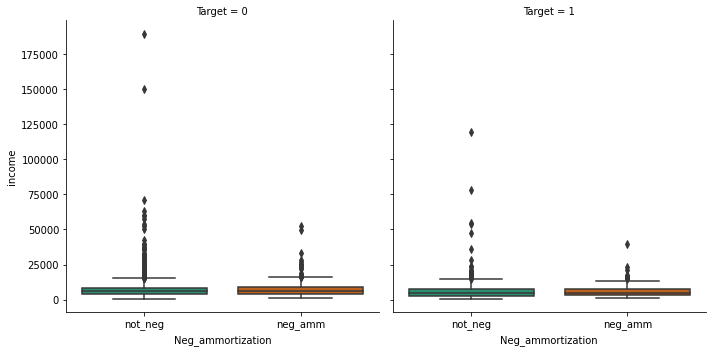

<Figure size 432x288 with 0 Axes>

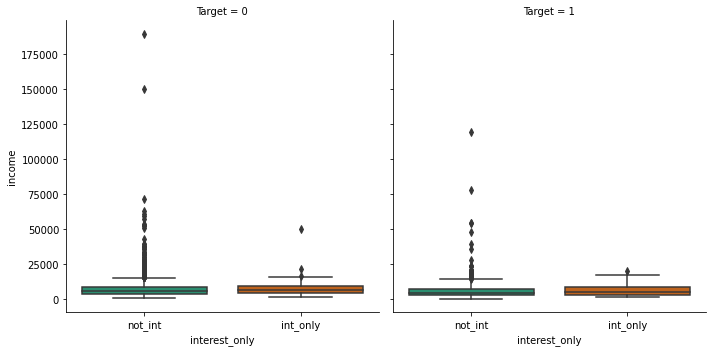

<Figure size 432x288 with 0 Axes>

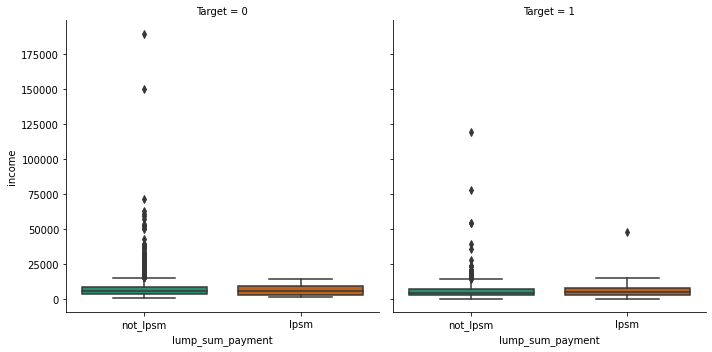

<Figure size 432x288 with 0 Axes>

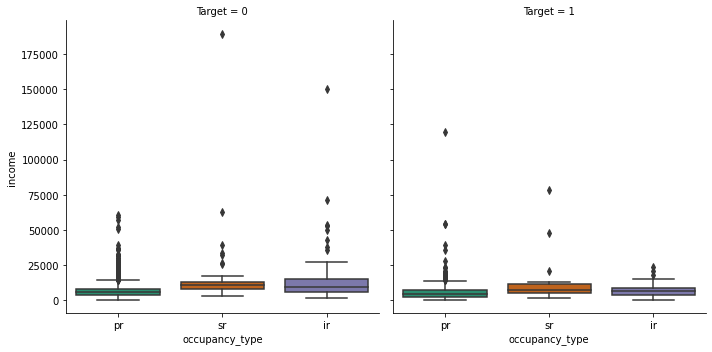

<Figure size 432x288 with 0 Axes>

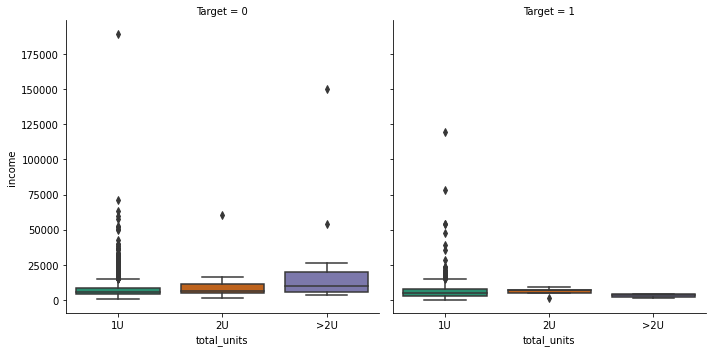

<Figure size 432x288 with 0 Axes>

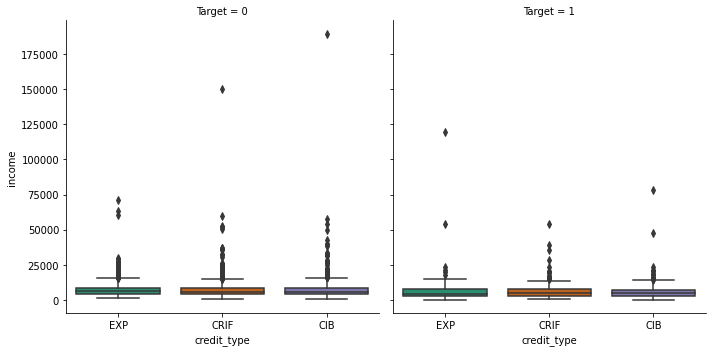

<Figure size 432x288 with 0 Axes>

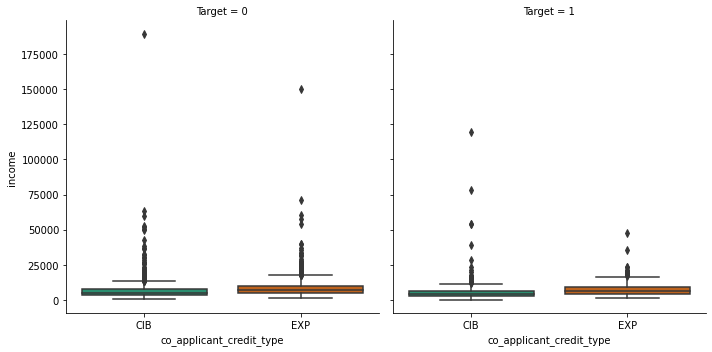

<Figure size 432x288 with 0 Axes>

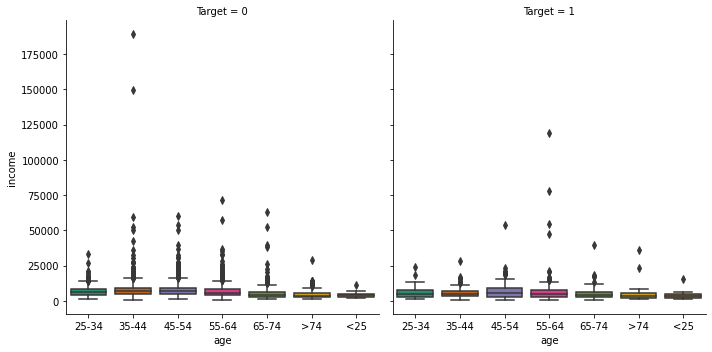

<Figure size 432x288 with 0 Axes>

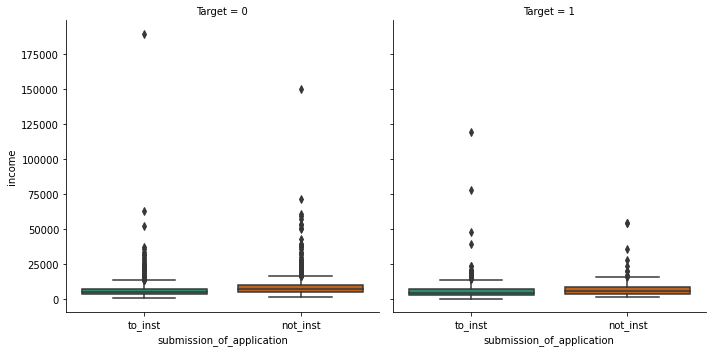

<Figure size 432x288 with 0 Axes>

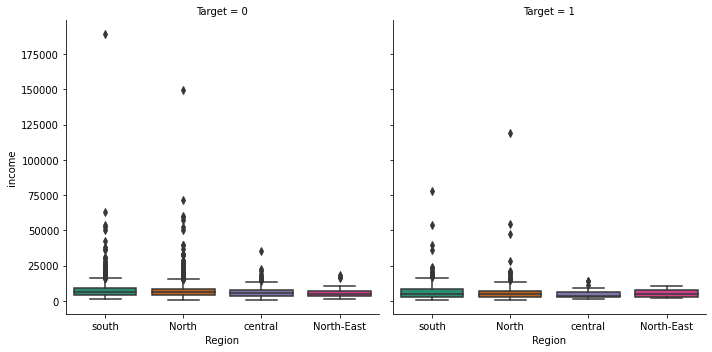

<Figure size 432x288 with 0 Axes>

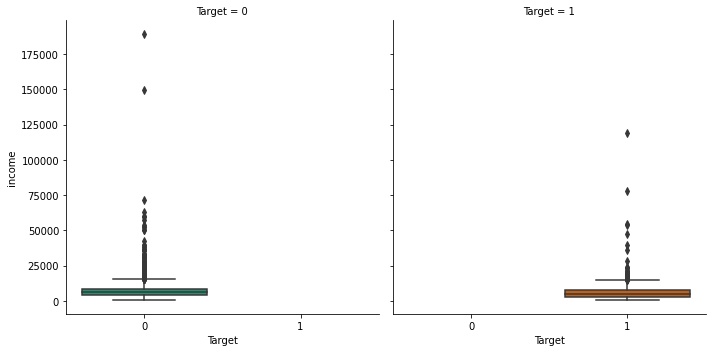

<Figure size 432x288 with 0 Axes>

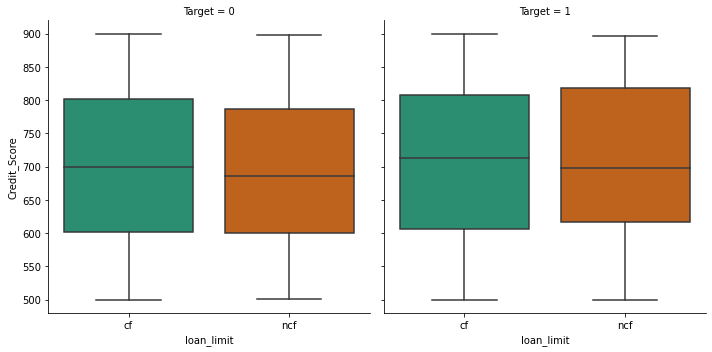

<Figure size 432x288 with 0 Axes>

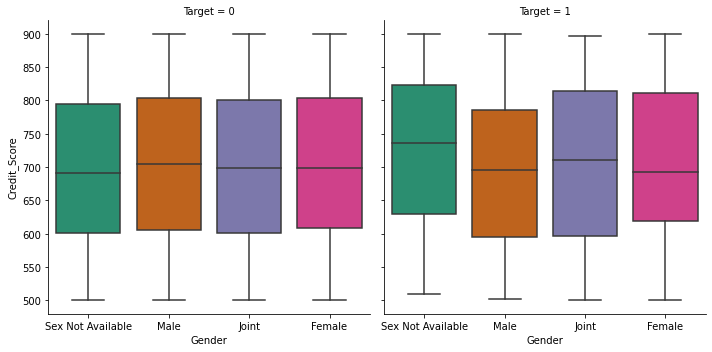

<Figure size 432x288 with 0 Axes>

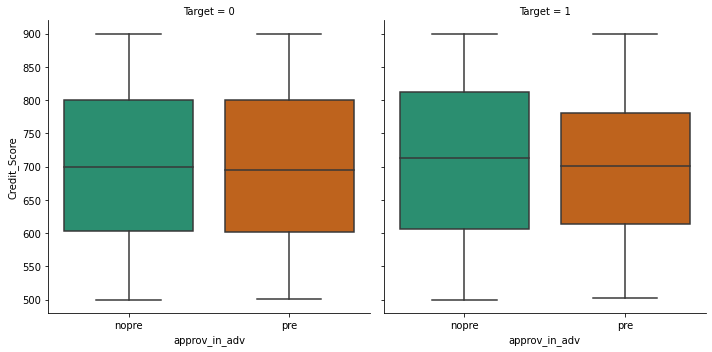

<Figure size 432x288 with 0 Axes>

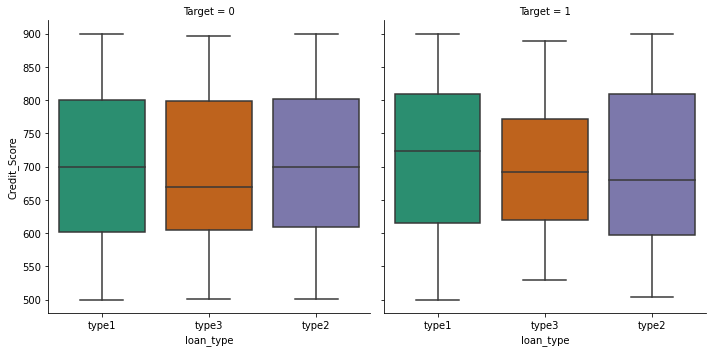

<Figure size 432x288 with 0 Axes>

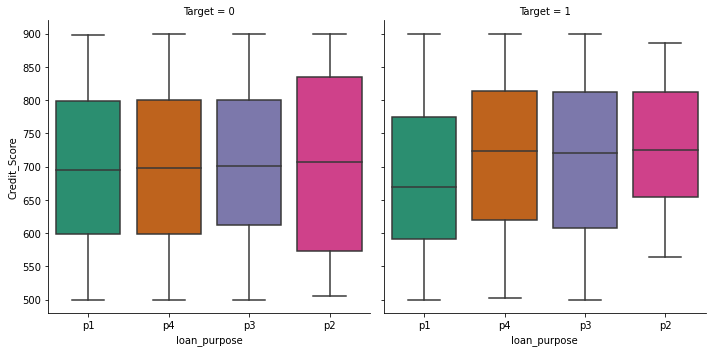

<Figure size 432x288 with 0 Axes>

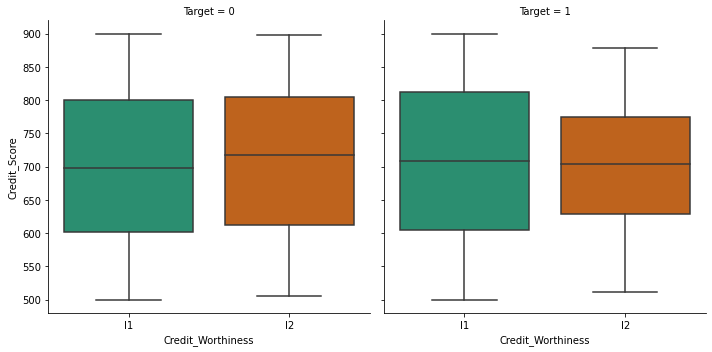

<Figure size 432x288 with 0 Axes>

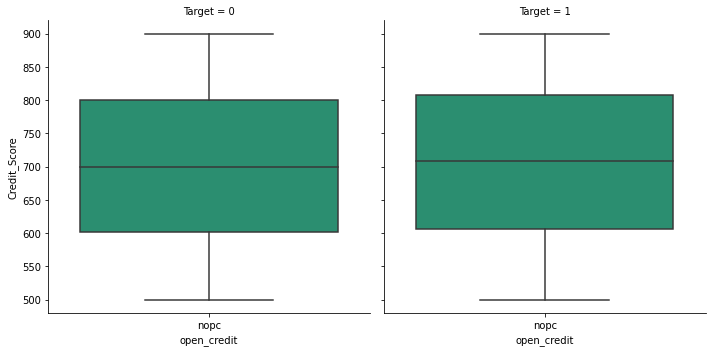

<Figure size 432x288 with 0 Axes>

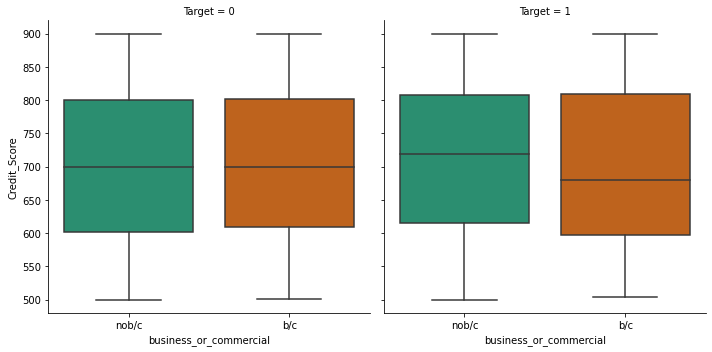

<Figure size 432x288 with 0 Axes>

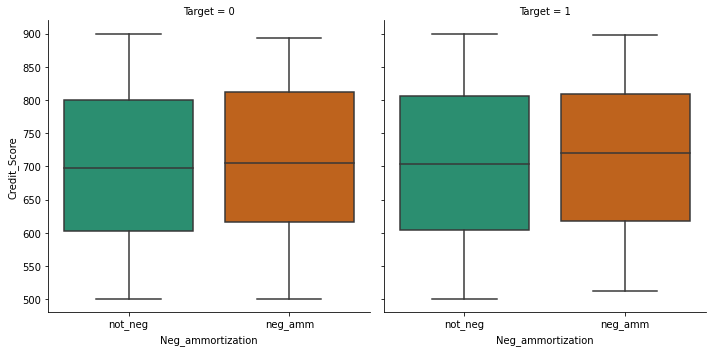

<Figure size 432x288 with 0 Axes>

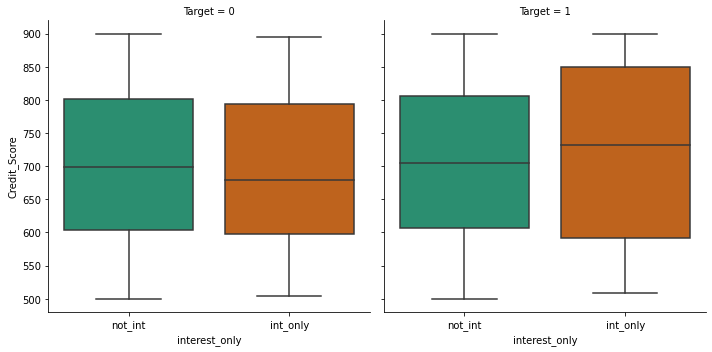

<Figure size 432x288 with 0 Axes>

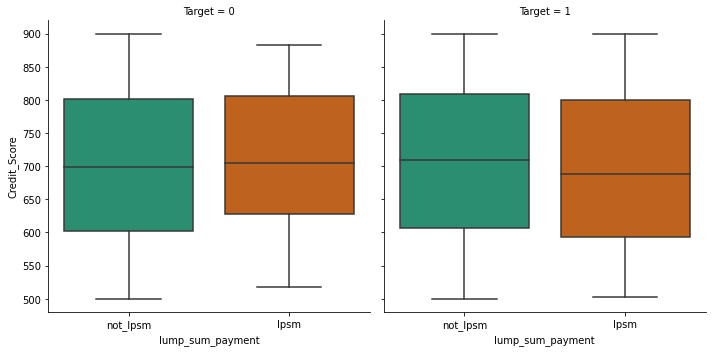

<Figure size 432x288 with 0 Axes>

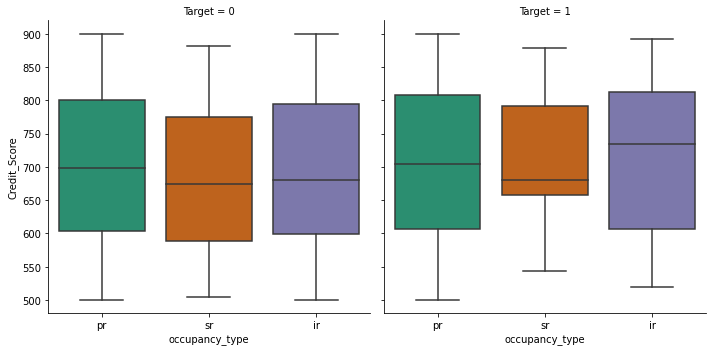

<Figure size 432x288 with 0 Axes>

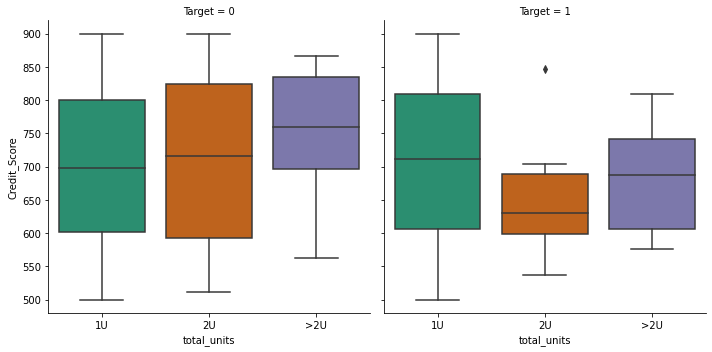

<Figure size 432x288 with 0 Axes>

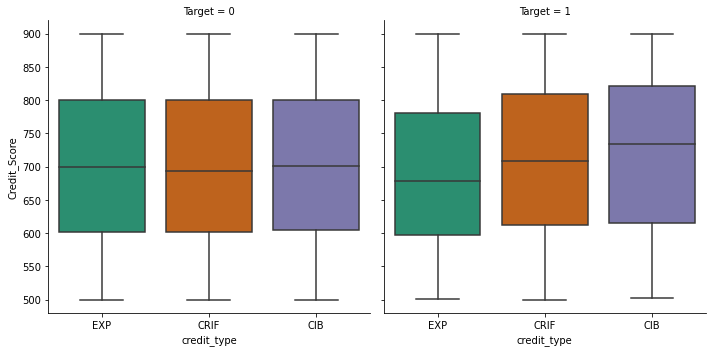

<Figure size 432x288 with 0 Axes>

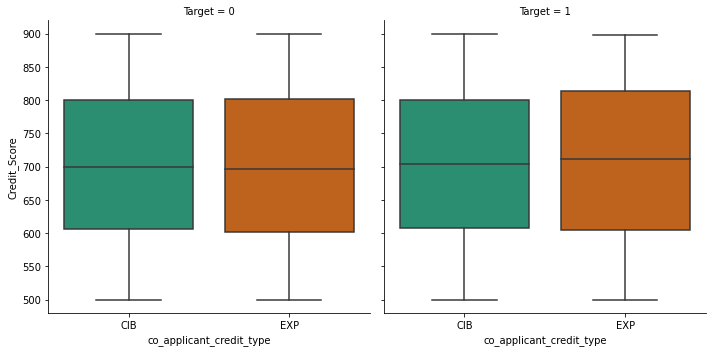

<Figure size 432x288 with 0 Axes>

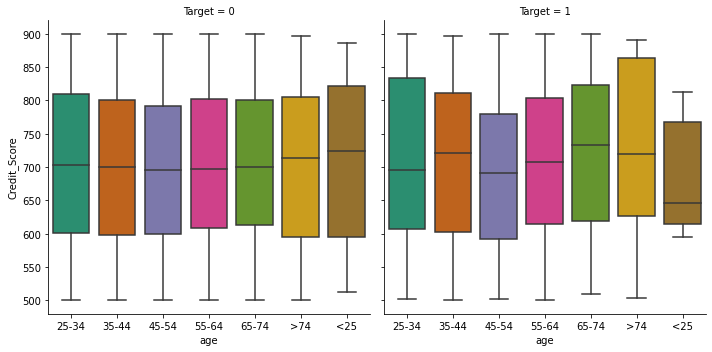

<Figure size 432x288 with 0 Axes>

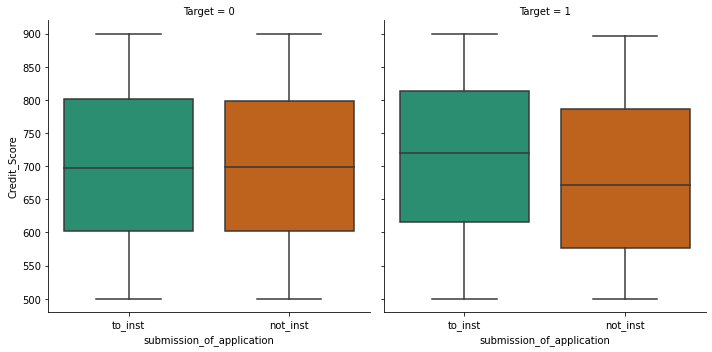

<Figure size 432x288 with 0 Axes>

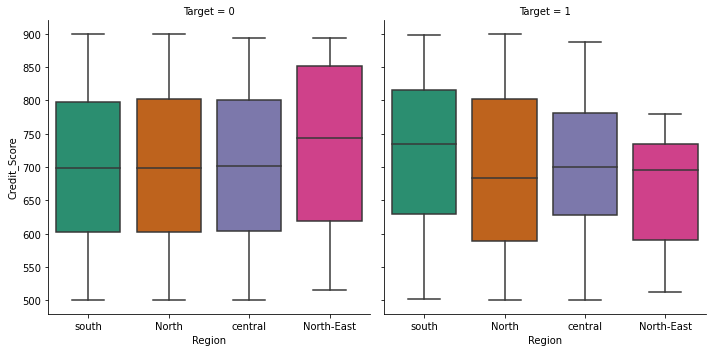

<Figure size 432x288 with 0 Axes>

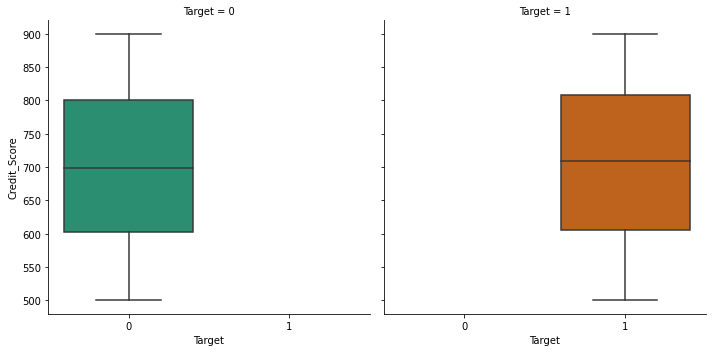

<Figure size 432x288 with 0 Axes>

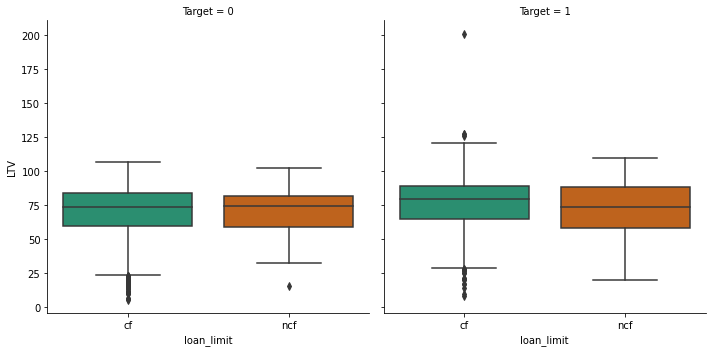

<Figure size 432x288 with 0 Axes>

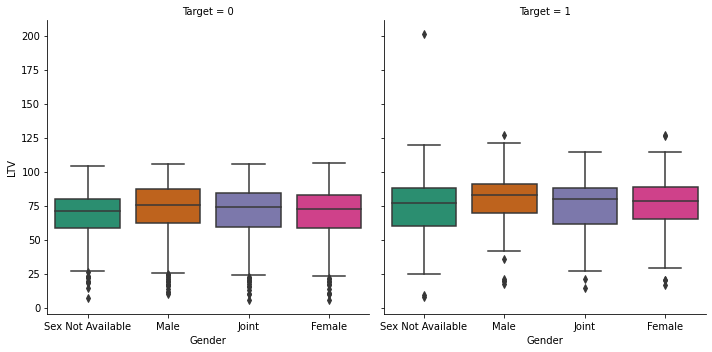

<Figure size 432x288 with 0 Axes>

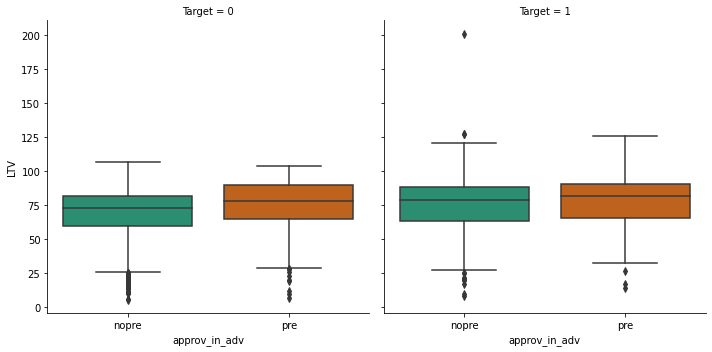

<Figure size 432x288 with 0 Axes>

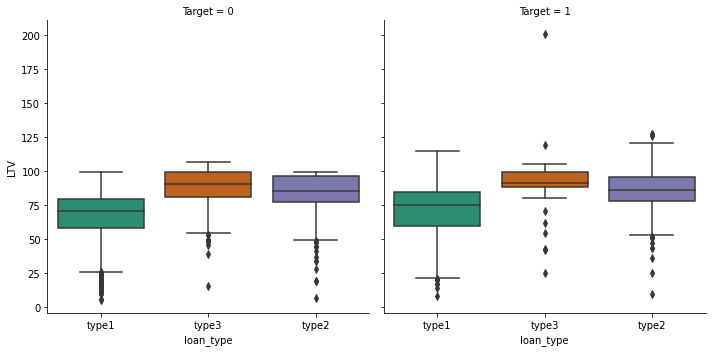

<Figure size 432x288 with 0 Axes>

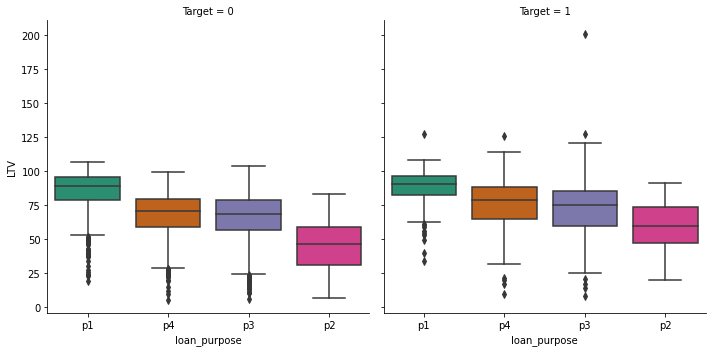

<Figure size 432x288 with 0 Axes>

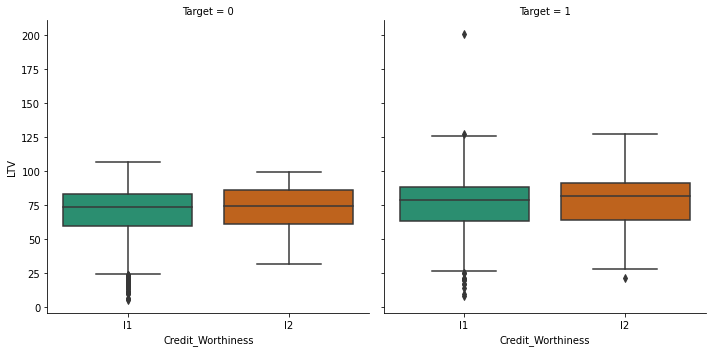

<Figure size 432x288 with 0 Axes>

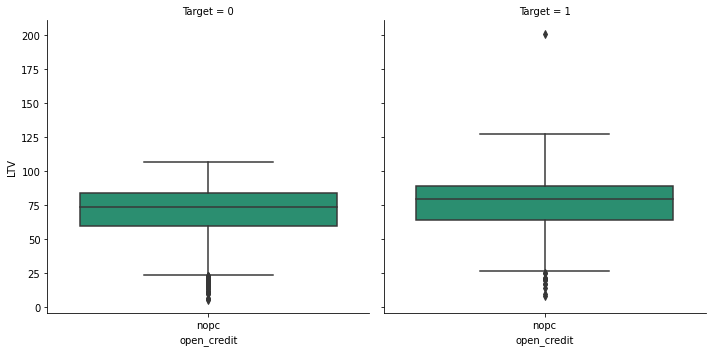

<Figure size 432x288 with 0 Axes>

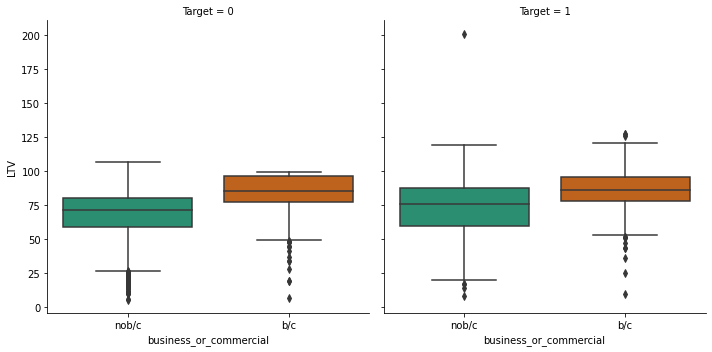

<Figure size 432x288 with 0 Axes>

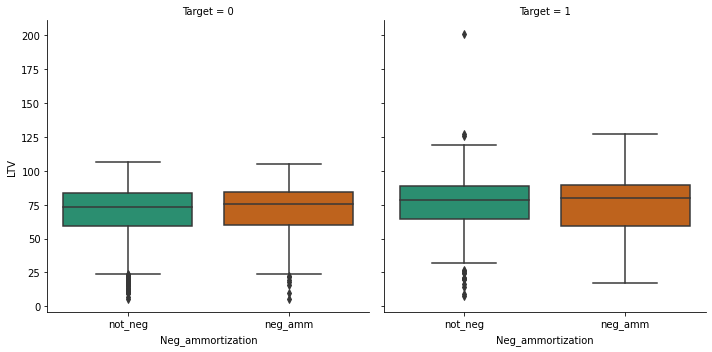

<Figure size 432x288 with 0 Axes>

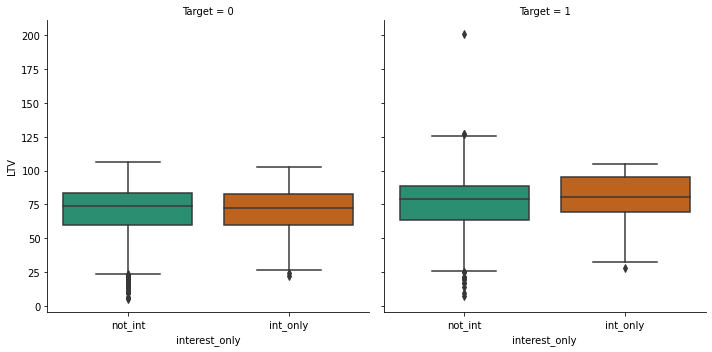

<Figure size 432x288 with 0 Axes>

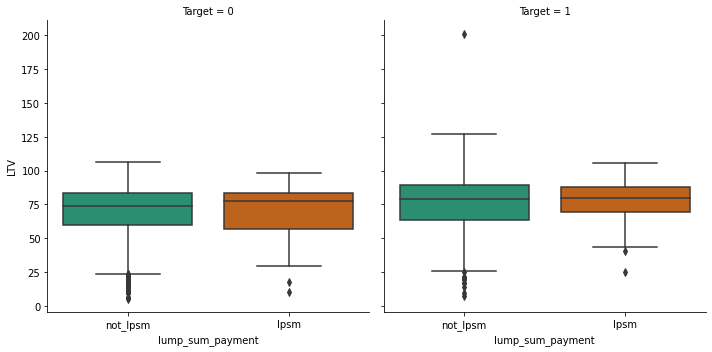

<Figure size 432x288 with 0 Axes>

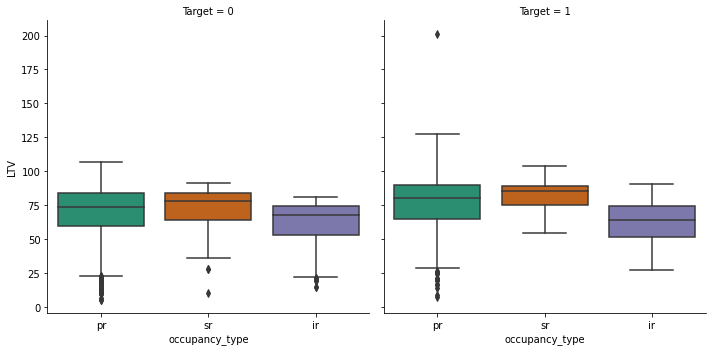

<Figure size 432x288 with 0 Axes>

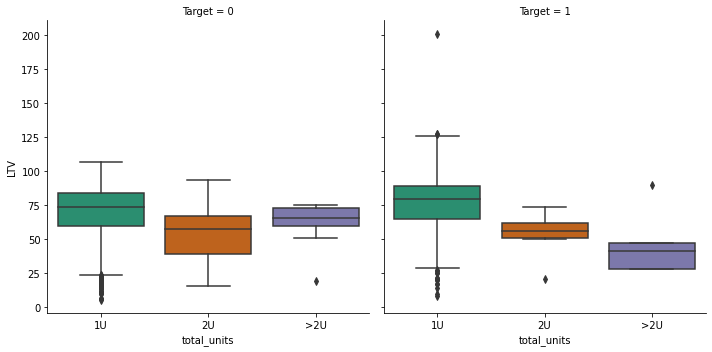

<Figure size 432x288 with 0 Axes>

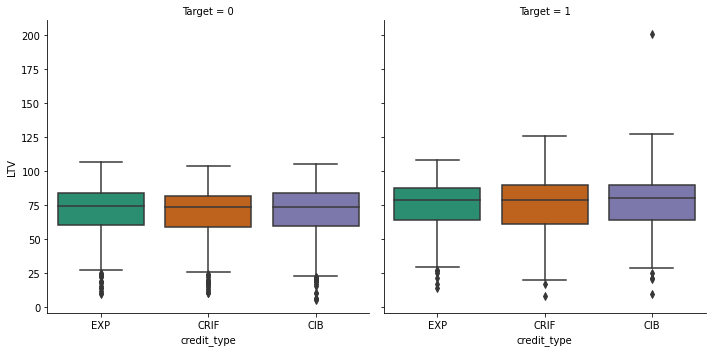

<Figure size 432x288 with 0 Axes>

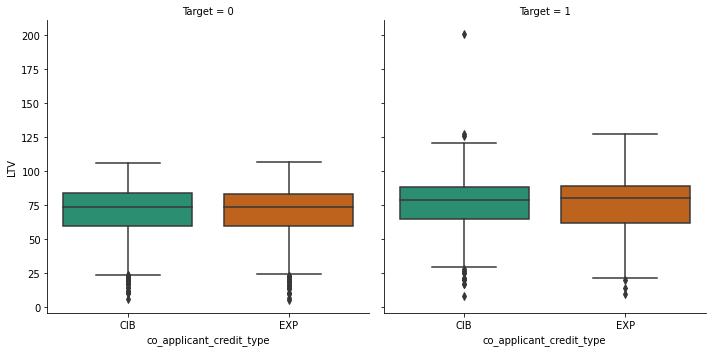

<Figure size 432x288 with 0 Axes>

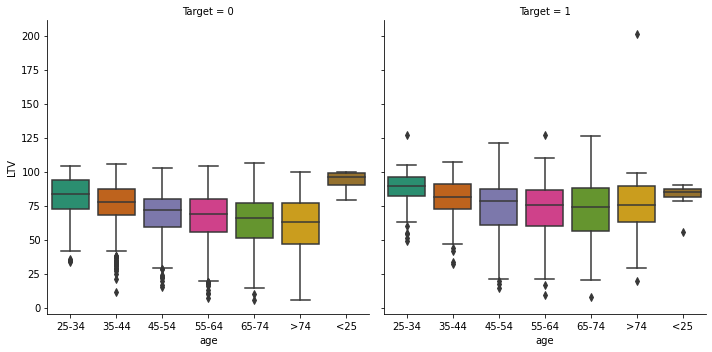

<Figure size 432x288 with 0 Axes>

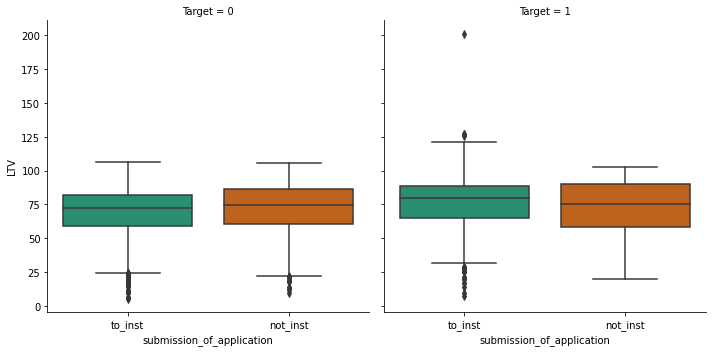

<Figure size 432x288 with 0 Axes>

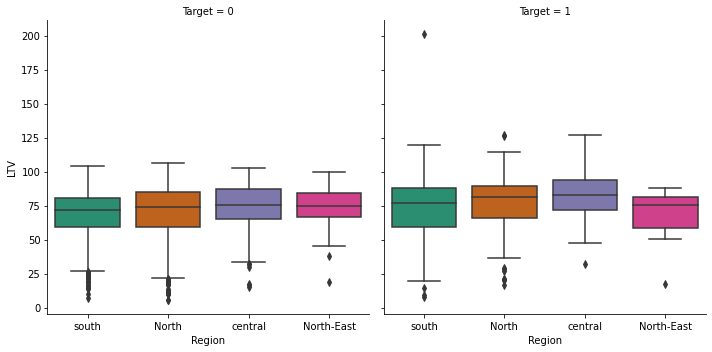

<Figure size 432x288 with 0 Axes>

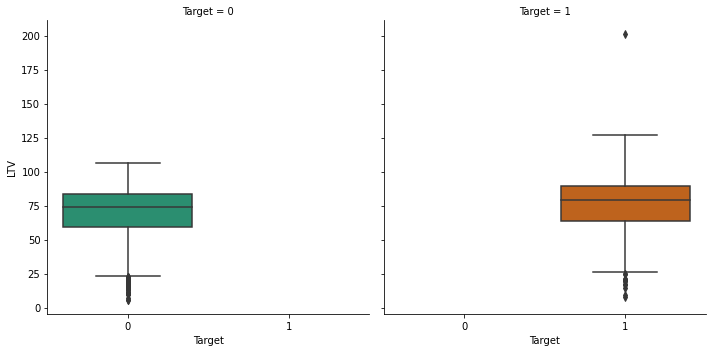

<Figure size 432x288 with 0 Axes>

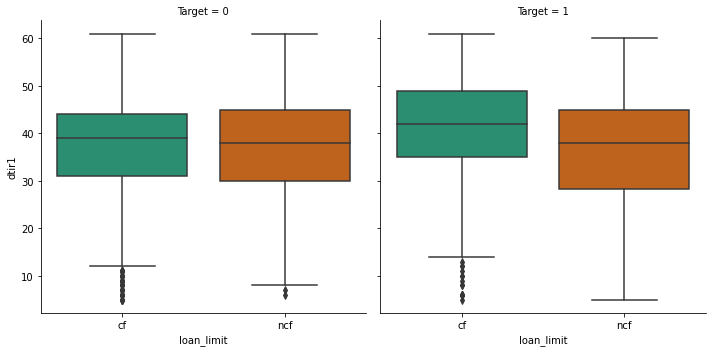

<Figure size 432x288 with 0 Axes>

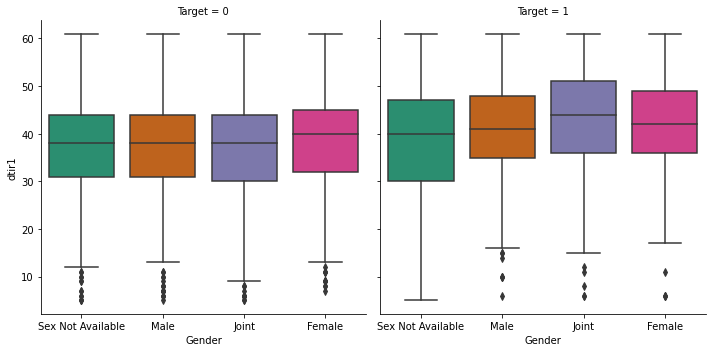

<Figure size 432x288 with 0 Axes>

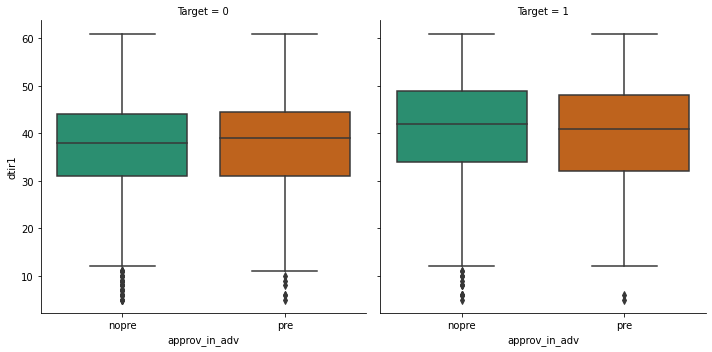

<Figure size 432x288 with 0 Axes>

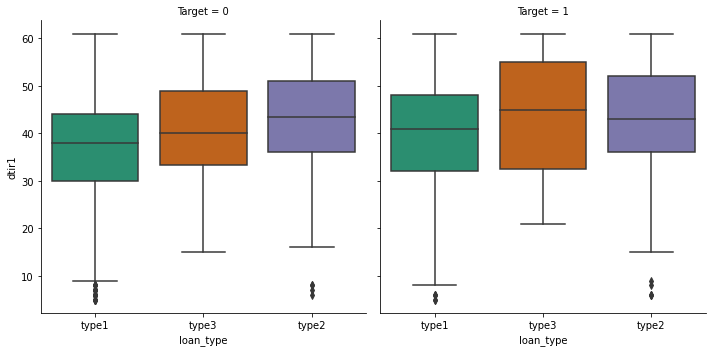

<Figure size 432x288 with 0 Axes>

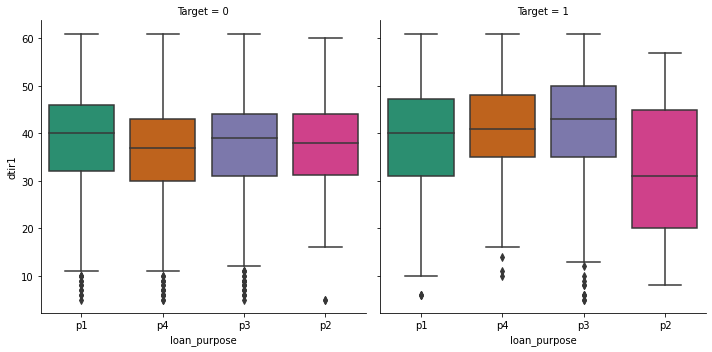

<Figure size 432x288 with 0 Axes>

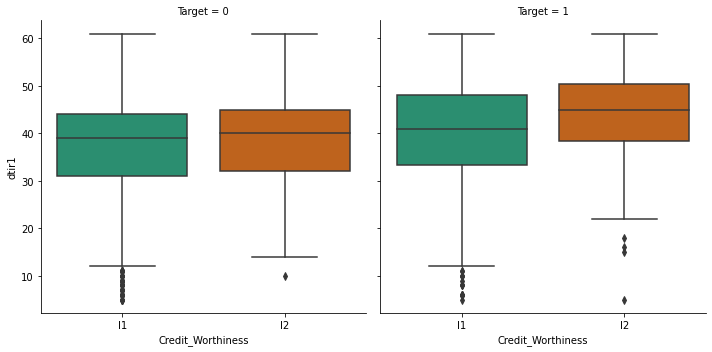

<Figure size 432x288 with 0 Axes>

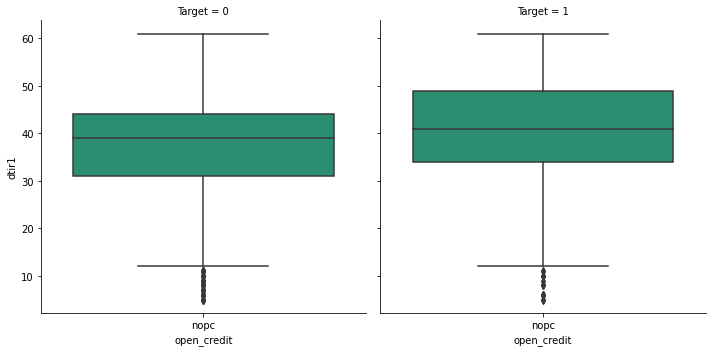

<Figure size 432x288 with 0 Axes>

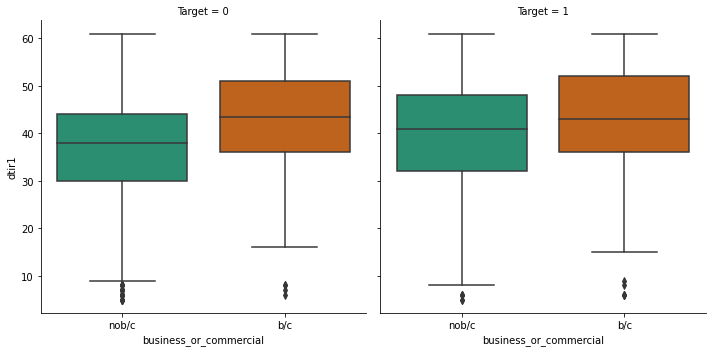

<Figure size 432x288 with 0 Axes>

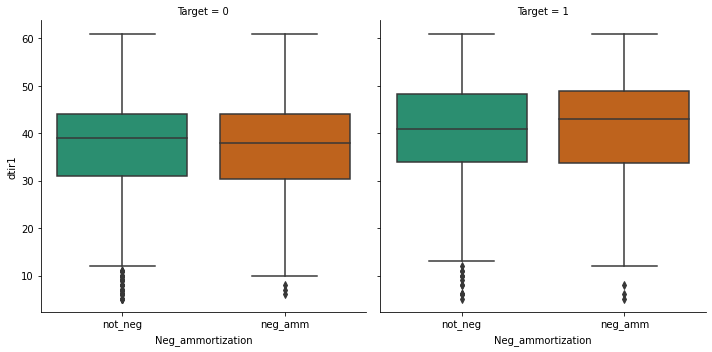

<Figure size 432x288 with 0 Axes>

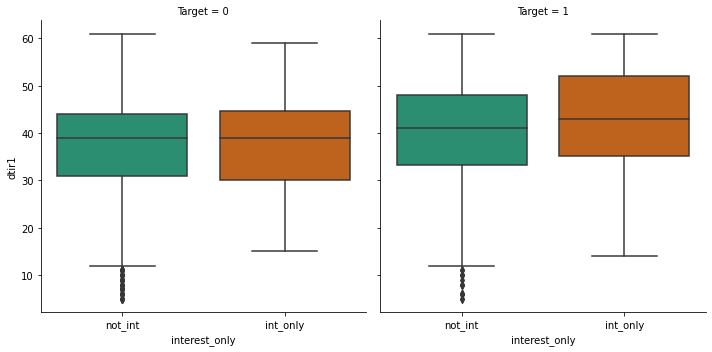

<Figure size 432x288 with 0 Axes>

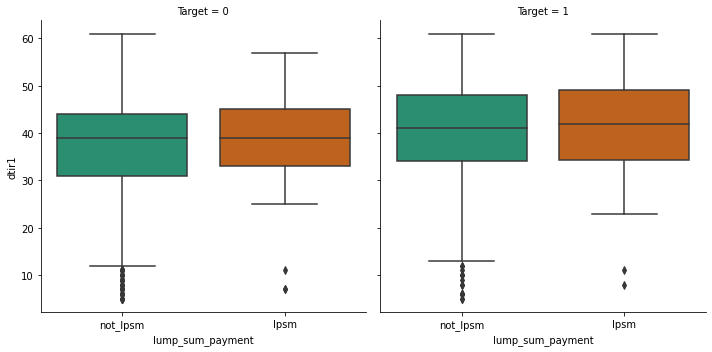

<Figure size 432x288 with 0 Axes>

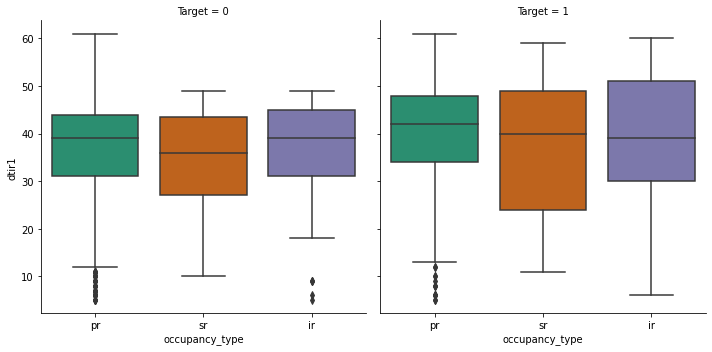

<Figure size 432x288 with 0 Axes>

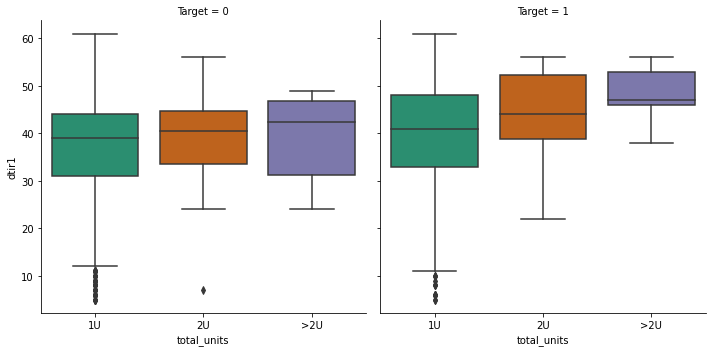

<Figure size 432x288 with 0 Axes>

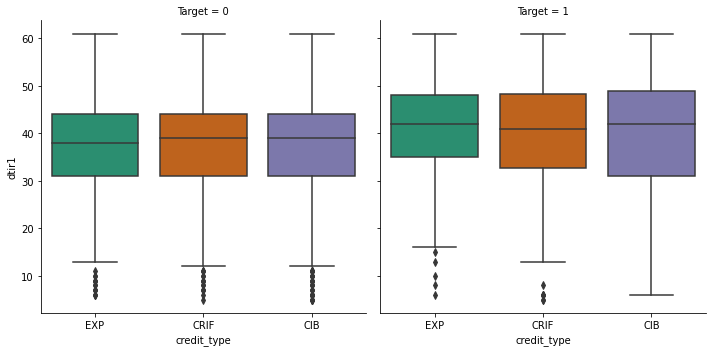

<Figure size 432x288 with 0 Axes>

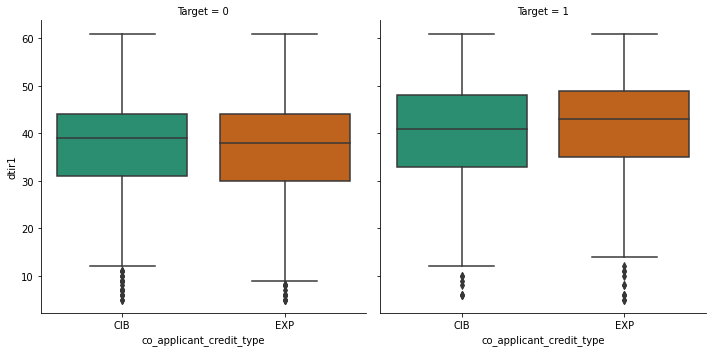

<Figure size 432x288 with 0 Axes>

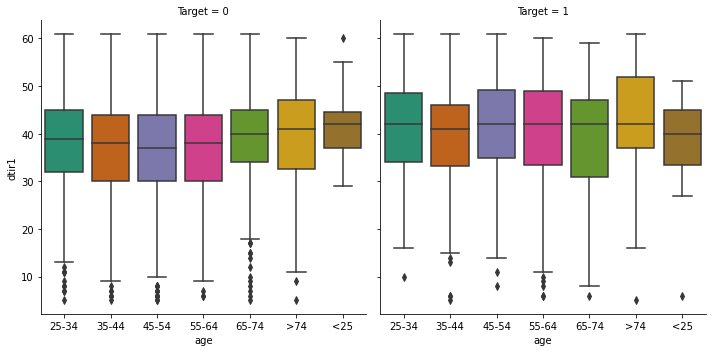

<Figure size 432x288 with 0 Axes>

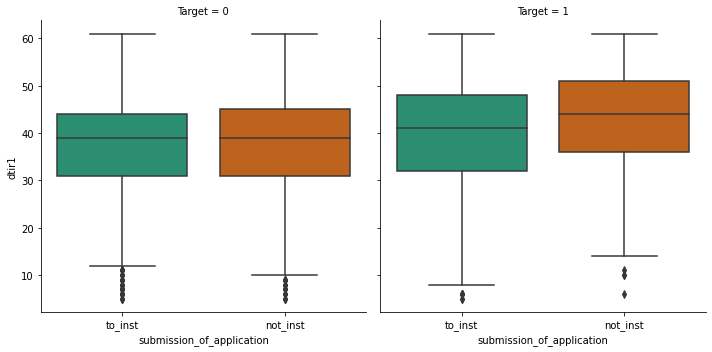

<Figure size 432x288 with 0 Axes>

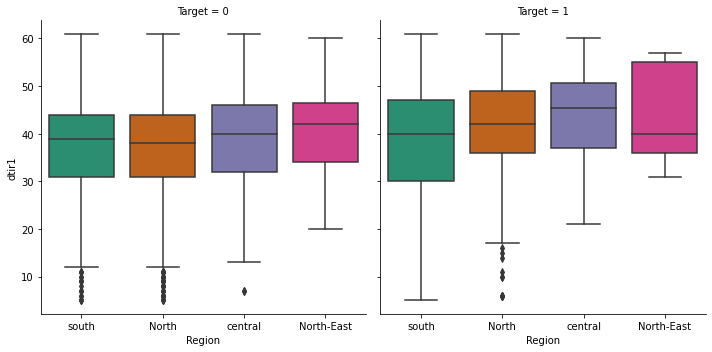

<Figure size 432x288 with 0 Axes>

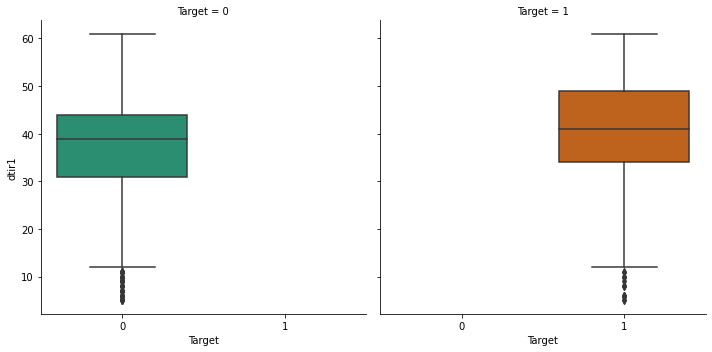

In [ ]:
for var in num_columns:
    for i in cat_columns:
        plt.figure()
        sns.catplot(x=i,y=var,data=bank,kind='box',col='Target',palette='Dark2')

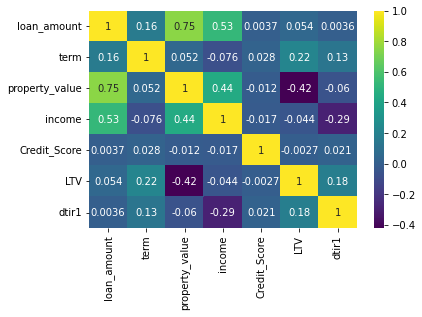

In [ ]:
# Heatmap representation of correlation
sns.heatmap(bank.corr(), annot=True, cmap = "viridis")

<Figure size 720x288 with 0 Axes>

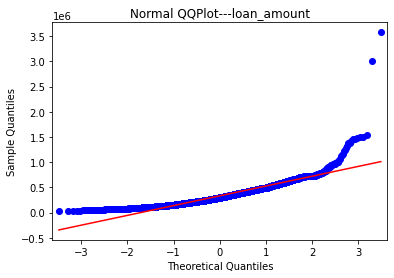

<Figure size 720x288 with 0 Axes>

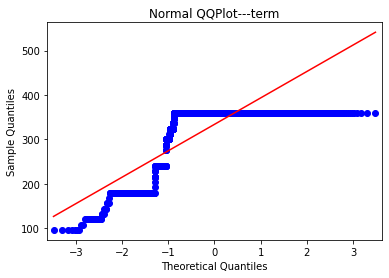

<Figure size 720x288 with 0 Axes>

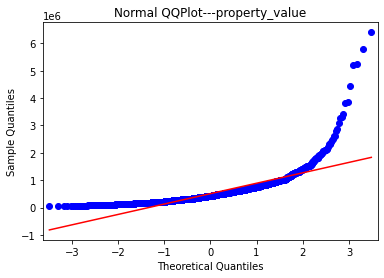

<Figure size 720x288 with 0 Axes>

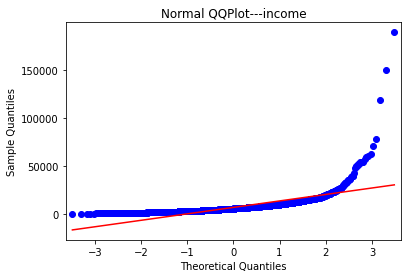

<Figure size 720x288 with 0 Axes>

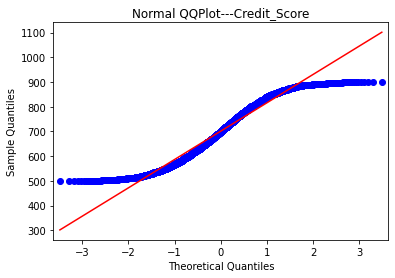

<Figure size 720x288 with 0 Axes>

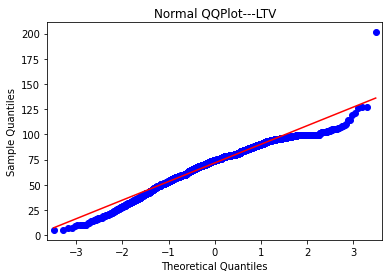

<Figure size 720x288 with 0 Axes>

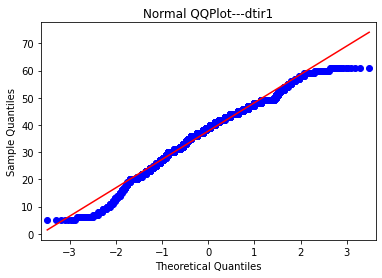

In [ ]:
import statsmodels.api as sm
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    sm.qqplot(df,line='s')
    plt.title("Normal QQPlot---"+var)
    plt.show()
for var in num_columns:
    qq_plots(bank[var])


## Scikit-Learn

In [45]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,QuantileTransformer
from sklearn.feature_selection import VarianceThreshold

In [46]:
college['Target'] = college['Target'].replace(['no','yes'],['0','1'])

In [47]:
# Separate the features variables from the Target Variables

X = college.drop(["Target"],axis = 1)
y = college['Target']

In [48]:
from statsmodels.stats.descriptivestats import describe
describe(X)

Age   Internships          CGPA         Hostel  \
nobs              2966.000000  2.966000e+03  2.966000e+03   2.966000e+03   
missing              0.000000  0.000000e+00  0.000000e+00   0.000000e+00   
mean                21.485840  7.036413e-01  7.073837e+00   2.690492e-01   
std_err              0.024328  1.359133e-02  1.776956e-02   8.144184e-03   
upper_ci            21.533522  7.302798e-01  7.108665e+00   2.850115e-01   
lower_ci            21.438157  6.770027e-01  7.039009e+00   2.530869e-01   
std                  1.324933  7.401975e-01  9.677480e-01   4.435404e-01   
iqr                  1.000000  1.000000e+00  2.000000e+00   1.000000e+00   
iqr_normal           0.741301  7.413011e-01  1.482602e+00   7.413011e-01   
mad                  0.992334  6.315216e-01  7.857426e-01   3.933235e-01   
mad_normal           1.243706  7.914949e-01  9.847823e-01   4.929579e-01   
coef_var             0.061665  1.051953e+00  1.368067e-01   1.648547e+00   
range               11.000000  3.000000e+00  4.000000e+00   1.000000e+00   
max                 30.000000  3.000000e+00  9.000000e+00   1.000000e+00   
min                 19.000000  0.000000e+00  5.000000e+00   0.000000e+00   
skew                 0.995595  7.889434e-01  6.218965e-03   1.041572e+00   
kurtosis             5.824473  3.082264e+00  2.242216e+00   2.084873e+00   
jarque_bera       1475.892299  3.085251e+02  7.098526e+01   6.397847e+02   
jarque_bera_pval     0.000000  1.010710e-67  3.852526e-16  1.181722e-139   
mode                21.000000  0.000000e+00  7.000000e+00   0.000000e+00   
mode_freq            0.365475  4.487525e-01  3.223196e-01   7.309508e-01   
median              21.000000  1.000000e+00  7.000000e+00   0.000000e+00   
1%                  19.000000  0.000000e+00  5.000000e+00   0.000000e+00   
5%                  19.000000  0.000000e+00  6.000000e+00   0.000000e+00   
10%                 20.000000  0.000000e+00  6.000000e+00   0.000000e+00   
25%                 21.000000  0.000000e+00  6.000000e+00   0.000000e+00   
50%                 21.000000  1.000000e+00  7.000000e+00   0.000000e+00   
75%                 22.000000  1.000000e+00  8.000000e+00   1.000000e+00   
90%                 23.000000  2.000000e+00  8.000000e+00   1.000000e+00   
95%                 24.000000  2.000000e+00  9.000000e+00   1.000000e+00   
99%                 26.000000  3.000000e+00  9.000000e+00   1.000000e+00   

                  HistoryOfBacklogs  
nobs                   2.966000e+03  
missing                0.000000e+00  
mean                   1.921780e-01  
std_err                7.235980e-03  
upper_ci               2.063603e-01  
lower_ci               1.779958e-01  
std                    3.940787e-01  
iqr                    0.000000e+00  
iqr_normal             0.000000e+00  
mad                    3.104913e-01  
mad_normal             3.891431e-01  
coef_var               2.050592e+00  
range                  1.000000e+00  
max                    1.000000e+00  
min                    0.000000e+00  
skew                   1.562500e+00  
kurtosis               3.441405e+00  
jarque_bera            1.230947e+03  
jarque_bera_pval      5.050064e-268  
mode                   0.000000e+00  
mode_freq              8.078220e-01  
median                 0.000000e+00  
1%                     0.000000e+00  
5%                     0.000000e+00  
10%                    0.000000e+00  
25%                    0.000000e+00  
50%                    0.000000e+00  
75%                    0.000000e+00  
90%                    1.000000e+00  
95%                    1.000000e+00  
99%                    1.000000e+00

In [51]:
X[num_columns]

Age  Internships  CGPA  Hostel  HistoryOfBacklogs
0      22            1     8       1                  1
1      21            0     7       1                  1
2      22            1     6       0                  0
3      21            0     8       0                  1
4      22            0     8       1                  0
...   ...          ...   ...     ...                ...
2961   23            0     7       0                  0
2962   23            1     7       1                  0
2963   22            1     7       0                  0
2964   22            1     7       0                  0
2965   23            0     8       0                  0

[2966 rows x 5 columns]

In [58]:
# You can perform Box Cox or Yeo-Johnson (Non Normal transformation)
new_cols = num_columns
bctrans = PowerTransformer(method = 'yeo-johnson').fit(X[num_columns])
X1 = pd.DataFrame(bctrans.transform(X[num_columns]), columns = new_cols)
X1.tail()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs
2961  1.167312    -1.061312 -0.067664 -0.606697          -0.487746
2962  1.167312     0.647971 -0.067664  1.648269          -0.487746
2963  0.498093     0.647971 -0.067664 -0.606697          -0.487746
2964  0.498093     0.647971 -0.067664 -0.606697          -0.487746
2965  1.167312    -1.061312  0.957441 -0.606697          -0.487746

In [59]:
X = X.reset_index()

In [60]:
X.tail()

index  Age Gender                  Stream  Internships  CGPA  Hostel  \
2961   2961   23   Male  Information Technology            0     7       0   
2962   2962   23   Male              Mechanical            1     7       1   
2963   2963   22   Male  Information Technology            1     7       0   
2964   2964   22   Male        Computer Science            1     7       0   
2965   2965   23   Male                   Civil            0     8       0   

      HistoryOfBacklogs  
2961                  0  
2962                  0  
2963                  0  
2964                  0  
2965                  0

In [61]:
X.drop('index',axis = 1)
X = pd.concat([X1,X[cat_columns.drop('Target')]],axis = 1)


In [63]:
X.tail()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs Gender  \
2961  1.167312    -1.061312 -0.067664 -0.606697          -0.487746   Male   
2962  1.167312     0.647971 -0.067664  1.648269          -0.487746   Male   
2963  0.498093     0.647971 -0.067664 -0.606697          -0.487746   Male   
2964  0.498093     0.647971 -0.067664 -0.606697          -0.487746   Male   
2965  1.167312    -1.061312  0.957441 -0.606697          -0.487746   Male   

                      Stream  
2961  Information Technology  
2962              Mechanical  
2963  Information Technology  
2964        Computer Science  
2965                   Civil

In [62]:
X.shape

(2966, 7)

In [64]:
X.dropna(inplace = True)

In [65]:
# Have a list of categorical and numerical columns

categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns

In [66]:
# Encoding Categorical Variables on the entire Feature data

X = pd.get_dummies(data = X, prefix = categorical_columns, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
X.head()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs  Gender_Male  \
0  0.498093     0.647971  0.957441  1.648269           2.050246            1   
1 -0.290019    -1.061312 -0.067664  1.648269           2.050246            0   
2  0.498093     0.647971 -1.111338 -0.606697          -0.487746            0   
3 -0.290019    -1.061312  0.957441 -0.606697           2.050246            1   
4  0.498093    -1.061312  0.957441  1.648269          -0.487746            1   

   Stream_Computer Science  Stream_Electrical  \
0                        0                  0   
1                        1                  0   
2                        0                  0   
3                        0                  0   
4                        0                  0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                     1                              0   
1                                     0                              0   
2                                     0                              1   
3                                     0                              1   
4                                     0                              0   

   Stream_Mechanical  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1

In [67]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
# Capture the columns of training data

col_names = X_train.columns

In [69]:
X_test.head()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs  \
2676 -0.290019    -1.061312  0.957441 -0.606697          -0.487746   
599  -0.290019     1.463898 -1.111338  1.648269          -0.487746   
118   1.739466     1.973455 -2.176664 -0.606697           2.050246   
252   0.498093    -1.061312 -1.111338 -0.606697          -0.487746   
1626 -1.225083     0.647971 -0.067664 -0.606697          -0.487746   

      Gender_Male  Stream_Computer Science  Stream_Electrical  \
2676            1                        0                  0   
599             1                        0                  0   
118             1                        0                  0   
252             1                        0                  0   
1626            1                        0                  0   

      Stream_Electronics And Communication  Stream_Information Technology  \
2676                                     0                              1   
599                                      0                              1   
118                                      0                              1   
252                                      1                              0   
1626                                     0                              1   

      Stream_Mechanical  
2676                  0  
599                   0  
118                   0  
252                   0  
1626                  0

## Feature Selection

### Constant Features Removal (Zero Variance Removal)

In [70]:
# Filter out any variables with a single constant value

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [71]:
constant_filter.get_support().sum()

11

In [72]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [74]:
col_names = col_names[constant_filter.get_support()]

In [75]:
col_names

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'Gender_Male', 'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')

In [76]:
X_train = pd.DataFrame(constant_filter.transform(X_train),columns = col_names)
X_test = pd.DataFrame(constant_filter.transform(X_test),columns = col_names)

In [77]:
X_train.head()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs  Gender_Male  \
0 -1.225083     0.647971  0.957441  1.648269          -0.487746          1.0   
1 -2.343591     0.647971 -1.111338 -0.606697          -0.487746          1.0   
2  0.498093    -1.061312 -2.176664  1.648269          -0.487746          1.0   
3  2.231714     0.647971  0.957441 -0.606697          -0.487746          1.0   
4 -0.290019    -1.061312 -1.111338 -0.606697          -0.487746          1.0   

   Stream_Computer Science  Stream_Electrical  \
0                      0.0                0.0   
1                      1.0                0.0   
2                      0.0                1.0   
3                      1.0                0.0   
4                      0.0                0.0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                   0.0                            1.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   Stream_Mechanical  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

### Quasi Constant Removal (Near Zero Variance)

In [ ]:
0.995*0.005

0.004975

In [78]:
# Set the threshold for Near Zero Variance and run it on the training data

quasi_constant_filter = VarianceThreshold(threshold=0.001)
quasi_constant_filter.fit(X_train)

VarianceThreshold(threshold=0.001)

In [79]:
# Find the number of variables that get retained and collect their column names
quasi_constant_filter.get_support().sum()
col_names = col_names[quasi_constant_filter.get_support()]

In [80]:
quasi_constant_filter.get_support().sum()

11

In [81]:
quasi_constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [82]:
# Remove the eliminated columns from both the training and the testing data and retain only the survived columns

X_train = pd.DataFrame(quasi_constant_filter.transform(X_train),columns = col_names)
X_test = pd.DataFrame(quasi_constant_filter.transform(X_test), columns = col_names)

In [83]:
X_train.head()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs  Gender_Male  \
0 -1.225083     0.647971  0.957441  1.648269          -0.487746          1.0   
1 -2.343591     0.647971 -1.111338 -0.606697          -0.487746          1.0   
2  0.498093    -1.061312 -2.176664  1.648269          -0.487746          1.0   
3  2.231714     0.647971  0.957441 -0.606697          -0.487746          1.0   
4 -0.290019    -1.061312 -1.111338 -0.606697          -0.487746          1.0   

   Stream_Computer Science  Stream_Electrical  \
0                      0.0                0.0   
1                      1.0                0.0   
2                      0.0                1.0   
3                      1.0                0.0   
4                      0.0                0.0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                   0.0                            1.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   Stream_Mechanical  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

### Remove Duplicate Features

In [84]:
# Transpose the rows to columns and vice versa
X_train_T = X_train.T
X_test_T = X_test.T

In [85]:
# Convert the matrix to a Data Frame
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [86]:
X_train_T.shape, X_test_T.shape

((11, 2076), (11, 890))

In [87]:
# Count the number of duplicated rows

X_train_T.duplicated().sum()

0

In [88]:
# Get the names of duplicated features
duplicated_features = X_train_T.duplicated()
duplicated_features

Age                                     False
Internships                             False
CGPA                                    False
Hostel                                  False
HistoryOfBacklogs                       False
Gender_Male                             False
Stream_Computer Science                 False
Stream_Electrical                       False
Stream_Electronics And Communication    False
Stream_Information Technology           False
Stream_Mechanical                       False
dtype: bool

In [89]:
# Remove the features that are identified as duplicates and retain the remaining ones
features_to_keep = [not index for index in duplicated_features]

In [90]:
features_to_keep

[True, True, True, True, True, True, True, True, True, True, True]

In [91]:
# Gather the names of the retained columns
col_names = col_names[features_to_keep]

In [92]:
# Filter the data by removing the duplicate column
X_train = pd.DataFrame(X_train_T[features_to_keep].T,columns = col_names)
X_test = pd.DataFrame(X_test_T[features_to_keep].T,columns = col_names)

In [93]:
X_train.head()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs  Gender_Male  \
0 -1.225083     0.647971  0.957441  1.648269          -0.487746          1.0   
1 -2.343591     0.647971 -1.111338 -0.606697          -0.487746          1.0   
2  0.498093    -1.061312 -2.176664  1.648269          -0.487746          1.0   
3  2.231714     0.647971  0.957441 -0.606697          -0.487746          1.0   
4 -0.290019    -1.061312 -1.111338 -0.606697          -0.487746          1.0   

   Stream_Computer Science  Stream_Electrical  \
0                      0.0                0.0   
1                      1.0                0.0   
2                      0.0                1.0   
3                      1.0                0.0   
4                      0.0                0.0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                   0.0                            1.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   Stream_Mechanical  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

### Correlated Feature Removal

In [94]:
# Take paiwise correlation

corrmat = X_train.corr()

<Axes: >

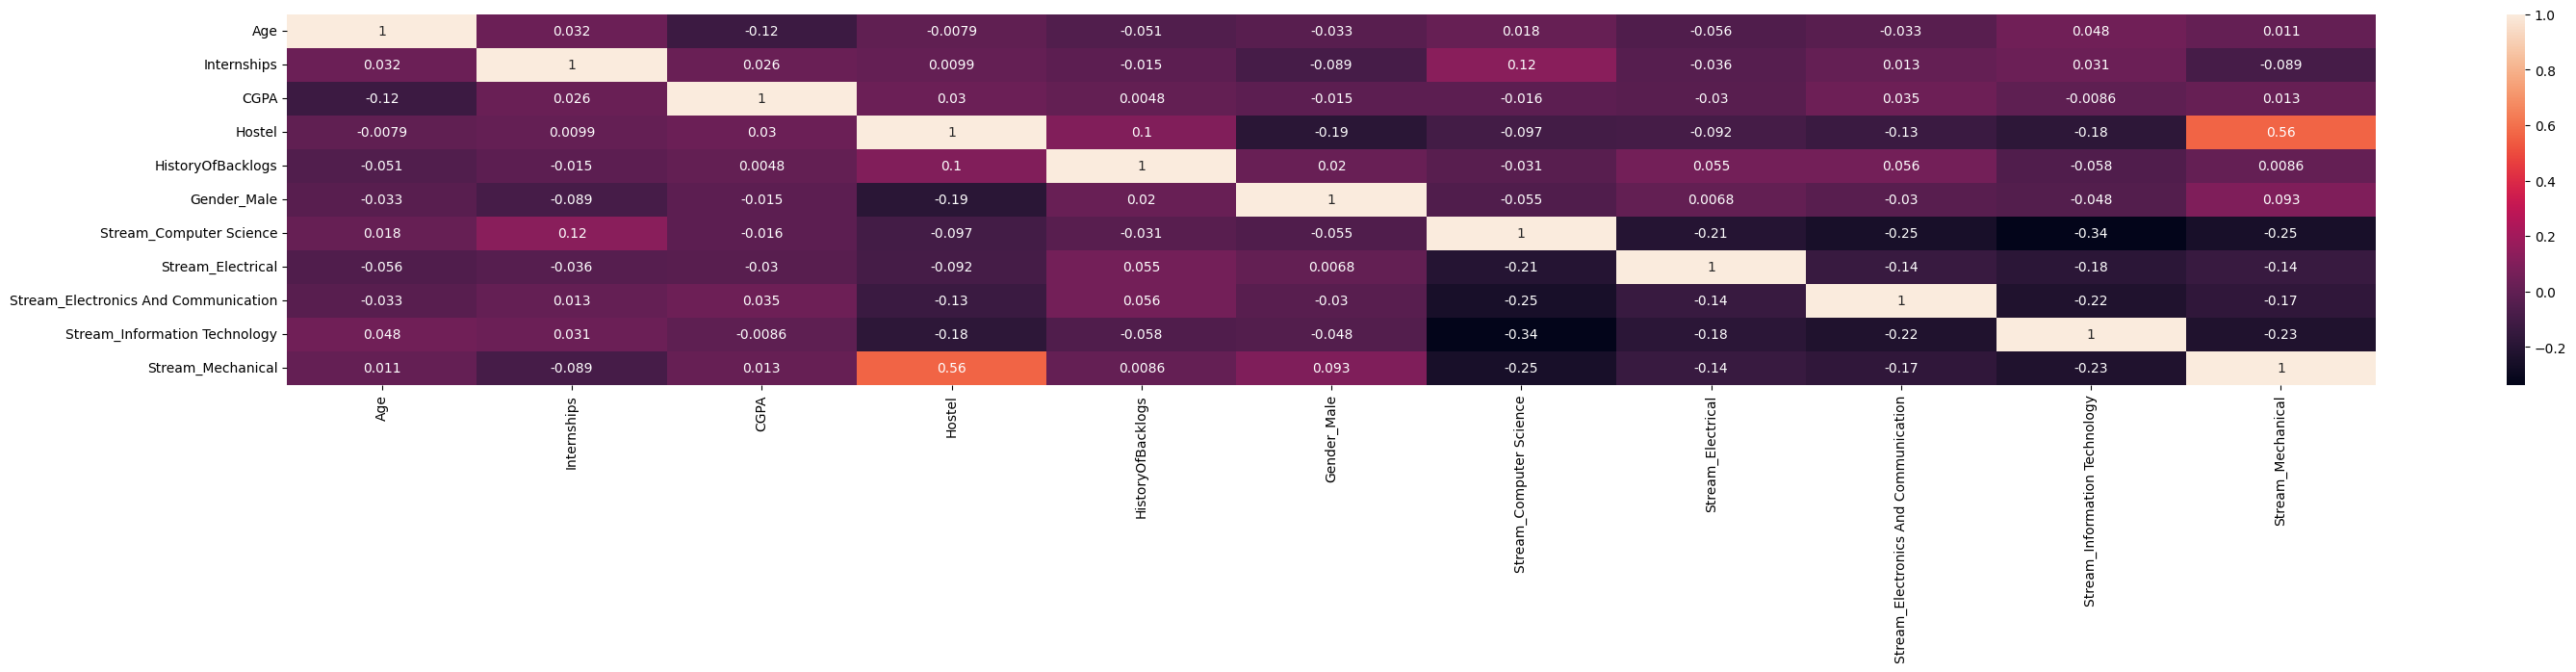

In [104]:
# Heat Map of the correlation

plt.figure(figsize=(35,5))
#sns.heatmap(corrmat, annot = True, cmap = 'viridis')
sns.heatmap(corrmat, annot=True)

In [105]:
# Function to capture pair wise correlations greater than a set threshold

def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])>= threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [106]:
corr_features_1 = get_correlation(X_train, 1)
corr_features_1

set()

In [107]:
col_names

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'Gender_Male', 'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')

In [108]:
# Simple outright dropping of the correlated columns
X_train = X_train.drop(labels=corr_features_1, axis = 1)
X_test = X_test.drop(labels = corr_features_1, axis = 1)

In [109]:
col_names = col_names.drop(corr_features_1)

In [110]:
X_train.columns = col_names
X_test.columns = col_names

In [111]:
X_train.head()

Age  Internships      CGPA    Hostel  HistoryOfBacklogs  Gender_Male  \
0 -1.225083     0.647971  0.957441  1.648269          -0.487746          1.0   
1 -2.343591     0.647971 -1.111338 -0.606697          -0.487746          1.0   
2  0.498093    -1.061312 -2.176664  1.648269          -0.487746          1.0   
3  2.231714     0.647971  0.957441 -0.606697          -0.487746          1.0   
4 -0.290019    -1.061312 -1.111338 -0.606697          -0.487746          1.0   

   Stream_Computer Science  Stream_Electrical  \
0                      0.0                0.0   
1                      1.0                0.0   
2                      0.0                1.0   
3                      1.0                0.0   
4                      0.0                0.0   

   Stream_Electronics And Communication  Stream_Information Technology  \
0                                   0.0                            1.0   
1                                   0.0                            0.0   
2                                   0.0                            0.0   
3                                   0.0                            0.0   
4                                   0.0                            0.0   

   Stream_Mechanical  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

### Feature Grouping and Feature Importance

In [112]:
# Take paiwise correlation

corrmat = X_train.corr()

In [113]:
corr_features_1 = get_correlation(X_train, 0.9)
corr_features_1

set()

In [114]:
# Convert the correlation matrix into a columnal form
corrdata = corrmat.abs().stack()
corrdata

Age                Age                                     1.000000
                   Internships                             0.031771
                   CGPA                                    0.124971
                   Hostel                                  0.007903
                   HistoryOfBacklogs                       0.051352
                                                             ...   
Stream_Mechanical  Stream_Computer Science                 0.249852
                   Stream_Electrical                       0.137071
                   Stream_Electronics And Communication    0.165963
                   Stream_Information Technology           0.225290
                   Stream_Mechanical                       1.000000
Length: 121, dtype: float64

In [115]:
corrdata = corrdata.sort_values(ascending=False)
corrdata

Age                                   Age                                     1.000000
Internships                           Internships                             1.000000
Stream_Information Technology         Stream_Information Technology           1.000000
Stream_Electronics And Communication  Stream_Electronics And Communication    1.000000
Stream_Electrical                     Stream_Electrical                       1.000000
                                                                                ...   
Hostel                                Age                                     0.007903
Stream_Electrical                     Gender_Male                             0.006841
Gender_Male                           Stream_Electrical                       0.006841
CGPA                                  HistoryOfBacklogs                       0.004835
HistoryOfBacklogs                     CGPA                                    0.004835
Length: 121, dtype: float64

In [116]:
corrdata = corrdata[corrdata>=0.9]
corrdata = corrdata[corrdata<1]
corrdata

Series([], dtype: float64)

In [118]:
corrdata

Empty DataFrame
Columns: [features1, features2, corr_value]
Index: []

In [117]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

Empty DataFrame
Columns: [features1, features2, corr_value]
Index: []

In [119]:
# Groups of the correlated features

grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [120]:
correlated_groups_list

[]

In [121]:
for group in correlated_groups_list:
    print(group)

In [122]:
# Feature importance using RF classifier

from sklearn.ensemble import RandomForestClassifier
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    #features = col_names[features]
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    y_train=y_train.astype('int')
    rf.fit(X_train[features], y_train)

    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)


In [123]:
important_features

[]

In [124]:
important_features = pd.DataFrame(important_features)

In [ ]:
important_features.reset_index(inplace=True, drop = True)

In [ ]:
important_features

Empty DataFrame
Columns: []
Index: []

In [ ]:
features_to_consider = set(important_features)

In [ ]:
features_to_discard = set(corr_features_1) - set(features_to_consider)

In [ ]:
features_to_discard = list(features_to_discard)

In [ ]:
features_to_discard

[]

In [ ]:
X_train = X_train.drop(labels = features_to_discard, axis = 1)
X_train.shape

(2828, 38)

In [ ]:
X_test = X_test.drop(labels=features_to_discard, axis = 1)
X_test.shape

(1212, 38)

In [ ]:
X_train.head()

loan_amount      term  property_value    income  Credit_Score       LTV  \
0     1.191357  0.478529        0.725643  0.324175     -1.512385  0.687608   
1    -0.610240 -2.239304       -0.767623  0.611455      0.524903  0.411863   
2     0.757671 -2.182107        0.650147  0.364869      0.439784 -0.107806   
3    -0.118648  0.478529       -0.295218  0.268170     -1.672232  0.376897   
4     0.484321  0.478529        0.543864  0.645213      0.660467 -0.403997   

      dtir1  loan_limit_ncf  Gender_Joint  Gender_Male  \
0  0.261717             0.0           0.0          0.0   
1  0.261717             0.0           0.0          1.0   
2 -0.434502             0.0           1.0          0.0   
3 -0.241722             0.0           0.0          1.0   
4 -1.844742             0.0           1.0          0.0   

   Gender_Sex Not Available  approv_in_adv_pre  loan_type_type2  \
0                       0.0                0.0              0.0   
1                       0.0                0.0              0.0   
2                       0.0                0.0              0.0   
3                       0.0                0.0              0.0   
4                       0.0                0.0              0.0   

   loan_type_type3  loan_purpose_p2  loan_purpose_p3  loan_purpose_p4  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              1.0              0.0   
2              0.0              0.0              1.0              0.0   
3              0.0              0.0              1.0              0.0   
4              0.0              0.0              1.0              0.0   

   Credit_Worthiness_l2  Neg_ammortization_not_neg  interest_only_not_int  \
0                   0.0                        1.0                    1.0   
1                   0.0                        1.0                    1.0   
2                   0.0                        1.0                    1.0   
3                   0.0                        1.0                    1.0   
4                   0.0                        1.0                    1.0   

   lump_sum_payment_not_lpsm  occupancy_type_pr  occupancy_type_sr  \
0                        1.0                1.0                0.0   
1                        1.0                1.0                0.0   
2                        1.0                1.0                0.0   
3                        1.0                1.0                0.0   
4                        1.0                1.0                0.0   

   total_units_2U  total_units_>2U  credit_type_CRIF  credit_type_EXP  \
0             0.0              0.0               0.0              0.0   
1             0.0              0.0               1.0              0.0   
2             0.0              0.0               0.0              1.0   
3             0.0              0.0               1.0              0.0   
4             0.0              0.0               0.0              0.0   

   co_applicant_credit_type_EXP  age_35-44  age_45-54  age_55-64  age_65-74  \
0                           0.0        1.0        0.0        0.0        0.0   
1                           0.0        1.0        0.0        0.0        0.0   
2                           1.0        0.0        0.0        1.0        0.0   
3                           1.0        0.0        1.0        0.0        0.0   
4                           1.0        0.0        0.0        0.0        1.0   

   age_<25  age_>74  submission_of_application_to_inst  Region_North-East  \
0      0.0      0.0                                0.0                0.0   
1      0.0      0.0                                0.0                0.0   
2      0.0      0.0                                1.0                0.0   
3      0.0      0.0                                1.0                0.0   
4      0.0      0.0                                1.0                0.0   

   Region_central  Region_south  
0             0.0           0.0  
1             

## Other univariate feature Selection

### Feature selection based on Chi Square test

In [ ]:
#from sklearn.feature_selection import chi2
#from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
#sel = chi2(X_train, y_train)
#sel

In [ ]:
#p_values = pd.Series(sel[1])
#p_values.index = X_train.columns
#p_values.sort_values(ascending = True, inplace = True)

In [ ]:
#p_values.plot.bar(figsize = (16, 5))

In [ ]:
#p_values = p_values[p_values<0.05]

In [ ]:
#p_values.index

In [ ]:
#X_train = X_train[p_values.index]
#X_test = X_test[p_values.index]

In [ ]:
#X_train.head()

In [ ]:
#new_cols = X_train_p.columns
#new_cols

### Feature selection based on mutual information

In [125]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [126]:
mi = mutual_info_classif(X_train, y_train.astype(int))

In [127]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)

<Axes: >

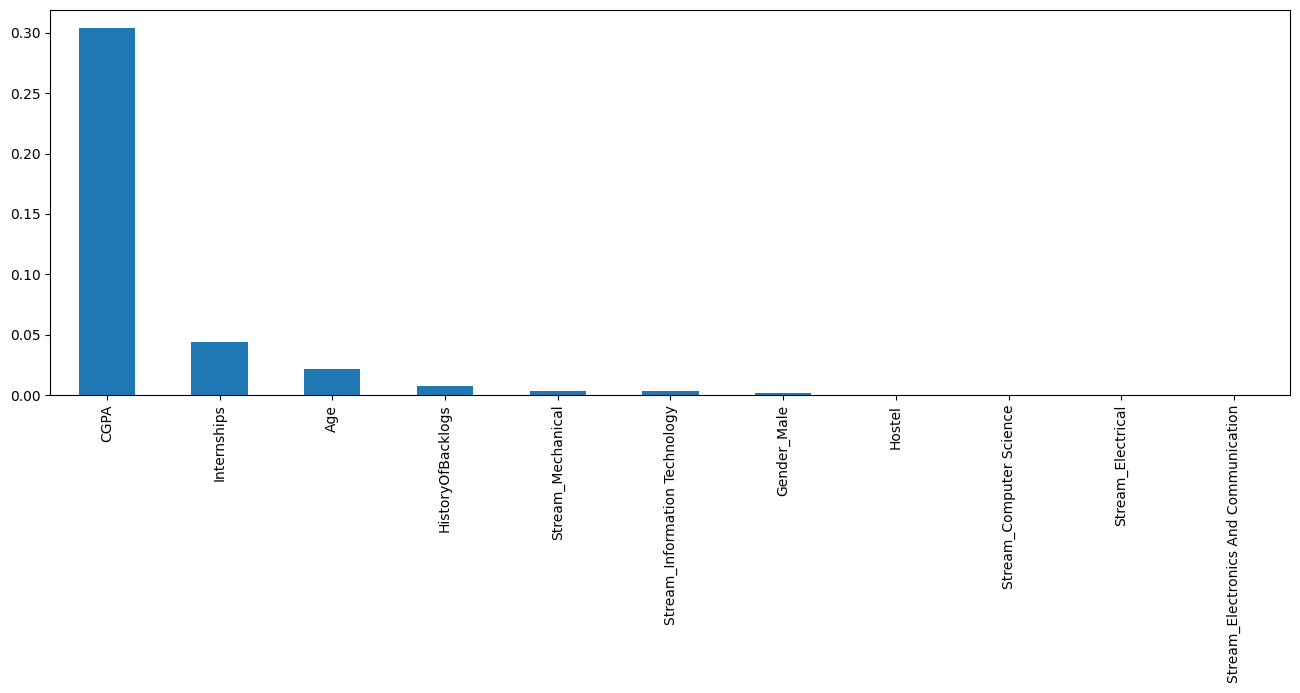

In [128]:
mi.plot.bar(figsize = (16,5))

In [129]:
mi

CGPA                                    0.303858
Internships                             0.043681
Age                                     0.021548
HistoryOfBacklogs                       0.007361
Stream_Mechanical                       0.003534
Stream_Information Technology           0.003496
Gender_Male                             0.001775
Hostel                                  0.000000
Stream_Computer Science                 0.000000
Stream_Electrical                       0.000000
Stream_Electronics And Communication    0.000000
dtype: float64

In [130]:
sel = mi[mi.values>0.001].index
sel

Index(['CGPA', 'Internships', 'Age', 'HistoryOfBacklogs', 'Stream_Mechanical',
       'Stream_Information Technology', 'Gender_Male'],
      dtype='object')

In [131]:
X_train = X_train[sel]
X_test = X_test[sel]

In [132]:
X_train.head()

CGPA  Internships       Age  HistoryOfBacklogs  Stream_Mechanical  \
0  0.957441     0.647971 -1.225083          -0.487746                0.0   
1 -1.111338     0.647971 -2.343591          -0.487746                0.0   
2 -2.176664    -1.061312  0.498093          -0.487746                0.0   
3  0.957441     0.647971  2.231714          -0.487746                0.0   
4 -1.111338    -1.061312 -0.290019          -0.487746                0.0   

   Stream_Information Technology  Gender_Male  
0                            1.0          1.0  
1                            0.0          1.0  
2                            0.0          1.0  
3                            0.0          1.0  
4                            0.0          1.0

## Feature selection based on F Score

In [133]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [134]:
sel = f_classif(X_train, y_train)
sel

(array([1.04791175e+03, 5.12914307e+01, 2.67019400e+00, 7.48616245e-01,
        4.87443227e+00, 2.49714477e+00, 2.02791245e-03]),
 array([1.97974455e-186, 1.10100266e-012, 1.02395329e-001, 3.87014756e-001,
        2.73664889e-002, 1.14205391e-001, 9.64085860e-001]))

In [135]:
p_values = pd.Series(sel[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = True, inplace = True)

<Axes: >

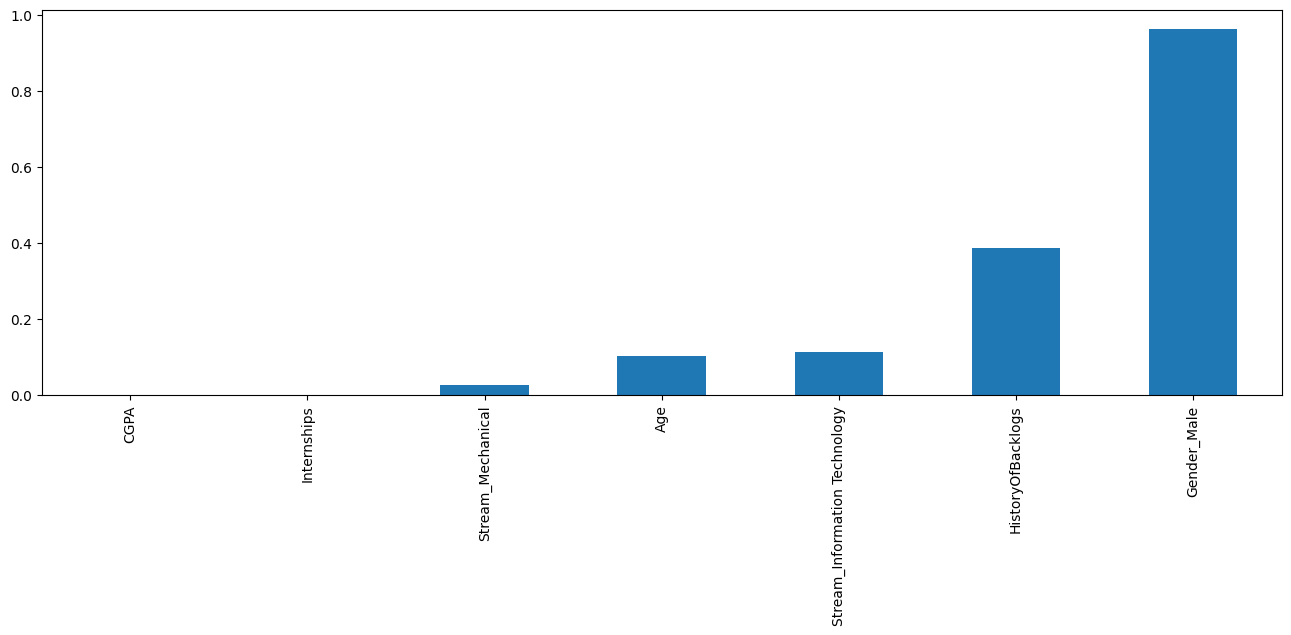

In [136]:
p_values.plot.bar(figsize = (16, 5))

In [137]:
p_values = p_values[p_values<0.05]

In [138]:
p_values.index

Index(['CGPA', 'Internships', 'Stream_Mechanical'], dtype='object')

In [139]:
X_train = X_train[p_values.index]
X_test = X_test[p_values.index]

In [140]:
X_train.head()

CGPA  Internships  Stream_Mechanical
0  0.957441     0.647971                0.0
1 -1.111338     0.647971                0.0
2 -2.176664    -1.061312                0.0
3  0.957441     0.647971                0.0
4 -1.111338    -1.061312                0.0

In [141]:
new_cols = X_train.columns
new_cols

Index(['CGPA', 'Internships', 'Stream_Mechanical'], dtype='object')

### using PCA

In [142]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=3, random_state=42)
pca.fit(X_train)

PCA(n_components=3, random_state=42)

In [146]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((2076, 3), (890, 3))

In [147]:
X_train_pca

array([[ 1.17248347, -0.01282621, -0.12566001],
       [-0.53035231,  1.16192311, -0.11298644],
       [-2.37755026,  0.36102177, -0.16760353],
       ...,
       [-0.64160814, -0.83656689, -0.1805235 ],
       [ 0.20216774, -1.4186695 , -0.18680341],
       [ 0.32870759,  0.56927639, -0.1193801 ]])

In [148]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = new_cols)
X_test = pd.DataFrame(scaler.transform(X_test),columns = new_cols)
X_train.head()

CGPA  Internships  Stream_Mechanical
0  0.965646     0.652237          -0.408592
1 -1.087207     0.652237          -0.408592
2 -2.144332    -1.061493          -0.408592
3  0.965646     0.652237          -0.408592
4 -1.087207    -1.061493          -0.408592

In [149]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Basic Perceptron

In [166]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [167]:
# Execute the Default model
model = Perceptron()
model.fit(X_train,y_train)
model.coef_ # Only for a few models

array([[ 2.7256089 , -0.09694147,  0.        ]])

In [168]:
# Accuracy on training data
model.score(X_train,y_train)

0.8073217726396917

In [169]:
y_train.value_counts()

1    1136
0     940
Name: Target, dtype: int64

In [162]:
2375/(2375+453)

0.8398161244695899

In [170]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
#y_pred_proba = model.predict_proba(X_test)

In [156]:
pd.DataFrame(y_test).value_counts()

Target
1         503
0         387
dtype: int64

In [171]:
X_test

CGPA  Internships  Stream_Mechanical
0    0.965646    -1.061493          -0.408592
1   -1.087207     1.470288          -0.408592
2   -2.144332     1.981171          -0.408592
3   -1.087207    -1.061493          -0.408592
4   -0.051567     0.652237          -0.408592
..        ...          ...                ...
885 -1.087207     1.470288          -0.408592
886 -1.087207    -1.061493          -0.408592
887 -0.051567     0.652237          -0.408592
888 -0.051567     1.470288          -0.408592
889 -0.051567    -1.061493          -0.408592

[890 rows x 3 columns]

In [ ]:
1033/(1033+179)

0.8523102310231023

In [173]:
# Print Some importance performance measures
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(cohen_kappa_score(y_test,y_pred))
#print(roc_auc_score(y_test, y_pred_proba[:,1]))
#plot_roc_curve(model,X_test,y_test)

0.8213483146067416
0.8419483101391649
0.8122786304604487
1.0
0.68389662027833
0.6529627286237696


In [ ]:
950/1033

0.9196515004840271

In [ ]:
1033*1111/1212

946.9166666666666

In [ ]:
179*101/1212

14.916666666666666

In [ ]:
(946.9166666666666+14.916666666666666)/1212

0.7935918591859186

In [ ]:
(0.7986798679867987-0.7935918591859186)/(1-0.7935918591859186)

0.02465023317788155

## Logistic Regression

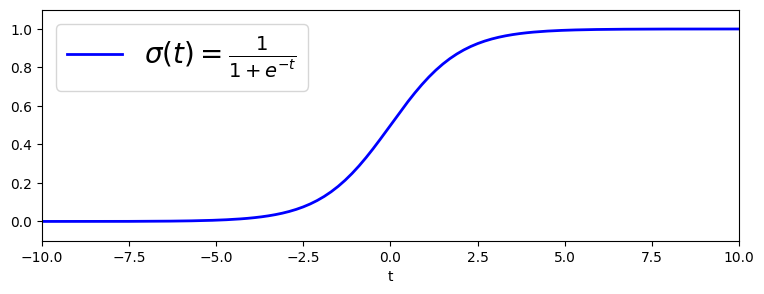

In [174]:
t = np.linspace(-100, 100, 1000)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [176]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [177]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [178]:
X_train.columns

Index(['CGPA', 'Internships', 'Stream_Mechanical'], dtype='object')

In [ ]:
# Accuracy on training data
model.score(X_train,y_train)

0.847949080622348

In [179]:
pd.DataFrame(y_train).value_counts()

Target
1         1136
0          940
dtype: int64

In [ ]:
4079/(4079+3731)

0.5222791293213829

In [180]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

In [183]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))


0.7786516853932585
0.7740816085399747
0.8051434223541049
0.8011811023622047
0.8091451292246521
0.5489810722793009
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       387
           1       0.80      0.81      0.81       503

    accuracy                           0.78       890
   macro avg       0.77      0.77      0.77       890
weighted avg       0.78      0.78      0.78       890

0.8752729103415681


In [186]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X, y, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.7481993356993357, 0.7438236790642148, 0.8630895612141231)

In [187]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([0.7037037 , 0.73737374, 0.68686869, 0.5959596 , 0.81144781,
        0.79461279, 0.72635135, 0.80743243, 0.83783784, 0.78040541]),
 array([0.70683569, 0.73874473, 0.68235375, 0.57516505, 0.80084357,
        0.8026545 , 0.71831116, 0.81439394, 0.83222469, 0.76670972]),
 array([0.80909591, 0.8281909 , 0.81308454, 0.75155877, 0.93311021,
        0.88669081, 0.86809405, 0.87918052, 0.93260347, 0.92928641]))

In [188]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'penalty':['l1','l2','elasticnet','none'],
              'C':[0.01,0.1,1,10,100],
              'fit_intercept':[True, False]}

In [189]:
# Initiate your model
model = LogisticRegression()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc')

In [190]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'C': 0.01, 'fit_intercept': False, 'penalty': 'l2'}
{'C': 0.01, 'fit_intercept': False, 'penalty': 'l2'}
{'C': 0.01, 'fit_intercept': False, 'penalty': 'none'}


In [191]:
grid_search_acc = LogisticRegression(C = 1, fit_intercept= False, penalty= 'l2')
grid_search_acc.fit(X_train,y_train)

LogisticRegression(C=1, fit_intercept=False)

In [192]:
y_pred = grid_search_acc.predict(X_test)

In [ ]:
grid_search_acc

LogisticRegression(C=1, fit_intercept=False)

In [193]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.7887640449438202
0.7860074693955132
0.8119999999999999
0.8169014084507042
0.8071570576540755
[[296  91]
 [ 97 406]]
0.5709941592439323
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       387
           1       0.82      0.81      0.81       503

    accuracy                           0.79       890
   macro avg       0.79      0.79      0.79       890
weighted avg       0.79      0.79      0.79       890

0.8752729103415681


In [ ]:
import statsmodels.api as sm

In [ ]:
y_train

3878    0
4511    0
64      0
2872    0
4489    0
4554    0
994     0
3423    1
3067    0
4979    0
4531    0
2421    0
4807    0
186     0
2652    1
4818    0
3182    0
422     0
1069    0
1288    0
634     0
402     1
2543    0
3134    0
1251    0
4407    0
4813    0
1428    0
4124    0
765     0
3661    0
124     1
4409    1
1962    0
49      0
4117    0
2742    0
141     0
1166    0
573     1
2497    0
911     0
1376    0
2570    0
518     0
3726    0
2277    0
156     0
2878    0
3307    0
3266    0
3965    0
499     0
4384    0
1366    0
3678    0
3382    0
649     0
887     0
2406    0
4760    1
513     0
4597    0
824     0
2972    0
4869    0
1379    0
4953    0
3538    0
4017    0
2186    0
4256    0
666     0
202     0
2413    0
2726    0
2886    0
3255    0
4358    0
3750    1
2045    1
1470    0
3518    1
2907    0
2837    0
900     0
4503    1
4279    1
4383    0
713     0
1869    0
55      1
1660    0
4921    0
3674    0
4252    0
4562    0
1012    0
3291    0
4811    0


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Accuracy on training data
model.score(X_train,y_train)

0.8642149929278642

In [ ]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.8391089108910891
0.5315131390374621
0.148471615720524
0.34
0.09497206703910614
0.08976768548188319
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1033
           1       0.34      0.09      0.15       179

    accuracy                           0.84      1212
   macro avg       0.60      0.53      0.53      1212
weighted avg       0.78      0.84      0.80      1212

0.6310767034238834


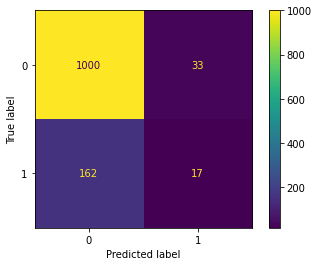

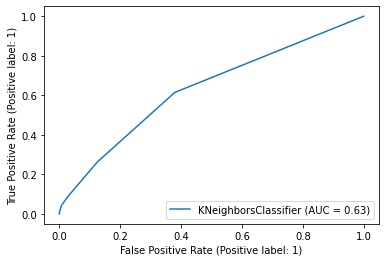

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [ ]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors':[3,5,9,15,25],
              'weights':['uniform','distance'],
              'p':[1,2,3]
              }

In [ ]:
# Initiate your model
model = KNeighborsClassifier()
# Get a list of all possible parameters

grid_search_acc = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 15, 25], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [ ]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}
{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}


In [ ]:
y_pred = grid_search_auc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8564356435643564
0.5255128253662652
0.10309278350515463
0.6666666666666666
0.055865921787709494
[[1028    5]
 [ 169   10]]
0.08212989319196717
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1033
           1       0.67      0.06      0.10       179

    accuracy                           0.86      1212
   macro avg       0.76      0.53      0.51      1212
weighted avg       0.83      0.86      0.80      1212

0.6310767034238834


In [ ]:
np.round(np.sqrt(X_train.shape[0]),0)

53.0

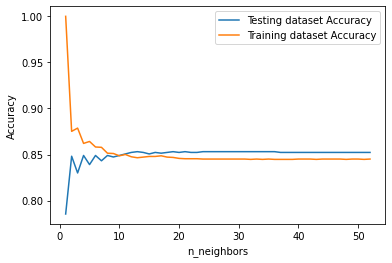

array([0.78547855, 0.84818482, 0.830033  , 0.8490099 , 0.83910891,
       0.8490099 , 0.84323432, 0.8490099 , 0.84735974, 0.8490099 ,
       0.85066007, 0.85231023, 0.85313531, 0.85231023, 0.85066007,
       0.85231023, 0.85148515, 0.85231023, 0.85313531, 0.85231023,
       0.85313531, 0.85231023, 0.85231023, 0.85313531, 0.85313531,
       0.85313531, 0.85313531, 0.85313531, 0.85313531, 0.85313531,
       0.85313531, 0.85313531, 0.85313531, 0.85313531, 0.85313531,
       0.85313531, 0.85231023, 0.85231023, 0.85231023, 0.85231023,
       0.85231023, 0.85231023, 0.85231023, 0.85231023, 0.85231023,
       0.85231023, 0.85231023, 0.85231023, 0.85231023, 0.85231023,
       0.85231023, 0.85231023])

In [ ]:
neighbors = np.arange(1, int(np.round(np.sqrt(X_train.shape[0]),0)))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

    # Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
test_accuracy

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(probability = True)
model.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
# Accuracy on training data
model.score(X_train,y_train)

0.85997171145686

In [ ]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.8514851485148515
0.5202993937492901
0.09090909090909093
0.47368421052631576
0.05027932960893855
0.06438968324084171
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1033
           1       0.47      0.05      0.09       179

    accuracy                           0.85      1212
   macro avg       0.67      0.52      0.51      1212
weighted avg       0.80      0.85      0.80      1212

0.6378233382186722


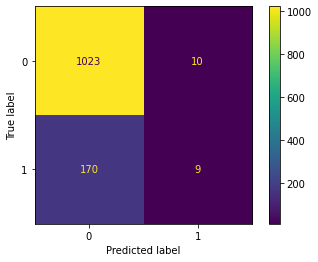

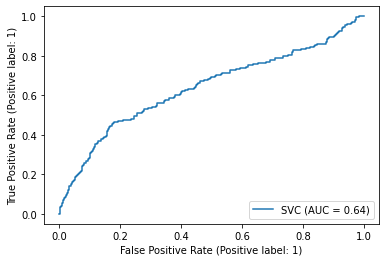

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [ ]:
# Cross Validation as a better process over train-test split
from sklearn.model_selection import cross_val_score
scores_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
scores_balanced_accuracy = cross_val_score(model, X_train, y_train, cv=10, scoring='balanced_accuracy')
scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc')
scores_accuracy.mean(),scores_balanced_accuracy.mean(), scores_auc.mean()

(0.8454765305866727, 0.5320180374479639, 0.6738231928251028)

In [ ]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([0.84805654, 0.84805654, 0.85865724, 0.84452297, 0.83745583,
        0.8409894 , 0.84805654, 0.83038869, 0.85106383, 0.84751773]),
 array([0.53123249, 0.54024276, 0.56456583, 0.52012138, 0.5159197 ,
        0.52838929, 0.54136856, 0.49578059, 0.56033755, 0.52222222]),
 array([0.65368814, 0.67002801, 0.71288515, 0.62661064, 0.63958917,
        0.65776922, 0.68767199, 0.70152266, 0.74411627, 0.64435068]))

In [ ]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C':[0.01,0.1,1,10,100],
              'kernel':['linear','rbf','sigmoid'],
              'gamma':['auto',0.01, 0.05,0.1]
              }

In [ ]:
# Initiate your model
model = SVC()
# Get a list of all possible parameters

grid_search_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'gamma': ['auto', 0.01, 0.05, 0.1],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   scoring='roc_auc')

In [ ]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
{'kernel': 'sigmoid', 'gamma': 0.05, 'C': 100}
{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1}


In [ ]:
y_pred = grid_search_acc.predict(X_test)

In [ ]:
grid_search_acc

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'gamma': ['auto', 0.01, 0.05, 0.1],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   scoring='accuracy')

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8506600660066007
0.5221246356276399
0.09950248756218905
0.45454545454545453
0.055865921787709494
[[1021   12]
 [ 169   10]]
0.06941663555842126
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1033
           1       0.45      0.06      0.10       179

    accuracy                           0.85      1212
   macro avg       0.66      0.52      0.51      1212
weighted avg       0.80      0.85      0.80      1212

0.6378233382186722


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [ ]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.7813531353135313
0.5969298079575138
0.3116883116883117
0.2912621359223301
0.33519553072625696
0.18248182614184771
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1033
           1       0.29      0.34      0.31       179

    accuracy                           0.78      1212
   macro avg       0.59      0.60      0.59      1212
weighted avg       0.79      0.78      0.79      1212

0.5969298079575137


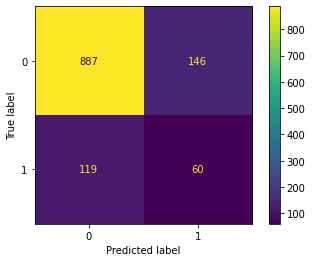

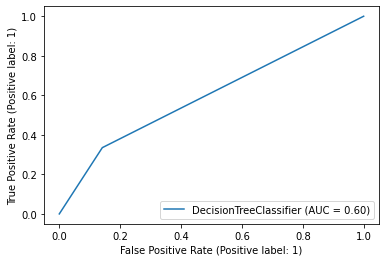

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [ ]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,3,4,5,"None"],
              'min_samples_split':[2,3,5,8],
              'min_samples_leaf':[1,3,5]}

In [ ]:
# Initiate your model
model = DecisionTreeClassifier()
# Get a list of all possible parameters

grid_search_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 'None'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 3, 5, 8]},
                   scoring='roc_auc')

In [ ]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 2, 'criterion': 'entropy'}
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'gini'}
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
y_pred = grid_search_acc.predict(X_test)

In [ ]:
grid_search_acc

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 'None'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 3, 5, 8]},
                   scoring='accuracy')

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8523102310231023
0.5
0.0
0.0
0.0
[[1033    0]
 [ 179    0]]
0.0
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1033
           1       0.00      0.00      0.00       179

    accuracy                           0.85      1212
   macro avg       0.43      0.50      0.46      1212
weighted avg       0.73      0.85      0.78      1212

0.5969298079575137


# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Accuracy on training data
model.score(X_train,y_train)

1.0

In [ ]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.8481848184818482
0.5553115890690996
0.21367521367521367
0.45454545454545453
0.13966480446927373
0.15501026834092413
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1033
           1       0.45      0.14      0.21       179

    accuracy                           0.85      1212
   macro avg       0.66      0.56      0.56      1212
weighted avg       0.81      0.85      0.81      1212

0.7192237178689829


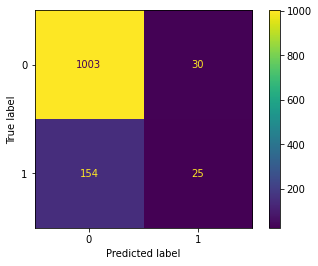

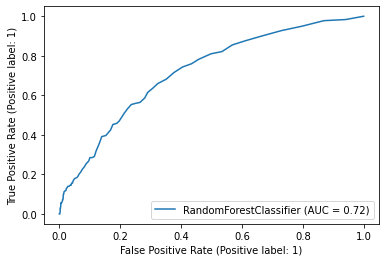

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [ ]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion':['gini','entropy'],
              'max_depth':['None',2,3,5],
              'max_features':['auto',2,3,5],
              'min_samples_split':[2,3,5],
              'n_estimators': [50,100,200]
              }

In [ ]:
# Initiate your model
model = RandomForestClassifier()
# Get a list of all possible parameters

grid_search_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': ['None', 2, 3, 5],
                                        'max_features': ['auto', 2, 3, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 200]},
                   scoring='roc_auc')

In [ ]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'max_features': 5, 'max_depth': 3, 'criterion': 'gini'}
{'n_estimators': 50, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
y_pred = grid_search_acc.predict(X_test)

In [ ]:
grid_search_acc

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': ['None', 2, 3, 5],
                                        'max_features': ['auto', 2, 3, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8506600660066007
0.5013412147728318
0.01092896174863388
0.25
0.00558659217877095
[[1030    3]
 [ 178    1]]
0.004501642736563172
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1033
           1       0.25      0.01      0.01       179

    accuracy                           0.85      1212
   macro avg       0.55      0.50      0.47      1212
weighted avg       0.76      0.85      0.79      1212

0.7192237178689829


In [ ]:
### Visualize decision Trees

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, max_features= 8, min_samples_split= 2)
model.fit(X_train,y_train)
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 1.18
|   |--- feature_3 <= -1.20
|   |   |--- feature_7 <= 1.61
|   |   |   |--- feature_11 <= -1.68
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  -1.68
|   |   |   |   |--- class: 0
|   |   |--- feature_7 >  1.61
|   |   |   |--- feature_8 <= 0.49
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.49
|   |   |   |   |--- class: 0
|   |--- feature_3 >  -1.20
|   |   |--- feature_0 <= -3.66
|   |   |   |--- feature_3 <= 0.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.12
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -3.66
|   |   |   |--- feature_2 <= -0.32
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  -0.32
|   |   |   |   |--- class: 0
|--- feature_4 >  1.18
|   |--- feature_11 <= -1.68
|   |   |--- class: 1
|   |--- feature_11 >  -1.68
|   |   |--- feature_4 <= 1.64
|   |   |   |--- feature_6 <= 0.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.10
|   |   |   |   |--- class: 0
|   |

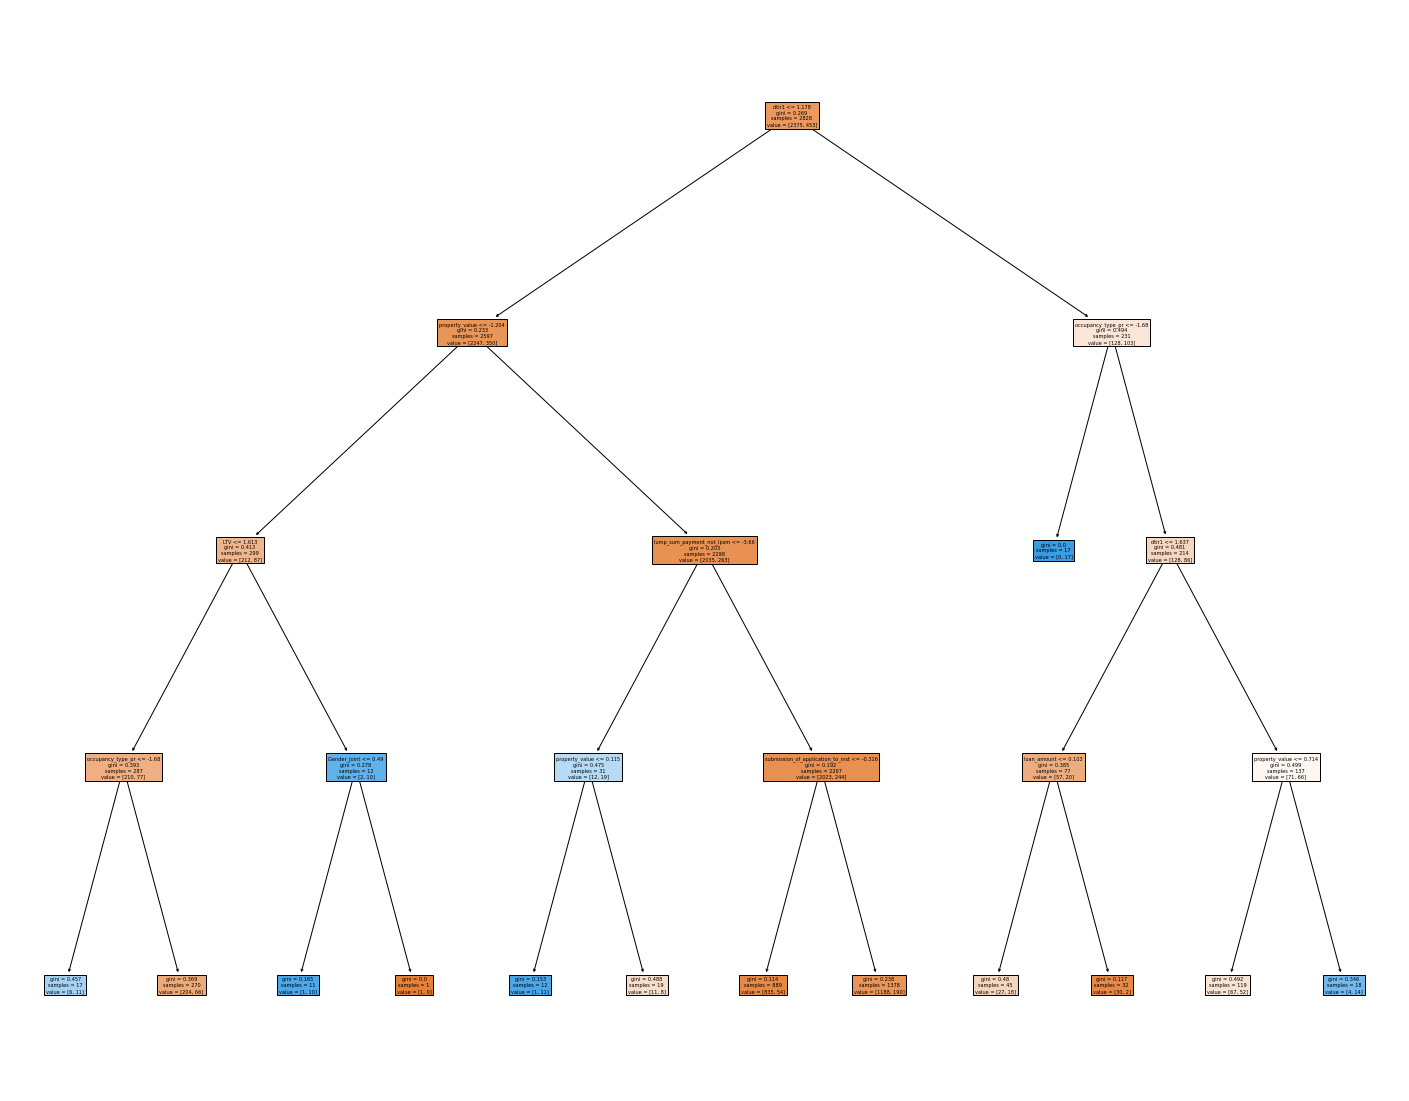

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=X_train.columns,
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

# Gradient Booosting Classification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
# Accuracy on training data
model.score(X_train,y_train)

0.8903818953323904

In [ ]:
# Predict the model on the Testing Data
y_pred = model.predict(X_test)
# Predict probabilities of belonging to each of the groups
y_pred_proba = model.predict_proba(X_test)

0.849009900990099
0.5650326921100878
0.24066390041493776
0.46774193548387094
0.16201117318435754
0.17821679461718587
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1033
           1       0.47      0.16      0.24       179

    accuracy                           0.85      1212
   macro avg       0.67      0.57      0.58      1212
weighted avg       0.81      0.85      0.82      1212

0.7309485308830925


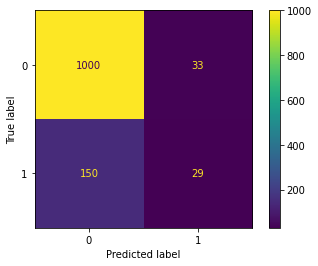

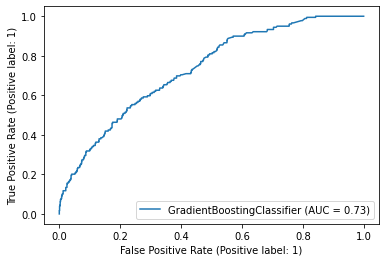

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(model,X_test,y_test)

In [ ]:
scores_accuracy,scores_balanced_accuracy,scores_auc

(array([0.84805654, 0.84805654, 0.85865724, 0.84452297, 0.83745583,
        0.8409894 , 0.84805654, 0.83038869, 0.85106383, 0.84751773]),
 array([0.53123249, 0.54024276, 0.56456583, 0.52012138, 0.5159197 ,
        0.52838929, 0.54136856, 0.49578059, 0.56033755, 0.52222222]),
 array([0.65368814, 0.67002801, 0.71288515, 0.62661064, 0.63958917,
        0.65776922, 0.68767199, 0.70152266, 0.74411627, 0.64435068]))

In [ ]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth':['None',2,3,4,5],
              'max_features':['auto',2,3,5,8],
              'min_samples_split':[2,3,5,8],
              'n_estimators': [25,50,100,200,400],
               'learning_rate': [0.01,0.05,0.1,0.2,0.5]
              }

In [ ]:
# Initiate your model
model = GradientBoostingClassifier()
# Get a list of all possible parameters

grid_search_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search_Bal_acc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'balanced_accuracy',
                           cv = 10,
                           verbose=0)
grid_search_auc = RandomizedSearchCV(estimator = model,
                           param_distributions = param_grid,
                           scoring = 'roc_auc',
                           cv = 10,
                           verbose=0)
grid_search_acc.fit(X_train, y_train)
grid_search_Bal_acc.fit(X_train, y_train)
grid_search_auc.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': ['None', 2, 3, 4, 5],
                                        'max_features': ['auto', 2, 3, 5, 8],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': [25, 50, 100, 200,
                                                         400]},
                   scoring='roc_auc')

In [ ]:
print(grid_search_acc.best_params_)
print(grid_search_Bal_acc.best_params_)
print(grid_search_auc.best_params_)

{'n_estimators': 400, 'min_samples_split': 5, 'max_features': 8, 'max_depth': 2, 'learning_rate': 0.01}
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.5}
{'n_estimators': 50, 'min_samples_split': 8, 'max_features': 3, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
y_pred = grid_search_acc.predict(X_test)

In [ ]:
grid_search_acc

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': ['None', 2, 3, 4, 5],
                                        'max_features': ['auto', 2, 3, 5, 8],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': [25, 50, 100, 200,
                                                         400]},
                   scoring='accuracy')

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test, y_pred_proba[:,1]))

0.8539603960396039
0.5217514750658439
0.09230769230769231
0.5625
0.05027932960893855
[[1026    7]
 [ 170    9]]
0.06976219797755534
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1033
           1       0.56      0.05      0.09       179

    accuracy                           0.85      1212
   macro avg       0.71      0.52      0.51      1212
weighted avg       0.81      0.85      0.80      1212

0.7309485308830925


## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(use_label_encoder=False,
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=100, # number of trees, default = 100
                      eta=0.3, # this is learning rate, default = 0.3
                      max_depth=6, # maximum depth of the tree, default = 6
                      gamma = 0, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = 1, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )


In [ ]:
clf = model.fit(X_train, y_train)

In [ ]:
# Predict class labels on training data
pred_labels_tr = model.predict(X_train)
# Predict class labels on a test data
pred_labels_te = model.predict(X_test)

In [ ]:
score_te = model.score(X_test, y_test)
score_te

0.8473597359735974

In [ ]:
score_tr = model.score(X_train, y_train)
score_tr

0.9140735502121641

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {'eta':[0,0.2,0.4,0.6,0.8,1],'gamma':[0,1,2,4,8,16],"n_estimators":[1,5,10,20,40,100],'min_child_weight':[0,1,2,4,8,16],'max_depth':range(2,10),'subsample':[0,0.2,0.4,0.6,0.8,1]}


In [ ]:
grid = RandomizedSearchCV(model,param_distributions=param_grid,scoring = 'accuracy',n_iter = 50)
grid.fit(X_train,y_train)
grid.best_params_


{'subsample': 1,
 'n_estimators': 5,
 'min_child_weight': 0,
 'max_depth': 6,
 'gamma': 4,
 'eta': 0.8}

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


[0.856, 0.19, 0.567]

## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

0.8094059405940595
0.5787476947871092
0.28037383177570097
0.31690140845070425
0.25139664804469275
0.17220947560139088
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1033
           1       0.32      0.25      0.28       179

    accuracy                           0.81      1212
   macro avg       0.60      0.58      0.59      1212
weighted avg       0.79      0.81      0.80      1212



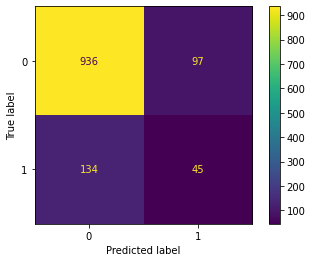

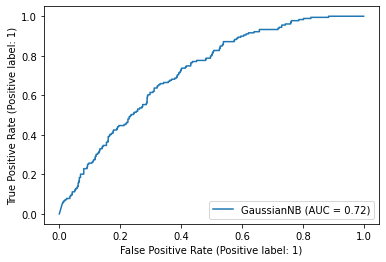

In [ ]:
print(accuracy_score(y_test,y_pred))
print(balanced_accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
plot_confusion_matrix(classifier,X_test,y_test)
print(cohen_kappa_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test, y_pred_proba[:,1]))
plot_roc_curve(classifier,X_test,y_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8094059405940595

## MultiLayer Perceptron (Artificial Neural Network)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

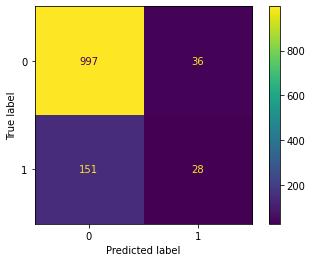

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_grid = {'activation':['identity','logistic','tanh','relu'],
             'learning_rate':['constant','invscaling','adaptive'],
              'learning_rate_init':[0.001, 0.005, 0.01],
              'shuffle':[True, False]}

In [ ]:
grid = RandomizedSearchCV(model,param_distributions=param_grid)
grid.fit(X_train,y_train)
grid.best_params_

{'shuffle': False,
 'learning_rate_init': 0.005,
 'learning_rate': 'constant',
 'activation': 'identity'}

In [ ]:
y_pred = grid.predict(X_test)
[round(accuracy_score(y_test,y_pred),3),round(cohen_kappa_score(y_test,y_pred),3),round(roc_auc_score(y_test,y_pred),3)]


[0.85, 0.047, 0.515]

# Implementing an end-end project using Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('NN'   , MLPClassifier()))

    return basedModels


In [ ]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    return names, results

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR: 0.845834 (0.009550)
LDA: 0.844066 (0.009176)
KNN: 0.832744 (0.012543)
CART: 0.770522 (0.025880)
NB: 0.815416 (0.010829)
SVM: 0.845477 (0.007363)
AB: 0.840536 (0.016875)
GBM: 0.844423 (0.011386)
RF: 0.842301 (0.012039)
NN: 0.843707 (0.010682)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'NN'  , Pipeline([('Scaler', scaler),('NN'  , MLPClassifier())])  ))


    return pipelines

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)


minmaxLR: 0.844772 (0.007547)
minmaxLDA: 0.844066 (0.009176)
minmaxKNN: 0.829915 (0.013736)
minmaxCART: 0.768393 (0.022525)
minmaxNB: 0.815416 (0.010829)
minmaxSVM: 0.844416 (0.007674)
minmaxAB: 0.840536 (0.016875)
minmaxGBM: 0.844423 (0.011386)
minmaxRF: 0.843715 (0.011800)
minmaxNN: 0.845835 (0.013993)
